# CSMODEL MACHINE PROJECT
# GOT DATASET

# <span style="color:green"> Phase 1: data description, target research question, preprocessing, and exploratory data analysis <span>

## Data Description

This dataset documents the on-screen and notable off-screen character deaths in the TV series Game of Thrones. Each row represents a unique death, providing information on the season, episode, character killed, killer, method of death, location, allegiance, and importance.

**order** -	Unique identifier that shows the sequence of death events.

**season** - The season in which the character died.

**episode**	- The episode number (within the season) where the death occurred.

**character_killed** - The name of the character who died.

**killer** - The person or entity responsible for the death. May be missing in cases where the killer is unknown or off-screen.

**method** - The specific method of death.

**method_cat** - A broader category for the method.

**reason** - Context or motive behind the death.

**location** - The specific location where the death occurred.

**allegiance** - The house, faction, or group the deceased character was affiliated with.

**importance** - A numerical scale (1–4) that reflects a character's significance to the plot:
1 = Background Extra, 2 = Minor Character, 3 = Secondary Major, 4 = Major Character.


## Data Collection & Methodology
This dataset was manually curated based on episode analysis and visual confirmation. A death was counted only if:

- It happened on-screen, or

- It occurred off-screen but was confirmed or strongly implied.

Important notes on methodology:

- Death credit is given to the direct killer unless unknown; then, the order-giver or scene context is used.

- Death types (e.g., magic vs. fire) are classified based on origin, not appearance.

- Wight deaths and multiple deaths (e.g., Jon Snow’s resurrection) are treated with special rules.

- In scenes with mass deaths, educated visual estimates are used (e.g., dragonfire radius).

- Characters like Unsullied or Wildlings are sometimes grouped under broader labels when individual identity is unclear.


## Biases and Limitations
- Visual estimation bias: Some death counts are not exact due to fire, smoke, or unclear crowd scenes.

- Attribution ambiguity: Killers may be marked "Unknown" or may be misattributed due to visual obscurity.

- Sampling bias: Only plot-relevant or confirmed deaths are included. Background or off-screen deaths without confirmation may be excluded.

- Allegiance coverage: The allegiance column has many missing values (~45%), limiting factional analysis unless imputed or generalized.

- Subjectivity in importance: Rankings of character importance are based on the curators’ interpretation of narrative relevance.


## Source & Credits
This dataset was compiled and visualized by Shelly Tan


# PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv("game-of-thrones-deaths-data.csv")

In [3]:
display(df)

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
0,1,1,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,"House Royce, Night’s Watch",2.0
1,2,1,1,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,2.0
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,NaN,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6882,6883,8,5,Nora’s daughter,Drogon,Dragonfire,Animal,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,Smallfolk,2.0
6883,6884,8,5,Jaime Lannister,Drogon,Rubble,Crushing,"Died together with Cersei, crushed under the c...",King’s Landing,House Lannister,4.0
6884,6885,8,5,Cersei Lannister,Drogon,Rubble,Crushing,"Died together with Jaime, crushed under the cr...",King’s Landing,House Lannister,4.0
6885,6886,8,6,Lannister soldier,Grey Worm,Knife,Blade,Executed on Daenerys Targaryen’s command to “k...,King’s Landing,House Lannister,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6887 entries, 0 to 6886
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order             6887 non-null   int64  
 1   season            6887 non-null   int64  
 2   episode           6887 non-null   int64  
 3   character_killed  6887 non-null   object 
 4   killer            6410 non-null   object 
 5   method            6887 non-null   object 
 6   method_cat        6887 non-null   object 
 7   reason            6886 non-null   object 
 8   location          6887 non-null   object 
 9   allegiance        3136 non-null   object 
 10  importance        6886 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 592.0+ KB


In [5]:
df.columns

Index(['order', 'season', 'episode', 'character_killed', 'killer', 'method',
       'method_cat', 'reason', 'location', 'allegiance', 'importance'],
      dtype='object')

In [6]:
df.head(10)

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
0,1,1,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,"House Royce, Night’s Watch",2.0
1,2,1,1,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,2.0
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,NaN,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,NaN,1.0
5,6,1,1,Jon Arryn,Lysa Arryn,Poison,Poison,Petyr Baelish persuaded Lysa to do so for reas...,King’s Landing,House Arryn,2.0
6,7,1,1,Dothraki man,Dothraki man,Arakh,Blade,A Dothraki wedding without at least three deat...,Pentos,Dothraki,1.0
7,8,1,2,Catspaw assassin,Summer,Direwolf teeth,Animal,Attempting to kill Bran Stark,Winterfell,NaN,1.0
8,9,1,2,Mycah,Sandor “the Hound” Clegane,Unknown (likely a sword),Unknown,Joffrey has him killed after Arya attacks Joffrey,Kingsroad,Smallfolk,3.0
9,10,1,2,Lady,Ned Stark,Knife,Blade,Robert Baratheon orders that Lady be killed to...,Kingsroad,House Stark,3.0


In [7]:
df.tail(10)

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
6877,6878,8,5,Peasant,Drogon,Dragonfire,Animal,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,Smallfolk,1.0
6878,6879,8,5,Peasant,Drogon,Dragonfire,Animal,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,Smallfolk,1.0
6879,6880,8,5,Peasant,Drogon,Dragonfire,Animal,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,Smallfolk,1.0
6880,6881,8,5,Peasant,Drogon,Dragonfire,Animal,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,Smallfolk,1.0
6881,6882,8,5,Nora,Drogon,Dragonfire,Animal,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,Smallfolk,2.0
6882,6883,8,5,Nora’s daughter,Drogon,Dragonfire,Animal,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,Smallfolk,2.0
6883,6884,8,5,Jaime Lannister,Drogon,Rubble,Crushing,"Died together with Cersei, crushed under the c...",King’s Landing,House Lannister,4.0
6884,6885,8,5,Cersei Lannister,Drogon,Rubble,Crushing,"Died together with Jaime, crushed under the cr...",King’s Landing,House Lannister,4.0
6885,6886,8,6,Lannister soldier,Grey Worm,Knife,Blade,Executed on Daenerys Targaryen’s command to “k...,King’s Landing,House Lannister,1.0
6886,6887,8,6,Daenerys Targaryen,Jon Snow,Knife,Blade,Stabbed in the stomach by Jon Snow after she “...,King’s Landing,House Targaryen,4.0


We need to check if there is any duplicated rows in the dataset

In [8]:
df.duplicated().sum()


np.int64(0)

Check all the NaN values in the dataset 

In [9]:
df.replace("", np.nan, inplace=True)
df.replace(" ", np.nan, inplace=True)

print(df.isnull().sum())

order                  0
season                 0
episode                0
character_killed       0
killer               477
method                 0
method_cat             0
reason                 1
location               0
allegiance          3751
importance             1
dtype: int64


### Observe Allegiance Column

In [10]:
print(df['allegiance'].unique())

['House Royce, Night’s Watch' 'Night’s Watch' nan 'House Arryn' 'Dothraki'
 'Smallfolk' 'House Stark' 'House Clegane' 'House Lannister' 'Free Folk'
 'House Egen, House Arryn' 'House Targaryen'
 'House Baratheon of King’s Landing' 'Dothraki, House Targaryen'
 'House Baratheon of Dragonstone' 'House Baratheon of Storm’s End'
 'House Cassel, House Stark' 'Faith of the Seven' 'House Greyjoy'
 'House Karstark, House Stark' 'The Thirteen'
 'House Seaworth, House Baratheon of Dragonstone'
 'House Moore, Kingsguard' 'Warlocks of Qarth, The Thirteen'
 'House Targaryen, The Thirteen' 'House Tully' 'House Bolton'
 'Night’s Watch, House Mormont' 'Good Masters'
 'Brotherhood Without Banners, The Lord of Light' 'Varys, House Baelish'
 'Second Sons' 'Wise Masters' 'House Frey' 'House Stark, House Tully'
 'House Florent, House Baratheon of Dragonstone'
 'House Baratheon of King’s Landing, House Lannister' 'House Hollard'
 'Great Masters' 'House Arryn, House Baelish'
 'House Kenning, House Greyjoy' 'Ho

In [11]:
missing_allegiance = df[df['allegiance'].isna()]
display(missing_allegiance)

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,NaN,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,NaN,1.0
7,8,1,2,Catspaw assassin,Summer,Direwolf teeth,Animal,Attempting to kill Bran Stark,Winterfell,NaN,1.0
13,14,1,5,Tribesman,Bronn,Sword,Blade,Attacked Catelyn Stark’s group that was taking...,Eastern Road,NaN,1.0
14,15,1,5,Tribesman,Bronn,Sword,Blade,Attacked Catelyn Stark’s group that was taking...,Eastern Road,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5856,5857,8,3,Wight,Arya Stark,Magic,Magic,Killed during the Battle of Winterfell when th...,Winterfell,NaN,1.0
5857,5858,8,3,Wight,Arya Stark,Magic,Magic,Killed during the Battle of Winterfell when th...,Winterfell,NaN,1.0
5858,5859,8,3,Wight,Arya Stark,Magic,Magic,Killed during the Battle of Winterfell when th...,Winterfell,NaN,1.0
5859,5860,8,3,Wight,Arya Stark,Magic,Magic,Killed during the Battle of Winterfell when th...,Winterfell,NaN,1.0


Check the unique values of allegiance

Update the NaN values into Unkown since the characters who died dont have any allegiance to any group, region, or family

In [12]:
df['allegiance'] = df['allegiance'].fillna('Unknown')

We separate the strings with two allegiance

In [13]:
# Convert to string
df['allegiance'] = df['allegiance'].astype(str)

df['allegiance'] = df['allegiance'].str.replace(';', ',', regex=False).str.replace(' & ', ',', regex=False)

# split 
split_cols = df['allegiance'].str.split(',', n=1, expand=True)


split_cols[0] = split_cols[0].str.strip()
split_cols[1] = split_cols[1].str.strip()

split_cols[1] = split_cols[1].fillna('No Second Allegiance')

# Assign cols
df['allegiance'] = split_cols[0]
df['allegiance_2'] = split_cols[1]


In [14]:
print(df['allegiance_2'].unique())

['Night’s Watch' 'No Second Allegiance' 'House Arryn' 'House Targaryen'
 'House Stark' 'House Baratheon of Dragonstone' 'Kingsguard'
 'The Thirteen' 'House Mormont' 'The Lord of Light' 'House Baelish'
 'House Tully' 'House Lannister' 'House Greyjoy' 'Free Folk'
 'Great Masters' 'House Baratheon of King’s Landing' 'House Florent'
 'House Hightower' 'House Dayne' 'House Thorne' 'House Bolton'
 'Night‘s Watch' 'House Stark, House Arryn' 'Brotherhood Without Banners']


In [15]:
print(df['allegiance'].unique())

['House Royce' 'Night’s Watch' 'Unknown' 'House Arryn' 'Dothraki'
 'Smallfolk' 'House Stark' 'House Clegane' 'House Lannister' 'Free Folk'
 'House Egen' 'House Targaryen' 'House Baratheon of King’s Landing'
 'House Baratheon of Dragonstone' 'House Baratheon of Storm’s End'
 'House Cassel' 'Faith of the Seven' 'House Greyjoy' 'House Karstark'
 'The Thirteen' 'House Seaworth' 'House Moore' 'Warlocks of Qarth'
 'House Tully' 'House Bolton' 'Good Masters' 'Brotherhood Without Banners'
 'Varys' 'Second Sons' 'Wise Masters' 'House Frey' 'House Florent'
 'House Hollard' 'Great Masters' 'House Kenning' 'House Martell' 'Thenn'
 'House Reed' 'Sons of the Harpy' 'Faceless Men' 'Children of the Forest'
 'Faith Militant' 'Triarchs of Volantis' 'House Umber' 'House Tyrell'
 'House Greyjoy (Yara-aligned)' 'House Greyjoy (Euron-aligned)'
 'House Tarly' 'House Baelish' 'House Mormont' 'The Lord of Light'
 'Golden Company']


Change the order of the columns 

In [16]:
#Get column order
cols = df.columns.tolist()


cols.remove('allegiance')
cols.remove('allegiance_2')


insert_at = cols.index('location') + 1

# insert together 
cols[insert_at:insert_at] = ['allegiance', 'allegiance_2']

# Reassign the DataFrame
df = df[cols]

In [17]:
df.head()

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,allegiance_2,importance
0,1,1,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,House Royce,Night’s Watch,2.0
1,2,1,1,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,No Second Allegiance,2.0
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,No Second Allegiance,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,Unknown,No Second Allegiance,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,Unknown,No Second Allegiance,1.0


### Observe killer Column

In [18]:
print(df['killer'].unique())

['White Walker' 'Ned Stark' 'Direwolf' 'Stag' 'Lysa Arryn' 'Dothraki man'
 'Summer' 'Sandor “the Hound” Clegane' 'Gregor “the Mountain” Clegane'
 'Tribesman' 'Bronn' 'Tyrion Lannister' 'Rodrik Cassel'
 'Lannister soldier' 'Jory Cassel' 'Jaime Lannister' 'Robb Stark'
 'Theon Greyjoy' 'Khal Drogo' 'Boar' 'City watch guard' 'Meryn Trant'
 'Arya Stark' 'Jon Snow' 'Night’s Watch brother' 'Mirri Maz Duur'
 'Jorah Mormont' 'Hill tribesman' 'Ilyn Payne' 'Daenerys Targaryen' nan
 'Melisandre “the Red Woman” of Asshai' 'Janos Slynt'
 'Unknown (possible rival Dothraki men)' 'Yoren' 'Amory Lorch' 'Polliver'
 'Grey Wind' 'The Tickler' 'Brienne of Tarth' 'Jaqen H’ghar'
 'Qhorin Halfhand' 'Peasants' 'Osha' 'Unknown' 'Pyat Pree' 'Accident'
 'Baratheon of King’s Landing soldier' 'Baratheon of Dragonstone soldier'
 'Stannis Baratheon' 'Podrick Payne' 'Loras Tyrell' 'Jeor Mormont'
 'Barristan Selmy' 'Ramsay Bolton' 'Karl Tanner' 'Rast' 'Unsullied'
 'Drogon' 'Karstark soldier' 'Rickard Karstark' 'Joffrey 

In [19]:
missing_killer = df[df['killer'].isna()]
display(missing_killer)

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,allegiance_2,importance
60,61,2,1,The Silver,NaN,Starvation,Other,No food or water in the Red Waste,Red Waste,Dothraki,House Targaryen,2.0
191,192,3,2,Hoster Tully,NaN,Illness,Other,NaN,Riverrun,House Tully,No Second Allegiance,2.0
196,197,3,4,Bannen,NaN,Broken foot,Other,Critically wounded at the Battle of the Fist o...,Beyond the Wall,Night’s Watch,No Second Allegiance,1.0
211,212,3,6,Wildling,NaN,Falling,Falling,Fell while climbing the Wall,The Wall,Free Folk,No Second Allegiance,1.0
212,213,3,6,Wildling,NaN,Falling,Falling,Fell while climbing the Wall,The Wall,Free Folk,No Second Allegiance,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4490,4491,8,3,Wight,NaN,Dragonglass barricade,Other,Killed during the Battle of Winterfell,Winterfell,Unknown,No Second Allegiance,1.0
4491,4492,8,3,Wight,NaN,Dragonglass barricade,Other,Killed during the Battle of Winterfell,Winterfell,Unknown,No Second Allegiance,1.0
4492,4493,8,3,Wight,NaN,Dragonglass barricade,Other,Killed during the Battle of Winterfell,Winterfell,Unknown,No Second Allegiance,1.0
4493,4494,8,3,Wight,NaN,Dragonglass barricade,Other,Killed during the Battle of Winterfell,Winterfell,Unknown,No Second Allegiance,1.0


Update the NaN values into Unkown since the killers are not seen on screen, stated off screen, or caused by someone

In [20]:
df['killer'] = df['killer'].fillna('Unknown')
df[df['killer'] == 'Unknown']

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,allegiance_2,importance
60,61,2,1,The Silver,Unknown,Starvation,Other,No food or water in the Red Waste,Red Waste,Dothraki,House Targaryen,2.0
93,94,2,6,Irri,Unknown,Unknown,Unknown,Killed in a plot by Xaro Xhoan Daxos and Pyat ...,Qarth,Dothraki,House Targaryen,3.0
191,192,3,2,Hoster Tully,Unknown,Illness,Other,NaN,Riverrun,House Tully,No Second Allegiance,2.0
196,197,3,4,Bannen,Unknown,Broken foot,Other,Critically wounded at the Battle of the Fist o...,Beyond the Wall,Night’s Watch,No Second Allegiance,1.0
211,212,3,6,Wildling,Unknown,Falling,Falling,Fell while climbing the Wall,The Wall,Free Folk,No Second Allegiance,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4490,4491,8,3,Wight,Unknown,Dragonglass barricade,Other,Killed during the Battle of Winterfell,Winterfell,Unknown,No Second Allegiance,1.0
4491,4492,8,3,Wight,Unknown,Dragonglass barricade,Other,Killed during the Battle of Winterfell,Winterfell,Unknown,No Second Allegiance,1.0
4492,4493,8,3,Wight,Unknown,Dragonglass barricade,Other,Killed during the Battle of Winterfell,Winterfell,Unknown,No Second Allegiance,1.0
4493,4494,8,3,Wight,Unknown,Dragonglass barricade,Other,Killed during the Battle of Winterfell,Winterfell,Unknown,No Second Allegiance,1.0


Change the name typo and shorten the "Unknown (possible rival Dothraki men)"

In [21]:
df['killer'] = df['killer'].replace('Unknown (possible rival Dothraki men)', 'Unknown Dothraki')
df['killer'] = df['killer'].replace('Theon Grejoy', 'Theon Greyjoy')

In [22]:
df['killer'].unique()

array(['White Walker', 'Ned Stark', 'Direwolf', 'Stag', 'Lysa Arryn',
       'Dothraki man', 'Summer', 'Sandor “the Hound” Clegane',
       'Gregor “the Mountain” Clegane', 'Tribesman', 'Bronn',
       'Tyrion Lannister', 'Rodrik Cassel', 'Lannister soldier',
       'Jory Cassel', 'Jaime Lannister', 'Robb Stark', 'Theon Greyjoy',
       'Khal Drogo', 'Boar', 'City watch guard', 'Meryn Trant',
       'Arya Stark', 'Jon Snow', 'Night’s Watch brother',
       'Mirri Maz Duur', 'Jorah Mormont', 'Hill tribesman', 'Ilyn Payne',
       'Daenerys Targaryen', 'Unknown',
       'Melisandre “the Red Woman” of Asshai', 'Janos Slynt',
       'Unknown Dothraki', 'Yoren', 'Amory Lorch', 'Polliver',
       'Grey Wind', 'The Tickler', 'Brienne of Tarth', 'Jaqen H’ghar',
       'Qhorin Halfhand', 'Peasants', 'Osha', 'Pyat Pree', 'Accident',
       'Baratheon of King’s Landing soldier',
       'Baratheon of Dragonstone soldier', 'Stannis Baratheon',
       'Podrick Payne', 'Loras Tyrell', 'Jeor Mormont',

### Observe reason Column

In [23]:
missing_reason = df[df['reason'].isna()]
display(missing_reason)

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,allegiance_2,importance
191,192,3,2,Hoster Tully,Unknown,Illness,Other,NaN,Riverrun,House Tully,No Second Allegiance,2.0


In [24]:
df[df['method'] == 'Illness']

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,allegiance_2,importance
191,192,3,2,Hoster Tully,Unknown,Illness,Other,NaN,Riverrun,House Tully,No Second Allegiance,2.0


Update the NaN values into Natural Causes since it was an illness that killed the character

In [25]:
df['reason'] = df['reason'].fillna('Natural causes')
df[df['reason'] == 'Natural causes']

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,allegiance_2,importance
191,192,3,2,Hoster Tully,Unknown,Illness,Other,Natural causes,Riverrun,House Tully,No Second Allegiance,2.0


### Observe importance Column

In [26]:
print(df['importance'].unique())

[ 2.  1.  3.  4. nan]


In [27]:
missing_importance= df[df['importance'].isna()]
display(missing_importance)

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,allegiance_2,importance
4477,4478,8,3,Wight,Brienne of Tarth,Sword (Oathkeeper),Blade,Killed during the Battle of Winterfell,Winterfell,Unknown,No Second Allegiance,NaN


Observe how wights are categorized in the dataset

In [28]:
wights = df[df['character_killed'].str.contains('Wight', case=False, na=False)]
display(wights)

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,allegiance_2,importance
189,190,3,1,Wight,Jeor Mormont,Fire,Fire/Burning,Attacked Sam Tarly,Beyond the Wall,Unknown,No Second Allegiance,1.0
442,443,4,10,Wight,Summer,Direwolf teeth,Animal,Attacked Bran Stark and his group near the hea...,Beyond the Wall,Unknown,No Second Allegiance,1.0
443,444,4,10,Wight,Hodor/Bran Stark,Hands,Hands,Attacked Bran and his group near the heart tree,Beyond the Wall,Unknown,No Second Allegiance,1.0
444,445,4,10,Wight,Hodor/Bran Stark,Hands,Hands,Attacked Bran and his group near the heart tree,Beyond the Wall,Unknown,No Second Allegiance,1.0
445,446,4,10,Wight,Hodor/Bran Stark,Hammer,Bludgeon,Attacked Bran and his group near the heart tree,Beyond the Wall,Unknown,No Second Allegiance,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5855,5856,8,3,Wight,Arya Stark,Magic,Magic,Killed during the Battle of Winterfell when th...,Winterfell,Unknown,No Second Allegiance,1.0
5856,5857,8,3,Wight,Arya Stark,Magic,Magic,Killed during the Battle of Winterfell when th...,Winterfell,Unknown,No Second Allegiance,1.0
5857,5858,8,3,Wight,Arya Stark,Magic,Magic,Killed during the Battle of Winterfell when th...,Winterfell,Unknown,No Second Allegiance,1.0
5858,5859,8,3,Wight,Arya Stark,Magic,Magic,Killed during the Battle of Winterfell when th...,Winterfell,Unknown,No Second Allegiance,1.0


Update the NaN value into 1.0 since the wights are categorized as 1.0

In [29]:
df['importance'] = df['importance'].fillna(1.0)
df[df['order'] == 4478]

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,allegiance_2,importance
4477,4478,8,3,Wight,Brienne of Tarth,Sword (Oathkeeper),Blade,Killed during the Battle of Winterfell,Winterfell,Unknown,No Second Allegiance,1.0


## Check other columns 

Check the unique values of Order, season, episode 

In [30]:
print(df['order'].unique())
print(df['season'].unique())
print(df['episode'].unique())

[   1    2    3 ... 6885 6886 6887]
[1 2 3 4 5 6 7 8]
[ 1  2  4  5  6  7  8  9 10  3]


Check the unique valies of Character_killed and importance

In [31]:
print(df['importance'].unique())

print(df['character_killed'].unique())

[2. 1. 3. 4.]
['Waymar Royce' 'Gared' 'Will' 'Stag' 'Direwolf' 'Jon Arryn'
 'Dothraki man' 'Catspaw assassin' 'Mycah' 'Lady' 'Ser Hugh of the Vale'
 'Clegane’s horse' 'Stark soldier' 'Tribesman' 'Lannister soldier'
 'Jory Cassel' 'Wallen' 'Wildling' 'Stiv' 'Vardis Egen'
 'Viserys Targaryen' 'Robert Baratheon' 'Vayon Poole' 'Stark staff member'
 'Septa Mordane' 'Syrio Forel' 'Stableboy' 'Othor' 'Jafer Flowers' 'Mago'
 'Raven' 'Drogo’s horse' 'Qotho' 'Pigeon' 'Ned Stark' 'Rhaego'
 'Khal Drogo' 'Mirri Maz Duur' 'Knight' 'The Silver' 'Maester Cressen'
 'Barra (Baratheon illegitimate daughter)'
 'Robert Baratheon’s illegitimate son' 'Rakharo' 'Yoren'
 'Night’s Watch recruit' 'Lommy Greenhands' 'Rennick' 'Prisoner'
 'Renly Baratheon' 'Baratheon of Storm’s End guard' 'The Tickler'
 'Rodrik Cassel' 'High Septon' 'Peasant' 'Amory Lorch' 'Drennan' 'Irri'
 'Alton Lannister' 'Torrhen Karstark' 'The Spice King' 'The Silk King'
 'The Copper King' 'Member of the Thirteen' 'Billy' 'Jack'
 'Matthos Sea

Check the unique values of method and method_cat

In [32]:
print("method: ")
print(df['method'].unique())
print("method_cat: ")
print(df['method_cat'].unique())

method: 
['Ice sword' 'Sword (Ice)' 'Direwolf teeth' 'Antler' 'Poison' 'Arakh'
 'Unknown (likely a sword)' 'Knife' 'Spear' 'Sword' 'Bolo' 'Mace' 'Shield'
 'Arrow' 'Molten gold' 'Tusk' 'Sword (Needle)' 'Fire' 'Hands' 'Hammer'
 'Magic' 'Pillow' 'Starvation' 'Poison (magic?)' 'Water (drowning)'
 'Unknown' 'Rat' 'Shadow Demon' 'Poison dart' 'Wildfire' 'Blunt object'
 'Flaming arrow' 'Boulder' 'Axe' 'Bludgeon' 'Dragonfire'
 'Sword (Longclaw)' 'Sealed into vault' 'Illness' 'Broken foot' 'Falling'
 'Dragonglass' 'Hanging' 'Dogs' 'Moon Door' 'Giant arrow' 'Nail' 'Pot'
 'Butcher’s knife' 'Barrel' 'Burning oil' 'Mammoth foot' 'Scythe'
 'Magic fireball' 'Magic barrier' 'Hands/Necklace' 'Sword (Oathkeeper)'
 'Poisoned water' 'Old Age' 'Flaying' 'Rock' 'Shucking' 'Club' 'Foot'
 'Giant’s foot' 'Flaming log' 'Giant plank' 'Dragon feet' 'Dragon teeth'
 'Lipstick poison' 'Dragonglass spear' 'Ice scimitar' 'Knives'
 'Horse’s hooves' 'Flame flail' 'Tree' 'Flaming trebuchet projectile'
 'Bell' 'Poisoned w

In [33]:
df[df['method'].isin(['Ice sword', 'Sword (Ice)'])]

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,allegiance_2,importance
0,1,1,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,House Royce,Night’s Watch,2.0
1,2,1,1,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,No Second Allegiance,2.0
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,No Second Allegiance,2.0
55,56,1,9,Ned Stark,Ilyn Payne,Sword (Ice),Blade,Executed on Joffrey Baratheon’s orders after N...,King’s Landing,House Stark,No Second Allegiance,4.0
773,774,6,5,Child of the Forest,White Walker,Ice sword,Blade,Killed during the Night King’s attack to captu...,Beyond the Wall,Children of the Forest,No Second Allegiance,1.0


Check the unique values of location

In [34]:
print(df['location'].unique())

['Beyond the Wall' 'Winterfell' 'King’s Landing' 'Pentos' 'Kingsroad'
 'Eastern Road' 'The Eyrie' 'Vaes Dothrak' 'Castle Black' 'Lhazar'
 'The Twins' 'Red Waste' 'Unknown' 'Dragonstone' 'Riverlands' 'Oxcross'
 'Harrenhal' 'Storm’s End' 'Qarth' 'Robb Stark’s camp' 'Astapor'
 'Riverrun' 'Dreadfort' 'The Wall' 'Yunkai' 'The Gift' 'Meereen'
 'Mole’s Town' 'Moat Cailin' 'The Vale' 'Braavos' 'Dorne' 'Old Valyria'
 'Hardhome' 'The North' 'Iron Islands' 'Tower of Joy' 'Narrow Sea'
 'Casterly Rock' 'Highgarden' 'Goldroad' 'Last Hearth']


Check the unique values of reason

In [35]:
print(df['reason'].unique())

['Unknown' 'Deserting the Night’s Watch'
 'Petyr Baelish persuaded Lysa to do so for reasons unknown'
 'A Dothraki wedding without at least three deaths is a dull affair'
 'Attempting to kill Bran Stark'
 'Joffrey has him killed after Arya attacks Joffrey'
 'Robert Baratheon orders that Lady be killed to appease Cersei, who wants revenge after Nymeria attacked Joffrey'
 'Killed during a tournament'
 'Gregor was angry at being unhorsed in the tournament by Loras Tyrell'
 'Attacked while helping Catelyn Stark take Tyrion Lannister to the Vale'
 'Attacked Catelyn Stark’s group that was taking Tyrion Lannister to the Vale'
 'Attacked Catelyn Stark'
 'Jamie Lannister attacked because Catelyn Stark had taken Tyrion Lannister prisoner'
 'Attacked Ned Stark on Jamie Lannister’s command'
 'Attacked Jaime in defense of Ned Stark' 'Attacked Bran Stark'
 'Defeated in a trial by combat to determine Tyrion Lannister’s fate'
 'Threatened Daenerys Targaryen and her unborn child, drew his sword in the 

Remove Whitespaces

In [36]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

Check if there are still NaN values left

In [37]:
print(df.isnull().sum())

order               0
season              0
episode             0
character_killed    0
killer              0
method              0
method_cat          0
reason              0
location            0
allegiance          0
allegiance_2        0
importance          0
dtype: int64


In [38]:
df.head(10)

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,allegiance_2,importance
0,1,1,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,House Royce,Night’s Watch,2.0
1,2,1,1,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,No Second Allegiance,2.0
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,No Second Allegiance,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,Unknown,No Second Allegiance,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,Unknown,No Second Allegiance,1.0
5,6,1,1,Jon Arryn,Lysa Arryn,Poison,Poison,Petyr Baelish persuaded Lysa to do so for reas...,King’s Landing,House Arryn,No Second Allegiance,2.0
6,7,1,1,Dothraki man,Dothraki man,Arakh,Blade,A Dothraki wedding without at least three deat...,Pentos,Dothraki,No Second Allegiance,1.0
7,8,1,2,Catspaw assassin,Summer,Direwolf teeth,Animal,Attempting to kill Bran Stark,Winterfell,Unknown,No Second Allegiance,1.0
8,9,1,2,Mycah,Sandor “the Hound” Clegane,Unknown (likely a sword),Unknown,Joffrey has him killed after Arya attacks Joffrey,Kingsroad,Smallfolk,No Second Allegiance,3.0
9,10,1,2,Lady,Ned Stark,Knife,Blade,Robert Baratheon orders that Lady be killed to...,Kingsroad,House Stark,No Second Allegiance,3.0


# Reseach Question
### **What patterns can be observed in character deaths in Game of Thrones, and how do factors such as allegiance, killer, method, and importance influence these deaths across seasons?**

# EDA

In [39]:
#import related libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import trim_mean

## UNIVARIATE ANALYSIS


### Variable: Season

In [40]:
#Variable: season
variable = 'season'
print("Summary Statistics:")
print(df[variable].describe())
print("Mode:", df[variable].mode()[0])
print("Trimmed Mean:", trim_mean(df[variable].dropna(), 0.1))

Summary Statistics:
count    6887.000000
mean        7.235371
std         1.430217
min         1.000000
25%         7.000000
50%         8.000000
75%         8.000000
max         8.000000
Name: season, dtype: float64
Mode: 8
Trimmed Mean: 7.596987842496825


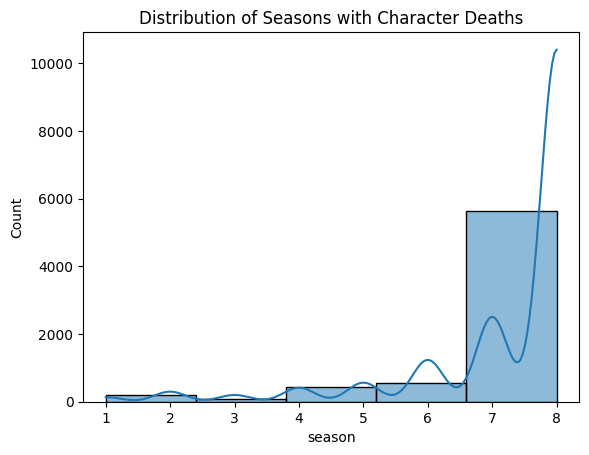

In [41]:
variable = 'season'

#Histogram for count
sns.histplot(df[variable], bins=5, kde=True)
plt.title('Distribution of Seasons with Character Deaths')
plt.show()


### Variable: Episode

In [42]:
#Variable: season
variable = 'episode'
print("Summary Statistics:")
print(df[variable].describe())
print("Mode:", df[variable].mode()[0])
print("Trimmed Mean:", trim_mean(df[variable].dropna(), 0.1))

Summary Statistics:
count    6887.00000
mean        4.52737
std         2.14405
min         1.00000
25%         3.00000
50%         3.00000
75%         6.00000
max        10.00000
Name: episode, dtype: float64
Mode: 3
Trimmed Mean: 4.156777354382145


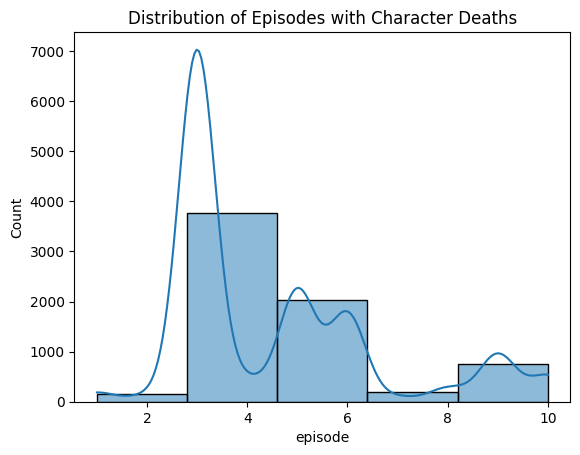

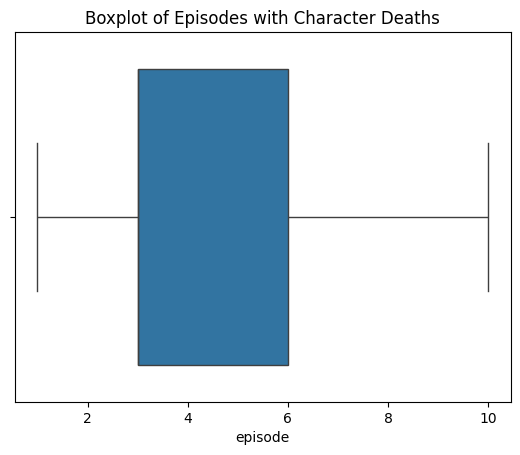

In [43]:
variable = 'episode'

#Histogram for count
sns.histplot(df[variable], bins=5, kde=True)
plt.title('Distribution of Episodes with Character Deaths')
plt.show()

#Boxplot to detect outliers
sns.boxplot(x=df[variable])
plt.title('Boxplot of Episodes with Character Deaths')
plt.show()

### Variable: Importance

In [44]:
#Variable: importance
variable = 'importance'
print("Summary Statistics:")
print(df[variable].describe())
print("Mode:", df[variable].mode()[0])
print("Trimmed Mean:", trim_mean(df[variable].dropna(), 0.1))


Summary Statistics:
count    6887.000000
mean        1.053289
std         0.332533
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: importance, dtype: float64
Mode: 1.0
Trimmed Mean: 1.0


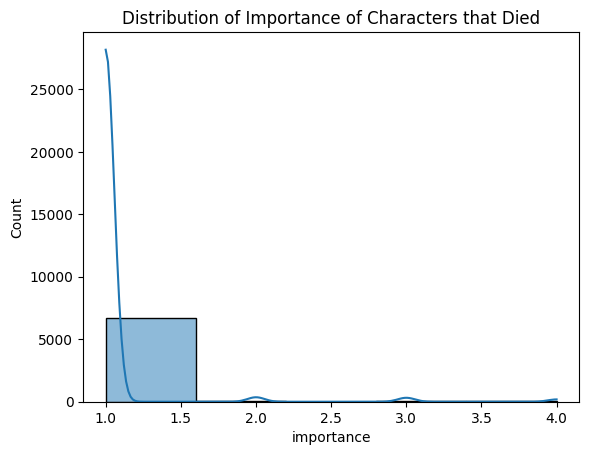

In [45]:
variable = 'importance'

#Histogram for count
sns.histplot(df[variable], bins=5, kde=True)
plt.title('Distribution of Importance of Characters that Died')
plt.show()



### Variable: Character Killed

Summary Statistics
character_killed
Wight                     2901
Horse                      755
Dothraki rider             743
Golden Company soldier     567
Lannister soldier          290
                          ... 
Raven                        1
Drogo’s horse                1
Qotho                        1
Nymeria Sand                 1
Gared                        1
Name: count, Length: 291, dtype: int64


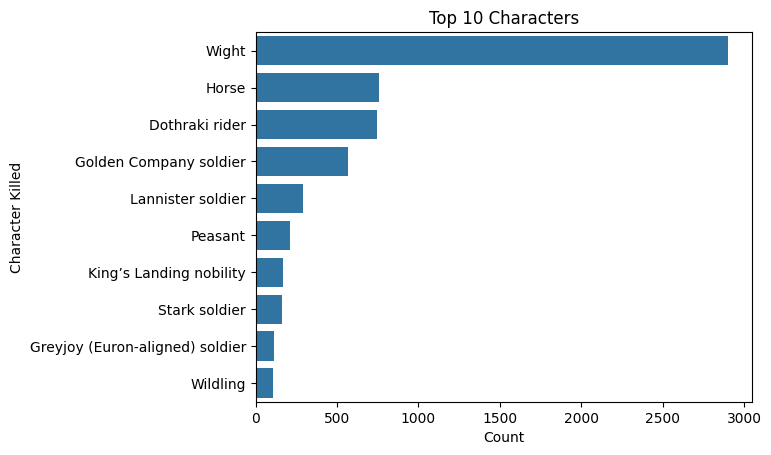

In [46]:
variable = "character_killed"

# Frequency 
print("Summary Statistics")
print(df[variable].value_counts())

# Bar plot of the top 10
top_10 = df[variable].value_counts().nlargest(10)
sns.barplot(y=top_10.index, x=top_10.values)
plt.title('Top 10 Characters')
plt.xlabel('Count')
plt.ylabel('Character Killed')
plt.show()

### Variable: Killer

Summary Statistics
killer
Wight               1602
Drogon              1426
Arya Stark          1278
Unknown              544
Rhaegal              273
                    ... 
Himself                1
Tommen Baratheon       1
Nymeria Sand           1
Sally's father         1
Lyanna Mormont         1
Name: count, Length: 147, dtype: int64


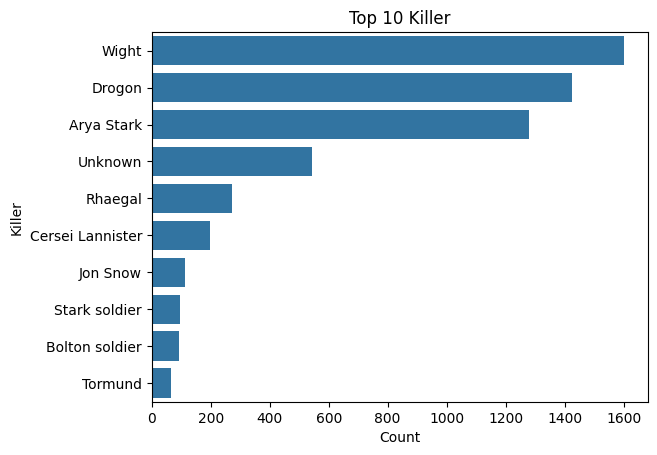

In [47]:
variable = "killer"

# Frequency 
print("Summary Statistics")
print(df[variable].value_counts())

# Bar plot of the top 10
top_10 = df[variable].value_counts().nlargest(10)
sns.barplot(y=top_10.index, x=top_10.values)
plt.title('Top 10 Killer')
plt.xlabel('Count')
plt.ylabel('Killer')
plt.show()

### Variable: Method

Summary Statistics
method
Dragonfire    1730
Unknown       1531
Magic         1193
Drowning       423
Sword          357
              ... 
Gangplank        1
Bell             1
Glaive           1
Freezing         1
Ice spear        1
Name: count, Length: 100, dtype: int64


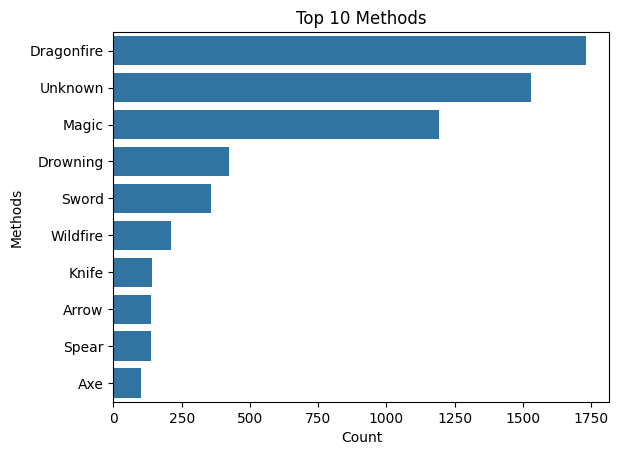

In [48]:
variable = "method"

# Frequency 
print("Summary Statistics")
print(df[variable].value_counts())

# Bar plot of the top 10
top_10 = df[variable].value_counts().nlargest(10)
sns.barplot(y=top_10.index, x=top_10.values)
plt.title('Top 10 Methods')
plt.xlabel('Count')
plt.ylabel('Methods')
plt.show()

### Variable: Method Category

Summary Statistics
method_cat
Animal            1756
Unknown           1532
Magic             1244
Blade              801
Other              481
Fire/Burning       307
Arrow              209
Polearm            139
Axe                133
Crushing           102
Poison              59
Hands               47
Bludgeon            44
Falling             26
Household item       4
Mace                 3
Name: count, dtype: int64


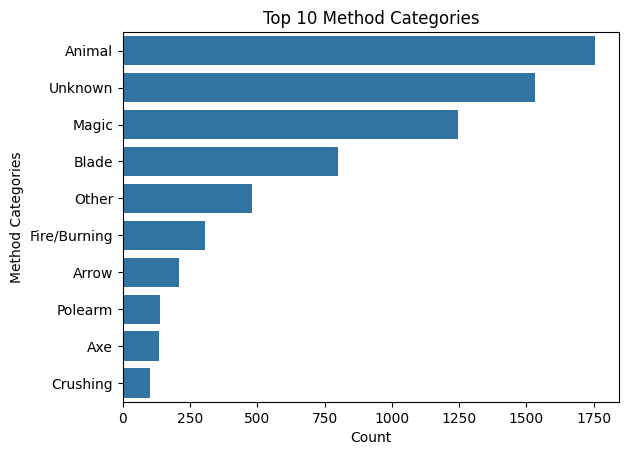

In [49]:
variable = "method_cat"

# Frequency 
print("Summary Statistics")
print(df[variable].value_counts())

# Bar plot of the top 10
top_10 = df[variable].value_counts().nlargest(10)
sns.barplot(y=top_10.index, x=top_10.values)
plt.title('Top 10 Method Categories')
plt.xlabel('Count')
plt.ylabel('Method Categories')
plt.show()

### Variable: Reason 

Summary Statistics
reason
Killed during the Battle of Winterfell                                                                                            2278
Killed during the Battle of Winterfell when the Night King falls                                                                  1191
Killed when Daenerys Targaryen attacked King’s Landing                                                                            1010
Killed during a wight hunt led by Jon Snow, who wanted to capture a wight to prove the existence of White Walkers.                 830
Killed in a coup by Cersei to remove all of her enemies                                                                            198
                                                                                                                                  ... 
Tackled Gregor off the Red Keep into the fires below, committing suicide, when he realized no common methods would kill Gregor       1
Died together with Cersei, cr

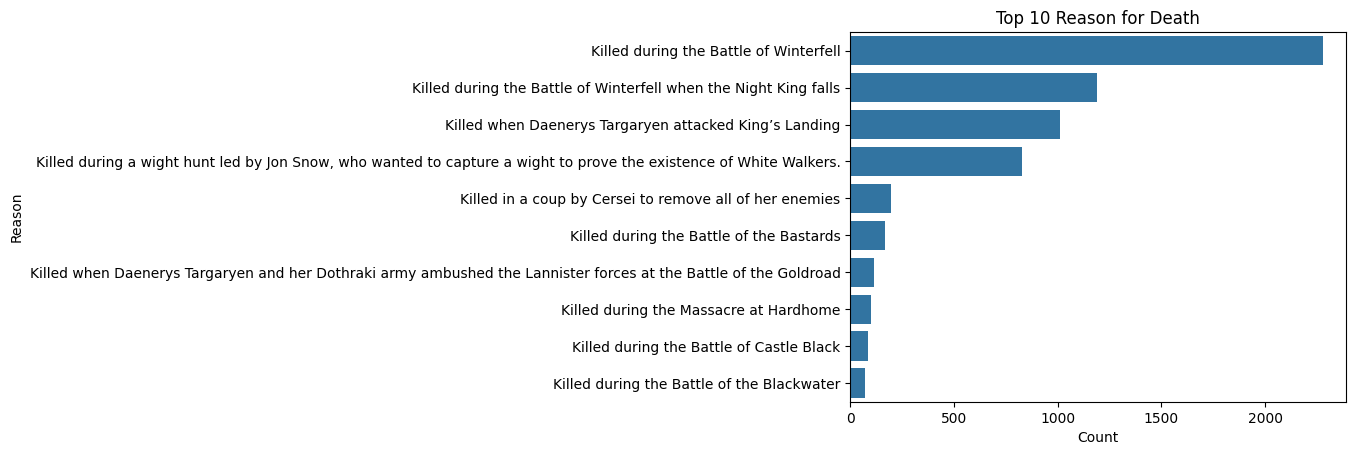

In [50]:
variable = "reason"

# Frequency 
print("Summary Statistics")
print(df[variable].value_counts())

# Bar plot of the top 10
top_10 = df[variable].value_counts().nlargest(10)
sns.barplot(y=top_10.index, x=top_10.values)
plt.title('Top 10 Reason for Death')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.show()

### Variable: Location

Summary Statistics
location
Winterfell           3709
King’s Landing       1357
Beyond the Wall       993
Meereen               154
Goldroad              116
Hardhome               99
The Twins              84
Castle Black           66
Narrow Sea             36
Riverlands             31
The Wall               31
Casterly Rock          26
Vaes Dothrak           18
Qarth                  15
Yunkai                 13
The Gift               13
Dreadfort              11
Dorne                  11
Mole’s Town            10
Braavos                10
The North               9
Dragonstone             9
Eastern Road            9
Astapor                 8
Red Waste               7
Tower of Joy            6
Riverrun                6
Unknown                 5
Storm’s End             3
Harrenhal               3
The Vale                3
Oxcross                 2
Kingsroad               2
The Eyrie               2
Robb Stark’s camp       2
Last Hearth             2
Lhazar                  1
Pentos    

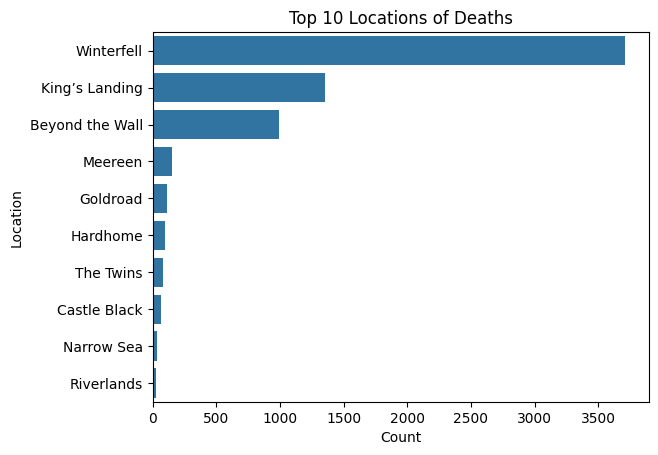

In [51]:
variable = "location"

# Frequency 
print("Summary Statistics")
print(df[variable].value_counts())

# Bar plot of the top 10
top_10 = df[variable].value_counts().nlargest(10)
sns.barplot(y=top_10.index, x=top_10.values)
plt.title('Top 10 Locations of Deaths')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

### Variable: Allegiance

Summary Statistics
allegiance
Unknown                              3917
House Targaryen                       843
Golden Company                        568
House Lannister                       319
Smallfolk                             226
House Stark                           180
Free Folk                             138
House Greyjoy (Euron-aligned)         111
House Bolton                           92
Sons of the Harpy                      71
Night’s Watch                          65
House Baratheon of Dragonstone         65
House Frey                             56
Wise Masters                           29
Dothraki                               26
House Baratheon of King’s Landing      24
House Greyjoy (Yara-aligned)           23
Faith Militant                         18
The Thirteen                           12
House Martell                          11
Brotherhood Without Banners            10
House Mormont                           8
Faith of the Seven                      7
Good

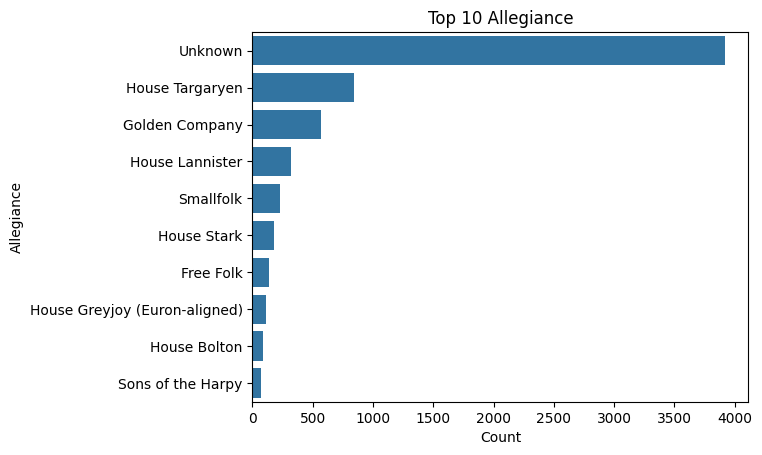

In [52]:
#First Alligiance
variable = "allegiance"

# Frequency 
print("Summary Statistics")
print(df[variable].value_counts())

# Bar plot of the top 10
top_10 = df[variable].value_counts().nlargest(10)
sns.barplot(y=top_10.index, x=top_10.values)
plt.title('Top 10 Allegiance')
plt.xlabel('Count')
plt.ylabel('Allegiance')
plt.show()

Summary Statistics
allegiance_2
No Second Allegiance                 6146
House Lannister                       575
Great Masters                          71
House Stark                            23
Night‘s Watch                          14
House Baratheon of King’s Landing       7
Night’s Watch                           7
House Targaryen                         7
Kingsguard                              7
Free Folk                               6
House Baelish                           5
House Baratheon of Dragonstone          2
The Thirteen                            2
House Bolton                            2
House Mormont                           2
The Lord of Light                       2
House Arryn                             1
House Greyjoy                           1
House Tully                             1
House Florent                           1
House Hightower                         1
House Thorne                            1
House Dayne                             1
Ho

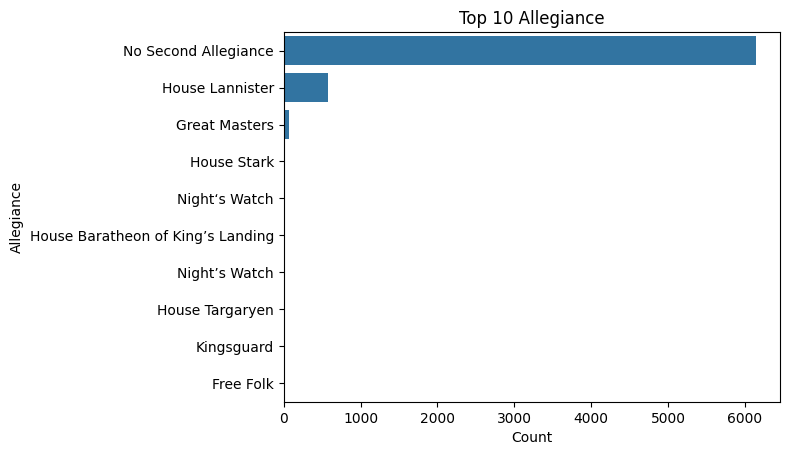

In [53]:
#Second Alligiance
variable = "allegiance_2"

# Frequency 
print("Summary Statistics")
print(df[variable].value_counts())

# Bar plot of the top 10
top_10 = df[variable].value_counts().nlargest(10)
sns.barplot(y=top_10.index, x=top_10.values)
plt.title('Top 10 Allegiance')
plt.xlabel('Count')
plt.ylabel('Allegiance')
plt.show()

## Question 1: How does the number of deaths vary across seasons and episodes?


season
1      59
2     130
3      87
4     181
5     246
6     540
7    1096
8    4548
Name: count, dtype: int64


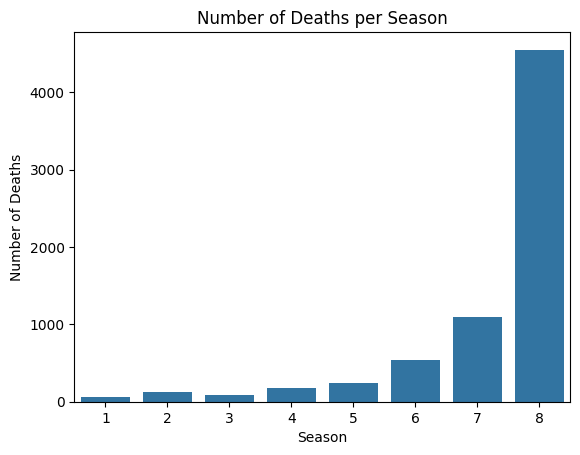

In [54]:
#Number of deaths per season

season_counts = df['season'].value_counts().sort_index()
print(season_counts)

# Plot bar graph
sns.barplot(x=season_counts.index, y=season_counts.values)
plt.title('Number of Deaths per Season')
plt.xlabel('Season')
plt.ylabel('Number of Deaths')
plt.show()

### Number of deaths per season
The plot above shows the count of the deaths for every season from season 1 to 8. We can see that there is a progression with the amount of deaths the season has. Season one contains the lowest amount of deaths with 59 while season 8 got the highest with 4,548; 3,452 more than Season 7, the second highest in the death count. 

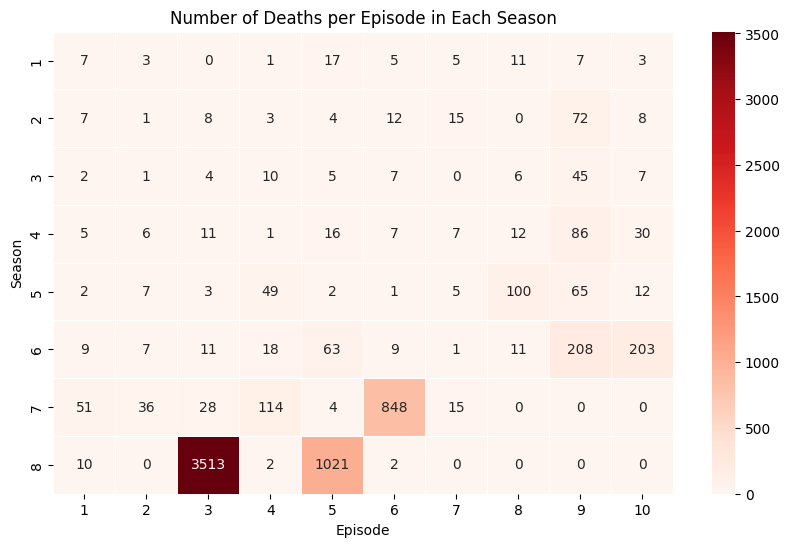

In [55]:
#Deaths per episode
# group the season and its episode to count deaths
pivot_table = df.groupby(['season', 'episode']).size().unstack(fill_value=0)

# Plot heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='Reds', linewidths=0.5, annot=True, fmt='d')
plt.title('Number of Deaths per Episode in Each Season')
plt.xlabel('Episode')
plt.ylabel('Season')
plt.show()

### Number of deaths per episode

From the heatmap, we can see that season 8 episode 3 had the most deaths with 3,513. There were 2 episodes in sason 8 that significantly contributed to it having the most death counts across all the season and those two episodes are 3 and 5. The following episode that is in the higher range of the death count is episode 6 from season 7. We can also observe that towards the end of the season is where the death counts tend to rise, excluding the last two seasons. This is evident in seasons 2-6 where the last few episodes receive the highest death count.

## Question 2: What are the most common methods of death and how are they distributed across seasons?

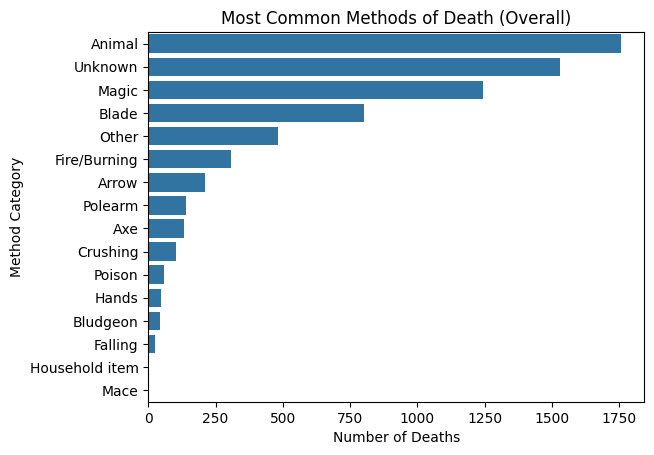

In [56]:
#Methods of death
# Count and sort
method_counts = df['method_cat'].value_counts()

# Plot
sns.barplot(y=method_counts.index, x=method_counts.values)
plt.title('Most Common Methods of Death (Overall)')
plt.xlabel('Number of Deaths')
plt.ylabel('Method Category')
plt.show()

### Most Common Method of Death
Overall, we can see based on the bar graph that most of the deaths were due to Animals garnering 1750 of the total killings. Following that is unknown garnering 1,500 of the kills. 

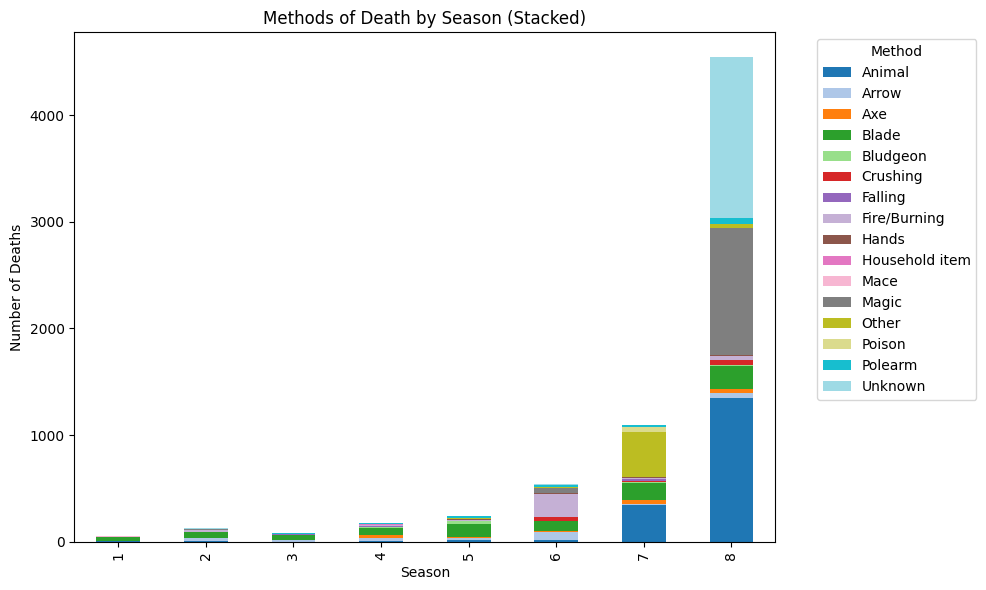

In [57]:
#Most Used Method per season
# Create a crosstab of methods vs. seasons
method_by_season = pd.crosstab(df['season'], df['method_cat'])

# Plot as stacked bar chart
method_by_season.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Methods of Death by Season (Stacked)')
plt.xlabel('Season')
plt.ylabel('Number of Deaths')
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

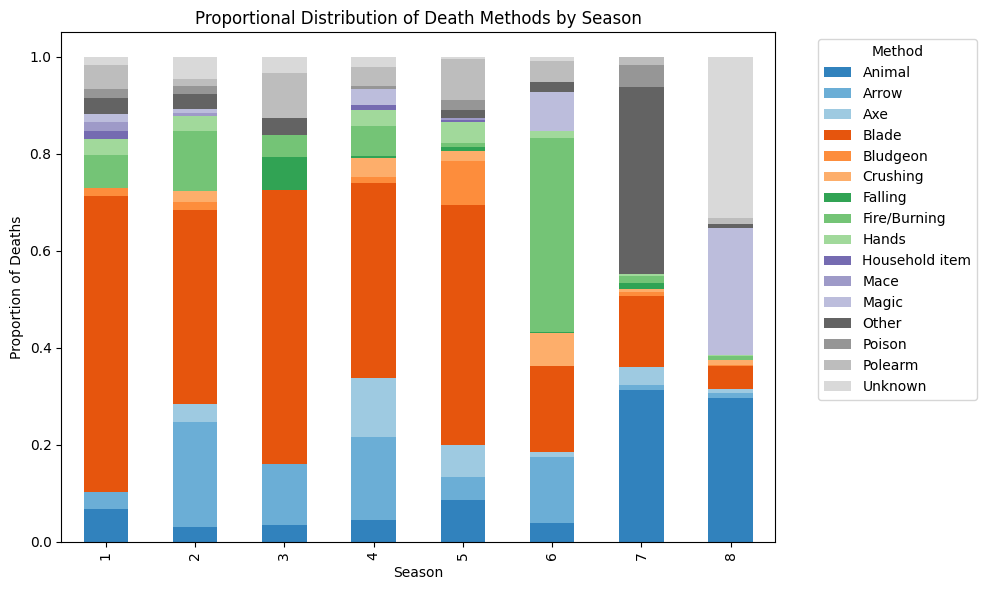

In [58]:
# Normalize version of previous graph
method_by_season_norm = method_by_season.div(method_by_season.sum(axis=1), axis=0)

# Plot
method_by_season_norm.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')
plt.title('Proportional Distribution of Death Methods by Season')
plt.xlabel('Season')
plt.ylabel('Proportion of Deaths')
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Most used method per season

We can observe from the graphs that the methods of death vary per season, other methods were prevelent than others across the show. From season 1, we can see that majority of the deaths were cause by a blade; the same thing can be said with seasons 2-5. Approaching season 6 the frequency of the blade method decreases and majority of the deaths were caused by fire. Most of the deaths in season were brought about through other means that were not explicitly stated in the data. Lastly, season 8's deaths were majority unknowns followed by animals and magic. 

## Question 3: How does a character’s original allegiance affect their likelihood of death, and are some factions more likely to lose important members?

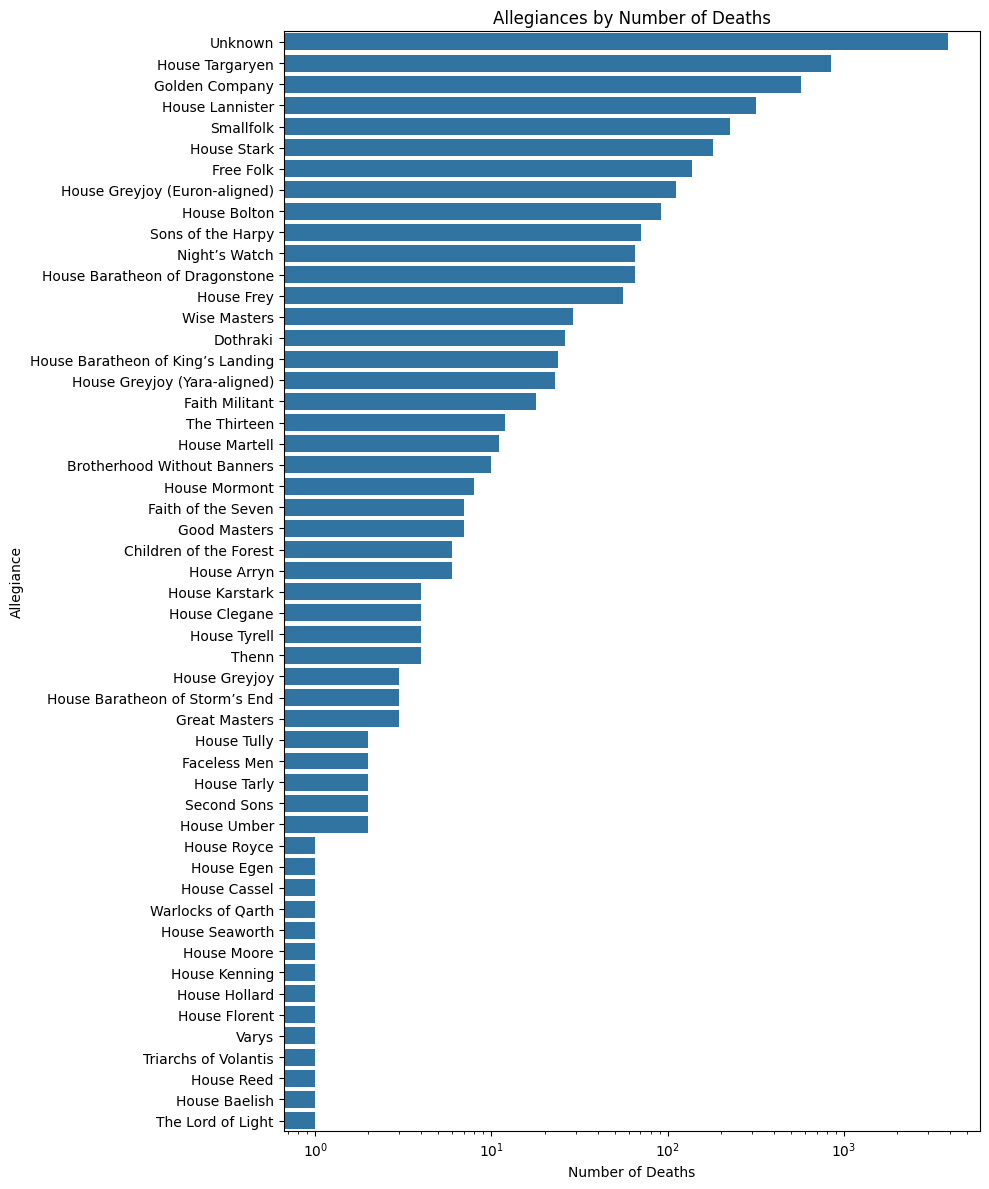

In [59]:
death_by_allegiance = df['allegiance'].value_counts()

plt.figure(figsize=(10, 12))
sns.barplot(x=death_by_allegiance.values, y=death_by_allegiance.index)
plt.xscale('log')
plt.title('Allegiances by Number of Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Allegiance')
plt.tight_layout()
plt.show()

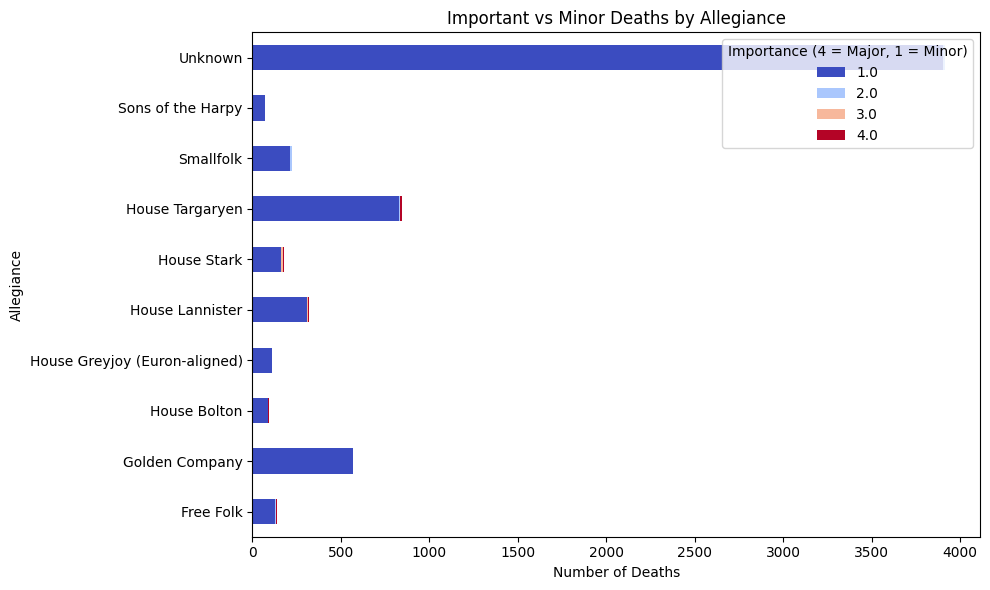

In [60]:
# Group deaths by allegiance and importance
importance_counts = df.groupby(['allegiance', 'importance']).size().unstack(fill_value=0)

top_factions = df['allegiance'].value_counts().head(10).index
importance_counts = importance_counts.loc[importance_counts.index.isin(top_factions)]

importance_counts.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Important vs Minor Deaths by Allegiance')
plt.xlabel('Number of Deaths')
plt.ylabel('Allegiance')
plt.legend(title='Importance (4 = Major, 1 = Minor)', loc='upper right')
plt.tight_layout()
plt.show()


We can observe from the graphs that there are a lot of deaths that have unknown allegiance, but this is focused on characters with little importance. The next highest death by allegiance is House Targeryen, even though the majority of characters are not important, there are still deaths with major roles. The House with most important and relevant characters killed was in House Stark.

## Question 4: Are there patterns in location of deaths? Do certain places have more major deaths?

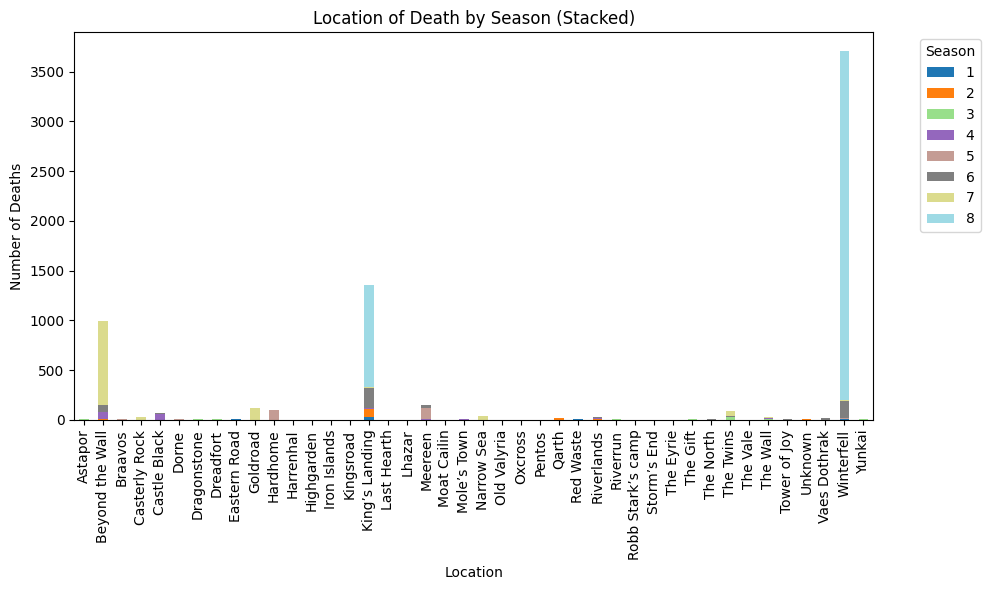

In [61]:
#Most Used Method per location
# Create a crosstab of location vs. seasons
location_by_season = pd.crosstab(df['location'], df['season'])

# Plot as stacked bar chart
location_by_season.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Location of Death by Season (Stacked)')
plt.xlabel('Location')
plt.ylabel('Number of Deaths')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

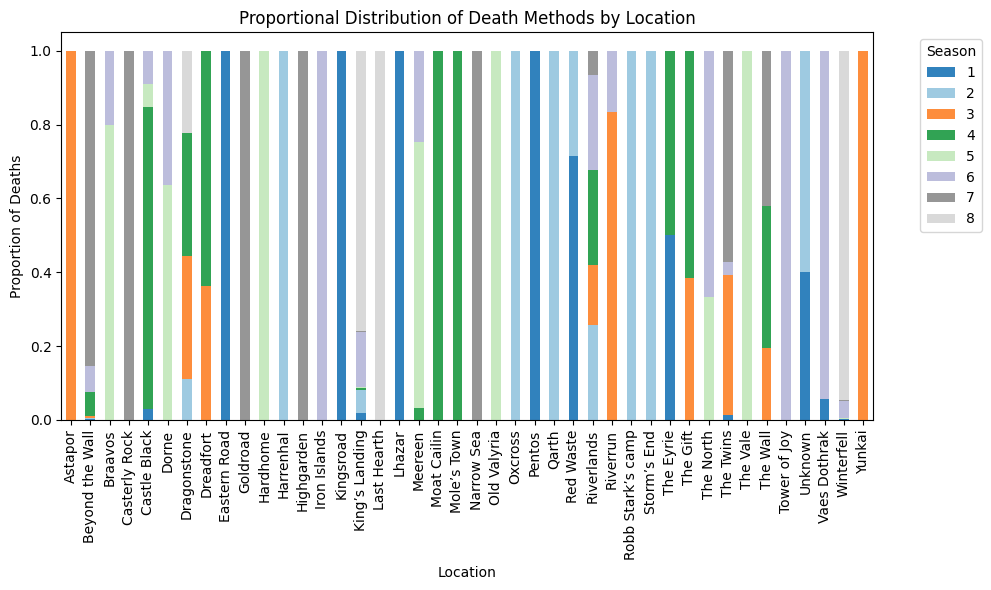

In [62]:
# Normalize version of previous graph
location_by_season_norm = location_by_season.div(location_by_season.sum(axis=1), axis=0)

# Plot
location_by_season_norm.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')
plt.title('Proportional Distribution of Death Methods by Location')
plt.xlabel('Location')
plt.ylabel('Proportion of Deaths')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Patterns in Location of Deaths

The graph shows clear patterns of deaths throughout the series. Winterfell, King's Landing, and Beyond the Wall had the highest death counts, with Winterfell and King's Landing showing a significant increase in death counts in Season 8 and Beyond the Wall in Season 7.
On the other hand, Qarth, Dorne, and the Iron Islands had consistently low death counts throughout the season.

location
Winterfell           3709
King’s Landing       1357
Beyond the Wall       993
Meereen               154
Goldroad              116
Hardhome               99
The Twins              84
Castle Black           66
Narrow Sea             36
Riverlands             31
The Wall               31
Casterly Rock          26
Vaes Dothrak           18
Qarth                  15
Yunkai                 13
The Gift               13
Dreadfort              11
Dorne                  11
Mole’s Town            10
Braavos                10
The North               9
Dragonstone             9
Eastern Road            9
Astapor                 8
Red Waste               7
Tower of Joy            6
Riverrun                6
Unknown                 5
Storm’s End             3
Harrenhal               3
The Vale                3
Oxcross                 2
Kingsroad               2
The Eyrie               2
Robb Stark’s camp       2
Last Hearth             2
Lhazar                  1
Pentos                  1
Old

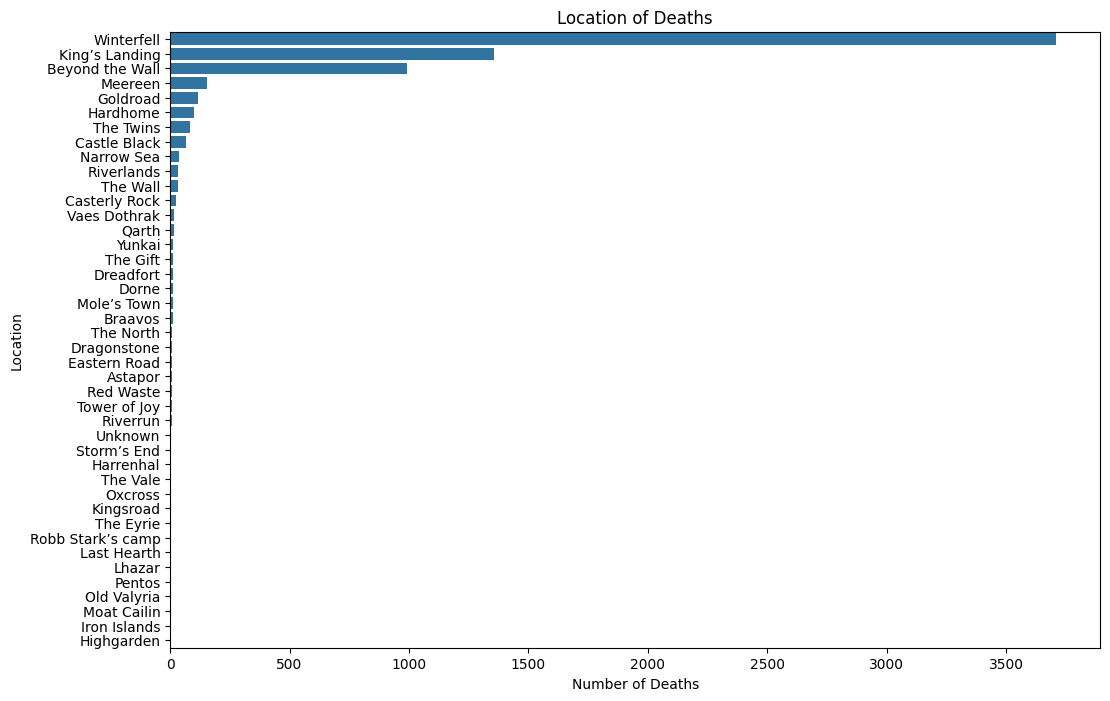

In [63]:
#Locations of deaths
# Count and sort
location_counts = df['location'].value_counts()
print(location_counts)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(y=location_counts.index, x=location_counts.values)
plt.title('Location of Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Location')
plt.show()

### Most Number of Deaths in a Location
Based on the bar graph, it is observed that most deaths happened in Winterfell, which has a number of 3709 deaths. The following location with the second highest number of deaths occurred in King's Landing, with several 1357 deaths. Moreover, less than 1000 deaths happened in the rest of the locations.

# <span style="color:red">  PHASE 2: Data Mining, Statistical Inference, Insights and Conclusions <span>

# Reseach Question
### **What patterns can be observed in character deaths in Game of Thrones, and how do factors such as allegiance, killer, method, and importance influence these deaths across seasons?**

## Data Mining : Association Rule Mining

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [65]:
from rule_miner import RuleMiner

#### Association Rule Mining

In this part we decided to split the data mining into seasons as different seasons vary in their death count. We will be testing our Rule Miner model with these test cases:

1. **{Killer, Method} → Importance** (If a character is killed by a certain killer using a specific method, is the character likely important?)
2. **{Allegiance (first), Importance} → Method Category** (Do important characters from specific houses tend to die in certain ways?)
3. **{Allegiance} → Killer** (Are people from certain allegiances more likely to be killed by specific groups?)
4. **{Killer, Location} → Allegiance** (Does a killer in a particular location tend to kill characters from a specific house?)
5. **{Reason, Allegiance} → Method** (Are people from a particular allegiance, killed for a particular reason, in a specific way?)

These test cases will be performed for all seasons and we'll base our analysis on the confidence that will be outputed. 



### Season 1

#### Load the season 1 baskets to s1_baskets

In [66]:
s1_baskets = pd.read_csv("season1_baskets.csv", header=None)

#### Format the dataset to accommodate rule mioner tasks

In [67]:
#Getting unique value
values = s1_baskets.values.ravel()
values = [value for value in pd.unique(values) if not pd.isnull(value)]

print("Unique values in Season 1:")
value_dict = {}
for i, value in enumerate(values):
    value_dict[value] = i
    print(value, i)

Unique values in Season 1:
Waymar Royce 0
White Walker 1
Ice sword 2
Blade 3
Unknown 4
Beyond the Wall 5
House Royce 6
Night’s Watch 7
Minor Character 8
Gared 9
No Second Allegiance 10
Will 11
Ned Stark 12
Sword (Ice) 13
Deserting the Night’s Watch 14
Winterfell 15
Stag 16
Direwolf 17
Direwolf teeth 18
Animal 19
Background Extra 20
Antler 21
Jon Arryn 22
Lysa Arryn 23
Poison 24
Petyr Baelish persuaded Lysa to do so for reasons unknown 25
King’s Landing 26
House Arryn 27
Dothraki man 28
Arakh 29
A Dothraki wedding without at least three deaths is a dull affair 30
Pentos 31
Dothraki 32
Catspaw assassin 33
Summer 34
Attempting to kill Bran Stark 35
Mycah 36
Sandor “the Hound” Clegane 37
Unknown (likely a sword) 38
Joffrey has him killed after Arya attacks Joffrey 39
Kingsroad 40
Smallfolk 41
Secondary Major 42
Lady 43
Knife 44
Robert Baratheon orders that Lady be killed to appease Cersei, who wants revenge after Nymeria attacked Joffrey 45
House Stark 46
Ser Hugh of the Vale 47
Gregor “th

In [68]:
#Displaying contents of season 1 baskets
s1_baskets = s1_baskets.stack().map(value_dict).unstack()

baskets = []
for i in range(s1_baskets.shape[0]):
    basket = np.sort([int(x) for x in s1_baskets.iloc[i].values.tolist() if str(x) != 'nan'])
    baskets.append(basket)

for i, basket in enumerate(baskets):
    print('Basket', i, basket)

Basket 0 [0 1 2 3 4 5 6 7 8]
Basket 1 [ 1  2  3  4  5  7  8  9 10]
Basket 2 [ 3  7  8 10 11 12 13 14 15]
Basket 3 [ 4  4 10 15 16 17 18 19 20]
Basket 4 [ 4  4 10 15 16 17 19 20 21]
Basket 5 [ 8 10 22 23 24 24 25 26 27]
Basket 6 [ 3 10 20 28 28 29 30 31 32]
Basket 7 [ 4 10 15 18 19 20 33 34 35]
Basket 8 [ 4 10 36 37 38 39 40 41 42]
Basket 9 [ 3 10 12 40 42 43 44 45 46]
Basket 10 [ 8 10 26 27 47 48 49 50 51]
Basket 11 [ 3 10 20 26 48 52 53 54 55]
Basket 12 [10 20 46 56 57 58 59 60 61]
Basket 13 [ 3  4 10 20 53 57 61 62 63]
Basket 14 [ 3  4 10 20 53 57 61 62 63]
Basket 15 [ 3  4 10 20 53 57 61 62 63]
Basket 16 [10 20 46 56 57 60 61 64 64]
Basket 17 [ 4 10 20 57 59 61 65 66 67]
Basket 18 [ 3  4 10 20 53 57 61 63 68]
Basket 19 [ 3  4 10 20 53 57 61 63 68]
Basket 20 [ 3  4 10 20 44 57 61 62 63]
Basket 21 [10 20 26 46 49 50 56 69 70]
Basket 22 [10 20 26 46 49 50 56 69 70]
Basket 23 [ 3 10 20 26 53 69 71 72 73]
Basket 24 [ 3 10 12 20 26 53 69 72 73]
Basket 25 [ 3 10 20 26 53 69 71 72 73]
Baske

In [69]:
s1_baskets = pd.read_csv("season1_baskets.csv", header=None)

# Assign column names
s1_baskets.columns = [
    'character_killed',
    'killer',
    'method',
    'method_cat',
    'reason',
    'location',
    'allegiance',
    'allegiance_2',
    'importance'
]

# Define columns to include in basket mining
columns_to_include = [
    'character_killed',
    'killer',
    'method',
    'method_cat',
    'reason',
    'location',
    'allegiance',
    'allegiance_2',
    'importance'
]

#Generate all unique item values with prefixes
values = []
for col in columns_to_include:
    unique_items = s1_baskets[col].dropna().unique()
    values.extend([f"{col}={item}" for item in unique_items])
values = list(dict.fromkeys(values))  # remove duplicates

#Build the list of baskets (each a list of prefixed items)
baskets = []
for _, row in s1_baskets.iterrows():
    basket = []
    for col in columns_to_include:
        value = row[col]
        if pd.notnull(value):
            basket.append(f"{col}={value}")
    baskets.append(basket)

#Create binary matrix with 0s
s1_baskets_df = pd.DataFrame(0, index=range(len(baskets)), columns=values)

#Mark 1s where item is present
for i, basket in enumerate(baskets):
    valid_items = [item for item in basket if item in s1_baskets_df.columns]
    s1_baskets_df.loc[i, valid_items] = 1

#Verify shape 
print(s1_baskets_df.shape)  

(59, 169)


#### Implement Association Rule Mining

Rule miner class instantiation with Support: 6 (estimated 10% of 59) and Confidence: 0.6 (60%)

In [70]:
rule_miner = RuleMiner(support_t=6, confidence_t=0.6)

In [71]:
association_rules = rule_miner.get_association_rules(s1_baskets_df)
print(association_rules)

[[['allegiance=House Stark', 'allegiance_2=No Second Allegiance', 'character_killed=Stark soldier', 'importance=Background Extra', 'location=King’s Landing', 'method=Sword', 'method_cat=Blade'], ['reason=Cersei Lannister and Joffrey Baratheon attacked the Starks because Ned Stark claimed Joffrey had no claim to the throne']], [['allegiance=House Stark', 'allegiance_2=No Second Allegiance', 'character_killed=Stark soldier', 'importance=Background Extra', 'location=King’s Landing', 'method=Sword', 'reason=Cersei Lannister and Joffrey Baratheon attacked the Starks because Ned Stark claimed Joffrey had no claim to the throne'], ['method_cat=Blade']], [['allegiance=House Stark', 'allegiance_2=No Second Allegiance', 'character_killed=Stark soldier', 'importance=Background Extra', 'location=King’s Landing', 'method_cat=Blade', 'reason=Cersei Lannister and Joffrey Baratheon attacked the Starks because Ned Stark claimed Joffrey had no claim to the throne'], ['method=Sword']], [['allegiance=Hous

In [72]:
#Test Cases (B C I)
#1: {Killer, Method} → Importance
confidence_1 = rule_miner.get_confidence(s1_baskets_df, 
                                       [['killer=White Walker', 'method=Ice sword'], ['importance=Minor Character']])

print('{White Walker, Ice sword} → Minor Character')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s1_baskets_df, 
                                       [['killer=Lannister soldier', 'method=Sword'], ['importance=Background Extra']])
print('{Lannister soldier, Sword} → Background Extra')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s1_baskets_df, 
                                       [['killer=Stag', 'method=Antler'], ['importance=Secondary Major']])
print('{Stag, Antler} → Secondary Major')
print('Confidence  = {:.2f}'.format(confidence_3))

{White Walker, Ice sword} → Minor Character
Confidence = 1.00
{Lannister soldier, Sword} → Background Extra
Confidence  = 0.67
{Stag, Antler} → Secondary Major
Confidence  = 0.00


In [73]:
#Test Cases (G I D)
#2: {Allegiance, Importance} → Method Category
confidence_1 = rule_miner.get_confidence(s1_baskets_df, 
                                       [['allegiance=Unknown', 'importance=Background Extra'], ['method_cat=Animal']])

print('{Unknown, Background Extra} → Animal')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s1_baskets_df, 
                                       [['allegiance=Unknown', 'importance=Background Extra'], ['method_cat=Blade']])
print('{Unknown, Background Extra} → Blade')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s1_baskets_df, 
                                       [['allegiance=House Royce', 'importance=Minor Character'], ['method_cat=Unknown']])
print('{House Royce, Minor Character} → Unknown')
print('Confidence  = {:.2f}'.format(confidence_3))

{Unknown, Background Extra} → Animal
Confidence = 0.21
{Unknown, Background Extra} → Blade
Confidence  = 0.43
{House Royce, Minor Character} → Unknown
Confidence  = 0.00


In [74]:
#Test Cases (G B)
#3: {Allegiance} → Killer
confidence_1 = rule_miner.get_confidence(s1_baskets_df, 
                                       [['allegiance=House Stark'], ['killer=Ned Stark']])

print('{House Stark} → Ned Stark')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s1_baskets_df, 
                                       [['allegiance=Unknown'], ['killer=Direwolf']])
print('{Unknown} → Direwolf')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s1_baskets_df, 
                                       [['allegiance=Unknown'], ['killer=Bronn']])
print('{Unknown} → Bronn')
print('Confidence  = {:.2f}'.format(confidence_3))

{House Stark} → Ned Stark
Confidence = 0.05
{Unknown} → Direwolf
Confidence  = 0.07
{Unknown} → Bronn
Confidence  = 0.27


In [75]:
#Test Cases (B F G)
#4: {Killer, Location} → Allegiance
confidence_1 = rule_miner.get_confidence(s1_baskets_df, 
                                       [['killer=White Walker','location=Beyond the Wall'], ['allegiance=House Royce']])

print('{White Walker, Beyond the Wall} → House Royce')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s1_baskets_df, 
                                       [['killer=Rodrik Cassel','location=Eastern Road'], ['allegiance=House Royce']])
print('{Rodrik Cassel, Eastern Road} → House Royce')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s1_baskets_df, 
                                       [['killer=Daenerys Targaryen','location=Red Waste'], ['allegiance=Dothraki']])
print('{Daenerys Targaryen, Red Waste} → Dothraki')
print('Confidence  = {:.2f}'.format(confidence_3))

{White Walker, Beyond the Wall} → House Royce
Confidence = 0.50
{Rodrik Cassel, Eastern Road} → House Royce
Confidence  = 0.00
{Daenerys Targaryen, Red Waste} → Dothraki
Confidence  = 0.50


In [76]:
#Test Cases (E G C)
#5: {Reason, Allegiance} → Method
confidence_1 = rule_miner.get_confidence(s1_baskets_df, 
                                       [['reason=Gregor was angry at being unhorsed in the tournament by Loras Tyrell', 'allegiance=House Clegane'], ['method=Sword']])

print('{Gregor was angry at being unhorsed in the tournament by Loras Tyrell, House Clegane} → Sword')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s1_baskets_df, 
                                       [['reason=Attacked while helping Catelyn Stark take Tyrion Lannister to the Vale', 'allegiance=House Stark'], ['method=Shield']])
print('{Attacked while helping Catelyn Stark take Tyrion Lannister to the Vale, House Starky} → Shield')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s1_baskets_df, 
                                       [['reason=Killed to prevent a message from leaving The Twins', 'allegiance=House Arryn'], ['method=Knife']])
print('{Killed to prevent a message from leaving The Twins, House Arryn} → Knife')
print('Confidence  = {:.2f}'.format(confidence_3))

{Gregor was angry at being unhorsed in the tournament by Loras Tyrell, House Clegane} → Sword
Confidence = 1.00
{Attacked while helping Catelyn Stark take Tyrion Lannister to the Vale, House Starky} → Shield
Confidence  = 0.00
{Killed to prevent a message from leaving The Twins, House Arryn} → Knife
Confidence  = 0.00


### Associate Rule Mining Analysis (Season 1)

It is noted that several confidence values equalled 0, and some were below 0.5, meaning most association rules possess very weak predictability. This implies that, as per the test cases, specific character attributes or events hardly cause death in Season 1 of Game of Thrones. Only two rules had a confidence of 1.0, which means that in both instances, whenever the antecedent was present, the character's death invariably resulted.

### Season 2

#### Load the season 2 baskets to s2_baskets

In [77]:
s2_baskets = pd.read_csv("season2_baskets.csv", header=None)

#### Format the dataset to accommodate rule mioner tasks

In [78]:
#Getting unique values 
values = s2_baskets.values.ravel()
values = [value for value in pd.unique(values) if not pd.isnull(value)]

print("Unique values in Season 2:")
value_dict = {}
for i, value in enumerate(values):
    value_dict[value] = i
    print(value, i)

Unique values in Season 2:
Knight 0
Sandor “the Hound” Clegane 1
Mace 2
Defeated in nameday tournament for Joffrey Baratheon 3
King’s Landing 4
Unknown 5
No Second Allegiance 6
Background Extra 7
The Silver 8
Starvation 9
Other 10
No food or water in the Red Waste 11
Red Waste 12
Dothraki 13
House Targaryen 14
Minor Character 15
Maester Cressen 16
Melisandre “the Red Woman” of Asshai 17
Poison (magic?) 18
Poison 19
Tried to kill Melisandre 20
Dragonstone 21
House Baratheon of Dragonstone 22
Barra (Baratheon illegitimate daughter) 23
Janos Slynt 24
Knife 25
Blade 26
Joffrey Baratheon orders all of Robert Baratheon’s illegitimate children to be killed 27
Smallfolk 28
Robert Baratheon’s illegitimate son 29
City watch guard 30
Water (drowning) 31
Rakharo 32
Unknown Dothraki 33
Unknown (possibly as a challenge to Daenerys Targaryen’s khalasar) 34
Secondary Major 35
Lannister soldier 36
Yoren 37
Sword 38
Attempted to take Gendry from Yoren’s Night’s Watch recruits 39
Riverlands 40
House Lann

In [79]:
#Displaying contents of season 2 baskets
s2_baskets = s2_baskets.stack().map(value_dict).unstack()

baskets = []
for i in range(s2_baskets.shape[0]):
    basket = np.sort([int(x) for x in s2_baskets.iloc[i].values.tolist() if str(x) != 'nan'])
    baskets.append(basket)

for i, basket in enumerate(baskets):
    print('Basket', i, basket)

Basket 0 [0 1 2 2 3 4 5 6 7]
Basket 1 [ 5  8  9 10 11 12 13 14 15]
Basket 2 [ 6 15 16 17 18 19 20 21 22]
Basket 3 [ 4  6 15 23 24 25 26 27 28]
Basket 4 [ 4  6  7 25 26 27 28 29 30]
Basket 5 [ 4  6  7 10 27 28 29 30 31]
Basket 6 [ 4  5  5  6  7 27 28 29 30]
Basket 7 [ 5  5 12 13 14 32 33 34 35]
Basket 8 [ 6  7 26 36 37 38 39 40 41]
Basket 9 [ 6  7 26 36 37 38 39 40 41]
Basket 10 [ 6  7 26 36 37 38 39 40 41]
Basket 11 [ 6  7 26 36 37 38 39 40 41]
Basket 12 [ 6  7 26 36 37 38 39 40 41]
Basket 13 [ 6 26 35 37 38 40 42 43 44]
Basket 14 [ 6  7 36 40 44 45 46 47 48]
Basket 15 [ 6 15 26 28 40 49 50 51 52]
Basket 16 [ 6 15 41 53 54 55 56 57 58]
Basket 17 [ 6  7 36 41 54 55 56 57 58]
Basket 18 [ 5  6  7 56 59 60 61 62 63]
Basket 19 [ 6 17 64 65 66 67 68 69 70]
Basket 20 [ 6  7 26 38 68 69 71 72 73]
Basket 21 [ 6  7 26 38 68 69 71 72 73]
Basket 22 [ 5  5  6 15 60 63 74 75 76]
Basket 23 [26 35 38 77 78 79 80 81 82]
Basket 24 [ 6  7 83 84 85 85 86 87 88]
Basket 25 [ 6  7 26 38 83 86 87 88 89]
Baske

In [80]:
s2_baskets = pd.read_csv("season2_baskets.csv", header=None)

# Assign column names
s2_baskets.columns = [
    'character_killed',
    'killer',
    'method',
    'method_cat',
    'reason',
    'location',
    'allegiance',
    'allegiance_2',
    'importance'
]

# Define columns to include in basket mining
columns_to_include = [
    'character_killed',
    'killer',
    'method',
    'method_cat',
    'reason',
    'location',
    'allegiance',
    'allegiance_2',
    'importance'
]

#Generate all unique item values with prefixes
values = []
for col in columns_to_include:
    unique_items = s2_baskets[col].dropna().unique()
    values.extend([f"{col}={item}" for item in unique_items])
values = list(dict.fromkeys(values))  # remove duplicates

#Build the list of baskets (each a list of prefixed items)
baskets = []
for _, row in s2_baskets.iterrows():
    basket = []
    for col in columns_to_include:
        value = row[col]
        if pd.notnull(value):
            basket.append(f"{col}={value}")
    baskets.append(basket)

#Create binary matrix with 0s
s2_baskets_df = pd.DataFrame(0, index=range(len(baskets)), columns=values)

#Mark 1s where item is present
for i, basket in enumerate(baskets):
    valid_items = [item for item in basket if item in s2_baskets_df.columns]
    s2_baskets_df.loc[i, valid_items] = 1

#Verify shape
print(s2_baskets_df.shape)  

(130, 185)


#### Implement Association Rule Mining

Rule miner class instantiation with Support: 13 (10% of 130) and Confidence: 0.6 (60%)

In [81]:
rule_miner = RuleMiner(support_t=13, confidence_t=0.6)

In [82]:
association_rules = rule_miner.get_association_rules(s2_baskets_df)
print(association_rules)

[[['allegiance=House Baratheon of Dragonstone', 'allegiance_2=No Second Allegiance', 'character_killed=Baratheon of Dragonstone soldier', 'importance=Background Extra', 'killer=Baratheon of King’s Landing soldier', 'location=King’s Landing', 'method=Flaming arrow', 'method_cat=Arrow'], ['reason=Killed during the Battle of the Blackwater']], [['allegiance=House Baratheon of Dragonstone', 'allegiance_2=No Second Allegiance', 'character_killed=Baratheon of Dragonstone soldier', 'importance=Background Extra', 'killer=Baratheon of King’s Landing soldier', 'location=King’s Landing', 'method=Flaming arrow', 'reason=Killed during the Battle of the Blackwater'], ['method_cat=Arrow']], [['method_cat=Arrow'], ['allegiance=House Baratheon of Dragonstone', 'allegiance_2=No Second Allegiance', 'character_killed=Baratheon of Dragonstone soldier', 'importance=Background Extra', 'killer=Baratheon of King’s Landing soldier', 'location=King’s Landing', 'method=Flaming arrow', 'reason=Killed during the Ba

In [83]:
#Test Cases (B C I)
#1: {Killer, Method} → Importance
confidence_1 = rule_miner.get_confidence(s2_baskets_df, 
                                       [['killer=Unknown', 'method=Starvation'], ['importance=Minor Character']])

print('{Unknown, Starvation} → Minor Character')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s2_baskets_df, 
                                       [['killer=Daenerys Targaryen', 'method=Sealed into vault'], ['importance=Background Extra']])
print('{Daenerys Targaryen, Sealed into vault} → Background Extra')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s2_baskets_df, 
                                       [['killer=Yoren', 'method=Sword'], ['importance=Secondary Major']])
print('{Yoren, Sword} → Secondary Major')
print('Confidence  = {:.2f}'.format(confidence_3))

{Unknown, Starvation} → Minor Character
Confidence = 1.00
{Daenerys Targaryen, Sealed into vault} → Background Extra
Confidence  = 0.00
{Yoren, Sword} → Secondary Major
Confidence  = 0.00


In [84]:
#Test Cases (G I D)
#2: {Allegiance, Importance} → Method Category
confidence_1 = rule_miner.get_confidence(s2_baskets_df, 
                                       [['allegiance=House Lannister', 'importance=Background Extra'], ['method_cat=Blade']])

print('{House Lannister, Background Extra} → Blade')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s2_baskets_df, 
                                       [['allegiance=Unknown', 'importance=Background Extra'], ['method_cat=Mace']])
print('{Unknown, Background Extra} → Mace')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s2_baskets_df, 
                                       [['allegiance=House Baratheon of Dragonstone', 'importance=Background Extra'], ['method_cat=Unknown']])
print('{House Baratheon of Dragonstone, Background Extra} → Unknown')
print('Confidence  = {:.2f}'.format(confidence_3))

{House Lannister, Background Extra} → Blade
Confidence = 0.83
{Unknown, Background Extra} → Mace
Confidence  = 0.50
{House Baratheon of Dragonstone, Background Extra} → Unknown
Confidence  = 0.04


In [85]:
#Test Cases (G B)
#3: {Allegiance} → Killer
confidence_1 = rule_miner.get_confidence(s2_baskets_df, 
                                       [['allegiance=House Baratheon of Dragonstone'], ['killer=Accident']])

print('{House Baratheon of Dragonstone} → Accident')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s2_baskets_df, 
                                       [['allegiance=Smallfolk'], ['killer=City watch guard']])
print('{Smallfolk} → City watch guard')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s2_baskets_df, 
                                       [['allegiance=House Lannister'], ['killer=Yoren']])
print('{House Lannister} → Yoren')
print('Confidence  = {:.2f}'.format(confidence_3))

{House Baratheon of Dragonstone} → Accident
Confidence = 0.02
{Smallfolk} → City watch guard
Confidence  = 0.25
{House Lannister} → Yoren
Confidence  = 0.56


In [86]:
#Test Cases (B F G)
#4: {Killer, Location} → Allegiance
confidence_1 = rule_miner.get_confidence(s2_baskets_df, 
                                       [['killer=Yoren','location=Riverlands'], ['allegiance=House Lannister']])

print('{Yoren, Riverlands} → House Lannister')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s2_baskets_df, 
                                       [['killer=Amory Lorch','location=Riverlands'], ['allegiance=Free Folk']])
print('{Amory Lorch, Riverlands} → Free Folk')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s2_baskets_df, 
                                       [['killer=Theon Greyjoy','location=Winterfell'], ['allegiance=Smallfolk']])
print('{Theon Greyjoy, Winterfell} → Smallfolk')
print('Confidence  = {:.2f}'.format(confidence_3))

{Yoren, Riverlands} → House Lannister
Confidence = 1.00
{Amory Lorch, Riverlands} → Free Folk
Confidence  = 0.00
{Theon Greyjoy, Winterfell} → Smallfolk
Confidence  = 0.67


In [87]:
#Test Cases (E G C)
#5: {Reason, Allegiance} → Method
confidence_1 = rule_miner.get_confidence(s2_baskets_df, 
                                       [['reason=Killed for being a wildling lookout', 'allegiance=Free Folk'], ['method=Sword']])

print('{Killed for being a wildling lookout, Free Folk} → Sword')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s2_baskets_df, 
                                       [['reason=Killed so that Osha could escape from Winterfell with Bran Stark, Rickon Stark and Hodor', 'allegiance=House Greyjoy'], ['method=Knife']])
print('{Killed so that Osha could escape from Winterfell with Bran Stark, Rickon Stark and Hodor, House Greyjoy} → Knife')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s2_baskets_df, 
                                       [['reason=Theon needed to fool everyone into thinking he had killed Bran and Rickon Stark', 'allegiance=Smallfolk'], ['method=Wildfire']])
print('{Theon needed to fool everyone into thinking he had killed Bran and Rickon Stark, Smallfolk} → Wildfire')
print('Confidence  = {:.2f}'.format(confidence_3))

{Killed for being a wildling lookout, Free Folk} → Sword
Confidence = 0.50
{Killed so that Osha could escape from Winterfell with Bran Stark, Rickon Stark and Hodor, House Greyjoy} → Knife
Confidence  = 1.00
{Theon needed to fool everyone into thinking he had killed Bran and Rickon Stark, Smallfolk} → Wildfire
Confidence  = 0.00


### Association Rule Mining Analysis (Season 2)

It is observed that most Season 2 confidence values ended up with scores of 0.5 and higher, which signify more robust connections between character traits and the chance of death. This implies that, unlike Season 1, Season 2 holds a higher predictive capacity. Some low-confidence rules suggest that not all patterns recurrently result in character deaths. The greater average confidence means that Season 2 deaths were more consistent with observable characteristics or conditions.

### Season 3

#### Load the season 3 baskets to s3_baskets

In [88]:
s3_baskets = pd.read_csv("season3_baskets.csv", header=None)

#### Format the dataset to accommodate rule mioner tasks

In [89]:
#Getting unique values 
values = s3_baskets.values.ravel()
values = [value for value in pd.unique(values) if not pd.isnull(value)]

print("Unique values in Season 3:")
value_dict = {}
for i, value in enumerate(values):
    value_dict[value] = i
    print(value, i)

Unique values in Season 3:
Wight 0
Jeor Mormont 1
Fire 2
Fire/Burning 3
Attacked Sam Tarly 4
Beyond the Wall 5
Unknown 6
No Second Allegiance 7
Background Extra 8
Manticore 9
Barristan Selmy 10
Knife 11
Blade 12
Attacked Daenerys Targaryen 13
Astapor 14
Hoster Tully 15
Illness 16
Other 17
Natural causes 18
Riverrun 19
House Tully 20
Minor Character 21
Bolton soldier 22
Ramsay Bolton 23
Arrow 24
Attacked Theon Greyjoy when he tried to escape torture 25
Dreadfort 26
House Bolton 27
Bannen 28
Broken foot 29
Critically wounded at the Battle of the Fist of the First Men 30
Night’s Watch 31
Craster 32
Karl Tanner 33
Attacked Karl Tanner after he insulted Craster and demanded more food 34
Secondary Major 35
Rast 36
Attacked in a mutiny 37
House Mormont 38
Major Character 39
Astapor slaver 40
Unsullied 41
Spear 42
Polearm 43
Ordered to by Daenerys Targaryen during her sack of Astapor 44
Good Masters 45
Kraznys mo Nakloz 46
Drogon 47
Dragonfire 48
Animal 49
Daenerys wanted to take the Unsullied

In [90]:
#Displaying contents of season 3 baskets
s3_baskets = s3_baskets.stack().map(value_dict).unstack()

baskets = []
for i in range(s3_baskets.shape[0]):
    basket = np.sort([int(x) for x in s3_baskets.iloc[i].values.tolist() if str(x) != 'nan'])
    baskets.append(basket)

for i, basket in enumerate(baskets):
    print('Basket', i, basket)

Basket 0 [0 1 2 3 4 5 6 7 8]
Basket 1 [ 6  7  8  9 10 11 12 13 14]
Basket 2 [ 6  7 15 16 17 18 19 20 21]
Basket 3 [ 7  8 22 23 24 24 25 26 27]
Basket 4 [ 7  8 22 23 24 24 25 26 27]
Basket 5 [ 7  8 22 23 24 24 25 26 27]
Basket 6 [ 7  8 22 23 24 24 25 26 27]
Basket 7 [ 5  6  7  8 17 28 29 30 31]
Basket 8 [ 5  7 11 12 31 32 33 34 35]
Basket 9 [ 1  5 11 12 31 36 37 38 39]
Basket 10 [ 7  8 14 40 41 42 43 44 45]
Basket 11 [ 7  8 14 40 41 42 43 44 45]
Basket 12 [ 7 14 35 45 46 47 48 49 50]
Basket 13 [ 7  8 14 41 42 43 45 51 52]
Basket 14 [ 7  8 14 41 42 43 45 51 52]
Basket 15 [ 7  8 14 41 42 43 45 51 52]
Basket 16 [ 7  8 14 40 41 42 43 45 52]
Basket 17 [12 35 53 54 55 56 57 58 59]
Basket 18 [ 7  8 12 19 55 60 61 62 63]
Basket 19 [ 6  6  7 19 21 61 64 65 66]
Basket 20 [ 7 11 12 19 21 65 66 67 68]
Basket 21 [12 19 35 55 63 68 69 70 71]
Basket 22 [ 6  7  8 72 73 73 74 75 76]
Basket 23 [ 6  7  8 72 73 73 74 75 76]
Basket 24 [ 6  7  8 72 73 73 74 75 76]
Basket 25 [ 6  7  8 72 73 73 74 75 76]
Baske

In [91]:
s3_baskets = pd.read_csv("season3_baskets.csv", header=None)

# Assign column names
s3_baskets.columns = [
    'character_killed',
    'killer',
    'method',
    'method_cat',
    'reason',
    'location',
    'allegiance',
    'allegiance_2',
    'importance'
]

# Define columns to include in basket mining
columns_to_include = [
    'character_killed',
    'killer',
    'method',
    'method_cat',
    'reason',
    'location',
    'allegiance',
    'allegiance_2',
    'importance'
]

#Generate all unique item values with prefixes
values = []
for col in columns_to_include:
    unique_items = s3_baskets[col].dropna().unique()
    values.extend([f"{col}={item}" for item in unique_items])
values = list(dict.fromkeys(values))  # remove duplicates

#Build the list of baskets (each a list of prefixed items)
baskets = []
for _, row in s3_baskets.iterrows():
    basket = []
    for col in columns_to_include:
        value = row[col]
        if pd.notnull(value):
            basket.append(f"{col}={value}")
    baskets.append(basket)

#Create binary matrix with 0s
s3_baskets_df = pd.DataFrame(0, index=range(len(baskets)), columns=values)

#Mark 1s where item is present
for i, basket in enumerate(baskets):
    valid_items = [item for item in basket if item in s3_baskets_df.columns]
    s3_baskets_df.loc[i, valid_items] = 1

#Verify shape 
print(s3_baskets_df.shape)

(87, 144)


#### Implement Association Rule Mining

Rule miner class instantiation with Support: 9 (estimated 10% of 87) and Confidence: 0.6 (60%)

In [92]:
rule_miner = RuleMiner(support_t=9, confidence_t=0.6)

In [93]:
association_rules = rule_miner.get_association_rules(s3_baskets_df)
print(association_rules)

[[['allegiance=House Stark', 'allegiance_2=No Second Allegiance', 'character_killed=Stark soldier', 'importance=Background Extra', 'killer=Frey soldier', 'location=The Twins', 'method=Knife', 'method_cat=Blade'], ['reason=Killed during the Red Wedding']], [['allegiance=House Stark', 'allegiance_2=No Second Allegiance', 'character_killed=Stark soldier', 'importance=Background Extra', 'killer=Frey soldier', 'location=The Twins', 'method=Knife', 'reason=Killed during the Red Wedding'], ['method_cat=Blade']], [['allegiance=House Stark', 'allegiance_2=No Second Allegiance', 'character_killed=Stark soldier', 'importance=Background Extra', 'killer=Frey soldier', 'location=The Twins', 'method_cat=Blade', 'reason=Killed during the Red Wedding'], ['method=Knife']], [['method=Knife'], ['allegiance=House Stark', 'allegiance_2=No Second Allegiance', 'character_killed=Stark soldier', 'importance=Background Extra', 'killer=Frey soldier', 'location=The Twins', 'method_cat=Blade', 'reason=Killed during

In [94]:
#Test Cases (B C I)
#1: {Killer, Method} → Importance
confidence_1 = rule_miner.get_confidence(s3_baskets_df, 
                                       [['killer=Jeor Mormont', 'method=Fire'], ['importance=Background Extra']])

print('{Jeor Mormont, Fire} → Background Extra')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s3_baskets_df, 
                                       [['killer=Karstark soldier', 'method=Sword'], ['importance=Minor Character']])
print('{Karstark soldier, Sword} → Minor Character')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s3_baskets_df, 
                                       [['killer=Unsullied', 'method=Spear'], ['importance=Secondary Major']])
print('{Unsullied, Spear → Secondary Major')
print('Confidence  = {:.2f}'.format(confidence_3))

{Jeor Mormont, Fire} → Background Extra
Confidence = 1.00
{Karstark soldier, Sword} → Minor Character
Confidence  = 0.00
{Unsullied, Spear → Secondary Major
Confidence  = 0.00


In [95]:
#Test Cases (G I D)
#2: {Allegiance, Importance} → Method Category
confidence_1 = rule_miner.get_confidence(s3_baskets_df, 
                                       [['allegiance=House Stark', 'importance=Background Extra'], ['method_cat=Blade']])

print('{House Stark, Background Extra} → Blade')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s3_baskets_df, 
                                       [['allegiance=Second Sons', 'importance=Minor Character'], ['method_cat=Fire/Burning']])
print('{Second Sons, Minor Character} → Fire/Burning')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s3_baskets_df, 
                                       [['allegiance=Wise Masters', 'importance=Background Extra'], ['method_cat=Polearm']])
print('{Wise Masters, Background Extra} → Polearm')
print('Confidence  = {:.2f}'.format(confidence_3))

{House Stark, Background Extra} → Blade
Confidence = 0.81
{Second Sons, Minor Character} → Fire/Burning
Confidence  = 0.00
{Wise Masters, Background Extra} → Polearm
Confidence  = 0.18


In [96]:
#Test Cases (G B)
#3: {Allegiance} → Killer
confidence_1 = rule_miner.get_confidence(s3_baskets_df, 
                                       [['allegiance=House Frey'], ['killer=Arya Stark']])

print('{House Frey} → Arya Stark')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s3_baskets_df, 
                                       [['allegiance=Varys'], ['killer=Joffrey Baratheon']])
print('{Varys} → Joffrey Baratheon')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s3_baskets_df, 
                                       [['allegiance=Good Masters'], ['killer=Drogon']])
print('{Good Masters} → Drogon')
print('Confidence  = {:.2f}'.format(confidence_3))

{House Frey} → Arya Stark
Confidence = 0.20
{Varys} → Joffrey Baratheon
Confidence  = 1.00
{Good Masters} → Drogon
Confidence  = 0.14


In [97]:
#Test Cases (B F G)
#4: {Killer, Location} → Allegiance
confidence_1 = rule_miner.get_confidence(s3_baskets_df, 
                                       [['killer=Frey soldier','location=The Twins'], ['allegiance=House Stark']])

print('{Frey soldier, The Twins} → House Stark')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s3_baskets_df, 
                                       [['killer=Frey soldier','location=The Twins'], ['allegiance=House Frey']])
print('{Frey soldier, The Twins} → House Frey')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s3_baskets_df, 
                                       [['killer=Daario Naharis','location=Yunkai'], ['allegiance=Wise Masters']])
print('{Daario Naharis, Yunkai} → Wise Masters')
print('Confidence  = {:.2f}'.format(confidence_3))

{Frey soldier, The Twins} → House Stark
Confidence = 1.00
{Frey soldier, The Twins} → House Frey
Confidence  = 0.00
{Daario Naharis, Yunkai} → Wise Masters
Confidence  = 0.78


In [98]:
#Test Cases (E G C)
#5: {Reason, Allegiance} → Method
confidence_1 = rule_miner.get_confidence(s3_baskets_df, 
                                       [['reason=Attacked after Arya Stark killed a Frey in revenge for the Red Wedding', 'allegiance=House Frey'], ['method=Sword']])

print('{Attacked after Arya Stark killed a Frey in revenge for the Red Wedding, House Frey} → Sword')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s3_baskets_df, 
                                       [['reason=Killed during sacking of Yunkai', 'allegiance=Wise Masters'], ['method=Arakh']])
print('{Killed during sacking of Yunkai, Wise Masters} → Arakh')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s3_baskets_df, 
                                       [['reason=Tried to kill Jon Snow when he failed a test of loyalty', 'allegiance=Free Folk'], ['method=Direwolf teeth']])
print('{Tried to kill Jon Snow when he failed a test of loyalty, Free Folk} → Direwolf teeth')
print('Confidence  = {:.2f}'.format(confidence_3))

{Attacked after Arya Stark killed a Frey in revenge for the Red Wedding, House Frey} → Sword
Confidence = 1.00
{Killed during sacking of Yunkai, Wise Masters} → Arakh
Confidence  = 0.55
{Tried to kill Jon Snow when he failed a test of loyalty, Free Folk} → Direwolf teeth
Confidence  = 0.00


### Associate Rule Mining Analysis (Season 3)

In Season 3, the even distribution of confidence scores also seems present, with a comparable number of low and high scores. This supports the idea that some character deaths come with obvious, reliable patterns, but others occur under not-so-predictable or uncommon conditions. The existence of high confidence scores means some traits or conditions highly correlate with death, which renders such terminations more anticipated. Conversely, the low confidence rules represent deaths that are less predictable and more difficult to anticipate from the information. 

### Season 4

#### Load the season 4 baskets to s4_baskets

In [99]:
s4_baskets = pd.read_csv("season4_baskets.csv", header=None)

#### Format the dataset to accommodate rule mioner tasks

In [100]:
#Getting unique values 
values = s4_baskets.values.ravel()
values = [value for value in pd.unique(values) if not pd.isnull(value)]

print("Unique values in Season 4:")
value_dict = {}
for i, value in enumerate(values):
    value_dict[value] = i
    print(value, i)

Unique values in Season 4:
Baratheon of King’s Landing soldier 0
Sandor “the Hound” Clegane 1
Sword 2
Blade 3
Killed in a tavern fight 4
Riverlands 5
House Baratheon of King’s Landing 6
No Second Allegiance 7
Background Extra 8
Lowell (King’s Soldier) 9
Knife 10
Arya Stark 11
Polliver 12
Sword (Needle) 13
Revenge for killing Lommy 14
Secondary Major 15
Tansy 16
Ramsay Bolton 17
Dogs 18
Animal 19
For Ramsay’s sadistic pleasure 20
Dreadfort 21
Smallfolk 22
Minor Character 23
Axell Florent 24
Melisandre “the Red Woman” of Asshai 25
Fire 26
Fire/Burning 27
Refused to renounce the Seven as his faith and convert to the Lord of Light 28
Dragonstone 29
House Florent 30
House Baratheon of Dragonstone 31
Dragonstone citizen 32
Burned as an offering to the Lord of Light 33
Deer 34
Summer 35
Direwolf teeth 36
For food 37
Beyond the Wall 38
Unknown 39
Joffrey Baratheon 40
Olenna Tyrell 41
Poison 42
Olenna didn’t want Margaery Tyrell to suffer through a sadistic marriage 43
King’s Landing 44
House L

In [101]:
#Displaying contents of season 4 baskets
s4_baskets = s4_baskets.stack().map(value_dict).unstack()

baskets = []
for i in range(s4_baskets.shape[0]):
    basket = np.sort([int(x) for x in s4_baskets.iloc[i].values.tolist() if str(x) != 'nan'])
    baskets.append(basket)

for i, basket in enumerate(baskets):
    print('Basket', i, basket)

Basket 0 [0 1 2 3 4 5 6 7 8]
Basket 1 [ 1  3  4  5  6  7  8  9 10]
Basket 2 [ 0  2  3  4  5  6  7  8 11]
Basket 3 [0 1 2 3 4 5 6 7 8]
Basket 4 [ 3  5  6  7 11 12 13 14 15]
Basket 5 [ 7 16 17 18 19 20 21 22 23]
Basket 6 [23 24 25 26 27 28 29 30 31]
Basket 7 [ 7  8 25 26 27 29 31 32 33]
Basket 8 [ 7  8 25 26 27 29 31 32 33]
Basket 9 [ 7  8 19 34 35 36 37 38 39]
Basket 10 [ 6 40 41 42 42 43 44 45 46]
Basket 11 [ 7 15 44 47 48 49 49 50 51]
Basket 12 [ 7 22 23 49 49 52 53 54 55]
Basket 13 [ 7 22 23 54 55 56 57 58 58]
Basket 14 [ 7  8 22 39 39 54 55 59 60]
Basket 15 [ 2  3  7  8 22 54 55 59 61]
Basket 16 [ 2  3  7  8 22 54 55 59 61]
Basket 17 [ 2  3  7  8 22 54 55 59 61]
Basket 18 [ 2  3  7  8 22 54 55 59 61]
Basket 19 [ 2  3  7  8 22 53 54 55 59]
Basket 20 [ 3  7  8 10 39 62 63 64 65]
Basket 21 [ 3  7 23 63 65 66 67 68 69]
Basket 22 [ 7  8 39 39 65 69 70 71 72]
Basket 23 [ 2  3  7  8 38 73 74 75 76]
Basket 24 [ 2  3  7  8 38 73 75 76 77]
Basket 25 [ 2  3  7  8 38 73 75 76 77]
Basket 26 [ 7 

In [102]:
s4_baskets = pd.read_csv("season4_baskets.csv", header=None)

# Assign column names
s4_baskets.columns = [
    'character_killed',
    'killer',
    'method',
    'method_cat',
    'reason',
    'location',
    'allegiance',
    'allegiance_2',
    'importance'
]

# Define columns to include in basket mining
columns_to_include = [
    'character_killed',
    'killer',
    'method',
    'method_cat',
    'reason',
    'location',
    'allegiance',
    'allegiance_2',
    'importance'
]

#Generate all unique item values with prefixes
values = []
for col in columns_to_include:
    unique_items = s4_baskets[col].dropna().unique()
    values.extend([f"{col}={item}" for item in unique_items])
values = list(dict.fromkeys(values))  # remove duplicates

#Build the list of baskets (each a list of prefixed items)
baskets = []
for _, row in s4_baskets.iterrows():
    basket = []
    for col in columns_to_include:
        value = row[col]
        if pd.notnull(value):
            basket.append(f"{col}={value}")
    baskets.append(basket)

#Create binary matrix with 0s
s4_baskets_df = pd.DataFrame(0, index=range(len(baskets)), columns=values)

#Mark 1s where item is present
for i, basket in enumerate(baskets):
    valid_items = [item for item in basket if item in s4_baskets_df.columns]
    s4_baskets_df.loc[i, valid_items] = 1

#Verify shape
print(s4_baskets_df.shape)  

(181, 196)


#### Implement Association Rule Mining

Rule miner class instantiation with Support: 18 (estimated 10% of 181) and Confidence: 0.6 (60%)

In [103]:
rule_miner = RuleMiner(support_t=18, confidence_t=0.6)

In [104]:
association_rules = rule_miner.get_association_rules(s4_baskets_df)
print(association_rules)

[[['allegiance=Free Folk', 'allegiance_2=No Second Allegiance', 'character_killed=Wildling', 'importance=Background Extra', 'killer=Night’s Watch brother', 'location=Beyond the Wall'], ['reason=Killed during the Battle of Castle Black']], [['allegiance=Free Folk', 'allegiance_2=No Second Allegiance', 'character_killed=Wildling', 'importance=Background Extra', 'location=Beyond the Wall', 'reason=Killed during the Battle of Castle Black'], ['killer=Night’s Watch brother']], [['allegiance=Free Folk', 'allegiance_2=No Second Allegiance', 'character_killed=Wildling', 'killer=Night’s Watch brother', 'location=Beyond the Wall', 'reason=Killed during the Battle of Castle Black'], ['importance=Background Extra']], [['allegiance=Free Folk', 'allegiance_2=No Second Allegiance', 'importance=Background Extra', 'killer=Night’s Watch brother', 'location=Beyond the Wall', 'reason=Killed during the Battle of Castle Black'], ['character_killed=Wildling']], [['allegiance=Free Folk', 'character_killed=Wil

In [105]:
#Test Cases (B C I)
#1: {Killer, Method} → Importance
confidence_1 = rule_miner.get_confidence(s4_baskets_df, 
                                       [['killer=Summer', 'method=Direwolf teeth'], ['importance=Background Extra']])

print('{Summer, Direwolf teeth} → Background Extra')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s4_baskets_df, 
                                       [['killer=Greyjoy soldier', 'method=Axe'], ['importance=Major Character']])
print('{Greyjoy soldier, Axe} → Major Character')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s4_baskets_df, 
                                       [['killer=Jon Snow', 'method=Sword (Longclaw)'], ['importance=Secondary Major']])
print('{Jon Snow, Sword (Longclaw) → Secondary Major')
print('Confidence  = {:.2f}'.format(confidence_3))

{Summer, Direwolf teeth} → Background Extra
Confidence = 1.00
{Greyjoy soldier, Axe} → Major Character
Confidence  = 0.00
{Jon Snow, Sword (Longclaw) → Secondary Major
Confidence  = 0.09


In [106]:
#Test Cases (G I D)
#2: {Allegiance, Importance} → Method Category
confidence_1 = rule_miner.get_confidence(s4_baskets_df, 
                                       [['allegiance=Free Folk', 'importance=Background Extra'], ['method_cat=Crushing']])

print('{Free Folk, Background Extra} → Crushing')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s4_baskets_df, 
                                       [['allegiance=Great Masters', 'importance=Minor Character'], ['method_cat=Blade']])
print('{Great Masters, Minor Character} → Blade')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s4_baskets_df, 
                                       [['allegiance=House Lannister', 'importance=Major Character'], ['method_cat=Hands']])
print('{House Lannister, Major Character} → Hands')
print('Confidence  = {:.2f}'.format(confidence_3))

{Free Folk, Background Extra} → Crushing
Confidence = 0.11
{Great Masters, Minor Character} → Blade
Confidence  = 1.00
{House Lannister, Major Character} → Hands
Confidence  = 0.50


In [107]:
#Test Cases (G B)
#3: {Allegiance} → Killer
confidence_1 = rule_miner.get_confidence(s4_baskets_df, 
                                       [['allegiance=Great Masters'], ['killer=Daario Naharis']])

print('{Great Masters} → Daario Naharis')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s4_baskets_df, 
                                       [['allegiance=Smallfolk'], ['killer=Styr']])
print('{Smallfolk} → Styr')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s4_baskets_df, 
                                       [['allegiance=Unknown'], ['killer=Drogon']])
print('{Unknown} → Drogon')
print('Confidence  = {:.2f}'.format(confidence_3))

{Great Masters} → Daario Naharis
Confidence = 0.50
{Smallfolk} → Styr
Confidence  = 0.14
{Unknown} → Drogon
Confidence  = 0.05


In [108]:
#Test Cases (B F G)
#4: {Killer, Location} → Allegiance
confidence_1 = rule_miner.get_confidence(s4_baskets_df, 
                                       [['killer=Ygritte','location=The Gift'], ['allegiance=Smallfolk']])

print('{Ygritte, The Gift} → Smallfolk')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s4_baskets_df, 
                                       [['killer=Daario Naharis','location=Meereen'], ['allegiance=Unknown']])
print('{Daario Naharis, Meereen} → Unknown')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s4_baskets_df, 
                                       [['killer=Allister Thorne','location=Castle Black'], ['allegiance=Free Folk']])
print('{Allister Thorne, Castle Black} → Free Folk')
print('Confidence  = {:.2f}'.format(confidence_3))

{Ygritte, The Gift} → Smallfolk
Confidence = 1.00
{Daario Naharis, Meereen} → Unknown
Confidence  = 0.50
{Allister Thorne, Castle Black} → Free Folk
Confidence  = 0.67


In [109]:
#Test Cases (E G C)
#5: {Reason, Allegiance} → Method
confidence_1 = rule_miner.get_confidence(s4_baskets_df, 
                                       [['reason=Prisoner execution', 'allegiance=Unknown'], ['method=Sword']])

print('{Prisoner execution, Unknown} → Sword')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s4_baskets_df, 
                                       [['reason=Killed in a wildling attack', 'allegiance=Smallfolk'], ['method=Sword']])
print('{Killed in a wildling attack, Smallfolk} → Sword')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s4_baskets_df, 
                                       [['reason=Killed during the Battle of Castle Black', 'allegiance=Free Folk'], ['method=Barrel']])
print('{Killed during the Battle of Castle Black, Free Folk} → Arrow')
print('Confidence  = {:.2f}'.format(confidence_3))

{Prisoner execution, Unknown} → Sword
Confidence = 1.00
{Killed in a wildling attack, Smallfolk} → Sword
Confidence  = 0.62
{Killed during the Battle of Castle Black, Free Folk} → Arrow
Confidence  = 0.14


### Association Rule Mining Analysis (Season 4)

In Season 4, it can be seen that there are more confidence scores higher than 0, meaning that some association is evident between the antecedents and the deaths. Most of these confidence scores are still low, implying weak predictive power for the rules. There is also one rule with a confidence of 0, which indicates that the antecedent never resulted in a death in this instance. The overall trend here suggests that although there are some patterns, most Season 4 deaths are less likely to occur based on the test cases.

### Season 5

#### Load the season 5 baskets to s5_baskets

In [110]:
s5_baskets = pd.read_csv("season5_baskets.csv", header=None)

#### Format the dataset to accommodate rule mioner tasks

In [111]:
#Getting unique values 
values = s5_baskets.values.ravel()
values = [value for value in pd.unique(values) if not pd.isnull(value)]

print("Unique values in Season 5:")
value_dict = {}
for i, value in enumerate(values):
    value_dict[value] = i
    print(value, i)

Unique values in Season 5:
White Rat 0
Son of the Harpy 1
Knife 2
Blade 3
Attacked as part of the Sons of the Harpy’s revolt against Daenerys for her abolishment of slavery 4
Meereen 5
House Targaryen 6
No Second Allegiance 7
Minor Character 8
Mance Rayder 9
Jon Snow 10
Arrow 11
Mercy killing to spare him more agony from being burned to death by Stannis Baratheon 12
Castle Black 13
Free Folk 14
Major Character 15
Arryn soldier 16
Brienne of Tarth 17
Sword (Oathkeeper) 18
Tried to capture Brienne after she confronted Petyr Baelish at an inn 19
The Vale 20
House Arryn 21
House Baelish 22
Background Extra 23
Attacked Podrick while trying to capture Brienne after she confronted Petyr Baelish at an inn 24
Unknown dwarf 25
Bounty hunter 26
Unknown 27
Cersei offered a lordship to anyone who brought her Tyrion’s head, leading to the deaths of many dwarves 28
King’s Landing 29
Smallfolk 30
Pigeon 31
Arya Stark 32
Sword (Needle) 33
Killed for food 34
Braavos 35
Mossador 36
Nail 37
Household item

In [112]:
#Displaying contents of season 5 baskets
s5_baskets = s5_baskets.stack().map(value_dict).unstack()

baskets = []
for i in range(s5_baskets.shape[0]):
    basket = np.sort([int(x) for x in s5_baskets.iloc[i].values.tolist() if str(x) != 'nan'])
    baskets.append(basket)

for i, basket in enumerate(baskets):
    print('Basket', i, basket)

Basket 0 [0 1 2 3 4 5 6 7 8]
Basket 1 [ 7  9 10 11 11 12 13 14 15]
Basket 2 [ 3 16 17 18 19 20 21 22 23]
Basket 3 [ 3 16 17 18 20 21 22 23 24]
Basket 4 [ 3 16 17 18 19 20 21 22 23]
Basket 5 [ 7 23 25 26 27 27 28 29 30]
Basket 6 [ 3  7 23 27 31 32 33 34 35]
Basket 7 [ 1  5 23 36 37 38 39 40 41]
Basket 8 [ 3  5  6  7 36 42 43 44 45]
Basket 9 [ 7 23 27 35 46 47 48 49 50]
Basket 10 [ 3 10 13 45 51 52 53 54 55]
Basket 11 [ 2  3  7 23 27 29 56 57 58]
Basket 12 [ 2  3  7 23 27 34 59 60 61]
Basket 13 [ 2  3  7 23 60 61 62 63 64]
Basket 14 [ 3  7 23 60 61 62 63 64 65]
Basket 15 [ 3  7 23 27 60 61 63 65 66]
Basket 16 [ 3  7 23 61 62 63 64 65 67]
Basket 17 [ 7  8 27 61 68 69 70 71 72]
Basket 18 [ 1  2  3  5  6  7 23 73 74]
Basket 19 [ 1  2  3  5  6  7 23 73 74]
Basket 20 [ 1  2  3  5  6  7 23 73 74]
Basket 21 [ 1  2  3  5  6  7 23 74 75]
Basket 22 [ 1  5 23 40 41 70 71 74 75]
Basket 23 [ 1  5 23 40 41 70 71 74 75]
Basket 24 [ 1  2  3  5  6  7 23 74 75]
Basket 25 [ 1  5 23 40 41 74 76 77 78]
Baske

In [113]:
s5_baskets = pd.read_csv("season5_baskets.csv", header=None)

# Assign column names
s5_baskets.columns = [
    'character_killed',
    'killer',
    'method',
    'method_cat',
    'reason',
    'location',
    'allegiance',
    'allegiance_2',
    'importance'
]

# Define columns to include in basket mining
columns_to_include = [
    'character_killed',
    'killer',
    'method',
    'method_cat',
    'reason',
    'location',
    'allegiance',
    'allegiance_2',
    'importance'
]

#Generate all unique item values with prefixes
values = []
for col in columns_to_include:
    unique_items = s5_baskets[col].dropna().unique()
    values.extend([f"{col}={item}" for item in unique_items])
values = list(dict.fromkeys(values))  # remove duplicates

#Build the list of baskets (each a list of prefixed items)
baskets = []
for _, row in s5_baskets.iterrows():
    basket = []
    for col in columns_to_include:
        value = row[col]
        if pd.notnull(value):
            basket.append(f"{col}={value}")
    baskets.append(basket)

#Create binary matrix with 0s
s5_baskets_df = pd.DataFrame(0, index=range(len(baskets)), columns=values)

#Mark 1s where item is present
for i, basket in enumerate(baskets):
    valid_items = [item for item in basket if item in s5_baskets_df.columns]
    s5_baskets_df.loc[i, valid_items] = 1

#Verify shape (should be 246 rows)
print(s5_baskets_df.shape)  

(246, 204)


#### Implement Association Rule Mining

Rule miner class instantiation with Support: 24 (estimated 10% of 246) and Confidence: 0.6 (60%)

In [114]:
rule_miner = RuleMiner(support_t=24, confidence_t=0.6)

In [115]:
association_rules = rule_miner.get_association_rules(s5_baskets_df)
print(association_rules)

[[['allegiance=Unknown', 'allegiance_2=No Second Allegiance', 'character_killed=Wight', 'importance=Background Extra', 'killer=Wun Weg Wun Dar Wun', 'location=Hardhome'], ['reason=Killed during the Massacre at Hardhome']], [['allegiance=Unknown', 'allegiance_2=No Second Allegiance', 'character_killed=Wight', 'importance=Background Extra', 'killer=Wun Weg Wun Dar Wun', 'reason=Killed during the Massacre at Hardhome'], ['location=Hardhome']], [['killer=Wun Weg Wun Dar Wun'], ['allegiance=Unknown', 'allegiance_2=No Second Allegiance', 'character_killed=Wight', 'importance=Background Extra', 'location=Hardhome', 'reason=Killed during the Massacre at Hardhome']], [['allegiance=Unknown', 'allegiance_2=No Second Allegiance', 'character_killed=Wight', 'killer=Wun Weg Wun Dar Wun', 'location=Hardhome', 'reason=Killed during the Massacre at Hardhome'], ['importance=Background Extra']], [['allegiance=Unknown', 'allegiance_2=No Second Allegiance', 'importance=Background Extra', 'killer=Wun Weg Wun

In [116]:
#Test Cases
#1: {Killer, Method} → Importance
confidence_1 = rule_miner.get_confidence(s5_baskets_df, 
                                       [['killer=Wun Weg Wun Dar Wun', 'method=Flaming log'], ['importance=Background Extra']])

print('{Wun Weg Wun Dar Wun, Flaming log} → Background Extra')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s5_baskets_df, 
                                       [['killer=Drogon', 'method=Sword'], ['importance=Background Extra']])
print('{Drogon, Sword} → Background Extra')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s5_baskets_df, 
                                       [['killer=Son of the Harpy', 'method=Knife'], ['importance=Minor Character']])
print('{Son of the Harpy, Knife} → Minor Character')
print('Confidence  = {:.2f}'.format(confidence_3))


{Wun Weg Wun Dar Wun, Flaming log} → Background Extra
Confidence = 1.00
{Drogon, Sword} → Background Extra
Confidence  = 0.00
{Son of the Harpy, Knife} → Minor Character
Confidence  = 0.04


In [117]:
#Test Cases
#2: {Allegiance, Importance} → Method Category
confidence_1 = rule_miner.get_confidence(s5_baskets_df, 
                                       [['allegiance=Unknown', 'importance=Minor Character'], ['method_cat=Polearm']])

print('{Unknown, Minor Character} → Polearm')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s5_baskets_df, 
                                       [['allegiance=House Targaryen', 'importance=Background Extra'], ['method_cat=Blade']])
print('{House Targaryen, Background Extra} → Blade')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s5_baskets_df, 
                                       [['allegiance=Free Folk', 'importance=Background Extra'], ['method_cat=Axe']])
print('{Free Folk, Background Extra} → Axe')
print('Confidence  = {:.2f}'.format(confidence_3))

{Unknown, Minor Character} → Polearm
Confidence = 0.33
{House Targaryen, Background Extra} → Blade
Confidence  = 1.00
{Free Folk, Background Extra} → Axe
Confidence  = 0.19


In [118]:
#Test Cases
#3: {Allegiance} → Killer
confidence_1 = rule_miner.get_confidence(s5_baskets_df, 
                                       [['allegiance=Unknown'], ['killer=Wun Weg Wun Dar Wun']])

print('{Unknown} → Wun Weg Wun Dar Wun')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s5_baskets_df, 
                                       [['allegiance=Sons of the Harpy'], ['killer=Barristan Selmy']])
print('{Sons of the Harpy} → Barristan Selmy')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s5_baskets_df, 
                                       [['allegiance=Free Folk'], ['killer=Wight']])
print('{Free Folk} → Wight')
print('Confidence  = {:.2f}'.format(confidence_3))

{Unknown} → Wun Weg Wun Dar Wun
Confidence = 0.31
{Sons of the Harpy} → Barristan Selmy
Confidence  = 0.21
{Free Folk} → Wight
Confidence  = 0.88


In [119]:
#Test Cases
#4: {Killer, Location} → Allegiance
confidence_1 = rule_miner.get_confidence(s5_baskets_df, 
                                       [['killer=Wight','location=Hardhome'], ['allegiance=Free Folk']])

print('{Wight, Hardhome} → Free Folk')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s5_baskets_df, 
                                       [['killer=Jon Snow','location=Castle Black'], ['allegiance=Free Folk']])
print('{Jon Snow, Castle Black} → Free Folk')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s5_baskets_df, 
                                       [['killer=Grey Worm','location=Meereen'], ['allegiance=Sons of the Harpy']])
print('{Grey Worm, Meereen} → Sons of the Harpy')
print('Confidence  = {:.2f}'.format(confidence_3))

{Wight, Hardhome} → Free Folk
Confidence = 1.00
{Jon Snow, Castle Black} → Free Folk
Confidence  = 0.50
{Grey Worm, Meereen} → Sons of the Harpy
Confidence  = 1.00


In [120]:
#Test Cases
#5: {Reason, Allegiance} → Method
confidence_1 = rule_miner.get_confidence(s5_baskets_df, 
                                       [['reason=Killed during the Massacre at Hardhome', 'allegiance=Free Folk'], ['method=Sword']])

print('{Killed during the Massacre at Hardhome, Free Folk} → Sword')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s5_baskets_df, 
                                       [['reason=Killed during the attack on Daenerys during Meereen’s Great Games', 'allegiance=Sons of the Harpy'], ['method=Dragonfire']])
print('{Killed during the attack on Daenerys during Meereen’s Great Games, Sons of the Harpy} → Dragonfire')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s5_baskets_df, 
                                       [['reason=Killed during Stannis’s failed attack on Winterfell', 'allegiance=House Baratheon of Dragonstone'], ['method=Sword']])
print('{Killed during Stannis’s failed attack on Winterfell, House Baratheon of Dragonstone} → Sword')
print('Confidence  = {:.2f}'.format(confidence_3))

{Killed during the Massacre at Hardhome, Free Folk} → Sword
Confidence = 0.50
{Killed during the attack on Daenerys during Meereen’s Great Games, Sons of the Harpy} → Dragonfire
Confidence  = 0.35
{Killed during Stannis’s failed attack on Winterfell, House Baratheon of Dragonstone} → Sword
Confidence  = 1.00


### Associate Rule Mining Analysis (Season 5)

Season 5's confidence values reflect a combination of both high and low predictive rules. There were rules with a confidence value of 1.0, reflecting that some character deaths were absolutely predictable from the antecedents. However, there are low confidence values as many as there are high confidence values, implying an even spread of predictability throughout the dataset. This equilibrium suggests that although some deaths conformed to distinct and predictable patterns, others were not certain and happened under different conditions.

### Season 6

#### Load the season 6 baskets to s6_baskets

In [121]:
s6_baskets = pd.read_csv("season6_baskets.csv", header=None)

#### Format the dataset to accommodate rule mioner tasks

In [122]:
#Getting unique values 
values = s6_baskets.values.ravel()
values = [value for value in pd.unique(values) if not pd.isnull(value)]

print("Unique values in Season 6:")
value_dict = {}
for i, value in enumerate(values):
    value_dict[value] = i
    print(value, i)

Unique values in Season 6:
Bolton soldier 0
Brienne of Tarth 1
Sword 2
Blade 3
Killed when Brienne and Podrick rescued Sansa and Theon 4
The North 5
House Bolton 6
No Second Allegiance 7
Background Extra 8
Podrick Payne 9
Knife 10
Theon Greyjoy 11
Areo Hotah 12
Tyene Sand 13
Killed during Ellaria Sand’s coup as Doran refused to get revenge for Oberyn 14
Dorne 15
House Martell 16
Secondary Major 17
Maester Caleotte 18
Minor Character 19
Doran Martell 20
Ellaria Sand 21
Trystane Martell 22
Obara Sand 23
Spear 24
Polearm 25
Night’s Watch brother 26
Tormund 27
Killed when the wildlings storm Castle Black to defend Jon’s allies from Alliser Thorne 28
Castle Black 29
Night’s Watch 30
Wun Weg Wun Dar Wun 31
Hands 32
Crushing 33
King’s Landing storyteller 34
Gregor “the Mountain” Clegane 35
Said offensive and false things about Cersei 36
King’s Landing 37
Smallfolk 38
Roose Bolton 39
Ramsay Bolton 40
Ramsay feared he would no longer be heir after a new son was born to Roose 41
Winterfell 42
Ma

In [123]:
#Displaying contents of season 6 baskets
s6_baskets = s6_baskets.stack().map(value_dict).unstack()

baskets = []
for i in range(s6_baskets.shape[0]):
    basket = np.sort([int(x) for x in s6_baskets.iloc[i].values.tolist() if str(x) != 'nan'])
    baskets.append(basket)

for i, basket in enumerate(baskets):
    print('Basket', i, basket)

Basket 0 [0 1 2 3 4 5 6 7 8]
Basket 1 [0 1 2 3 4 5 6 7 8]
Basket 2 [0 2 3 4 5 6 7 8 9]
Basket 3 [ 0  1  3  4  5  6  7  8 10]
Basket 4 [ 0  2  3  4  5  6  7  8 11]
Basket 5 [ 3  7 10 12 13 14 15 16 17]
Basket 6 [ 3  7 10 13 14 15 16 18 19]
Basket 7 [ 3  7 10 14 15 16 17 20 21]
Basket 8 [ 7 14 15 16 17 22 23 24 25]
Basket 9 [ 2  3  7  8 26 27 28 29 30]
Basket 10 [ 7  8 26 28 29 30 31 32 33]
Basket 11 [ 7 19 32 33 34 35 36 37 38]
Basket 12 [ 3  6  7 10 39 40 41 42 43]
Basket 13 [ 6  7 19 40 41 42 44 45 46]
Basket 14 [ 6  7 19 40 41 42 45 46 47]
Basket 15 [ 7 17 48 49 50 50 51 52 53]
Basket 16 [ 2  3  7  8 54 55 56 57 58]
Basket 17 [ 2  3 19 55 56 57 59 60 61]
Basket 18 [ 2  3  7  8 54 56 57 58 62]
Basket 19 [ 2  3  7  8 54 56 57 58 62]
Basket 20 [ 2  3  7  8 54 56 57 58 62]
Basket 21 [ 2  3 19 57 59 60 62 63 64]
Basket 22 [ 5  7 19 58 65 66 66 66 67]
Basket 23 [ 7 19 29 30 68 69 70 71 72]
Basket 24 [ 7 19 29 30 69 70 71 72 73]
Basket 25 [17 29 30 69 70 71 72 74 75]
Basket 26 [ 7 17 29 30 

In [124]:
s6_baskets = pd.read_csv("season6_baskets.csv", header=None)

# Assign column names
s6_baskets.columns = [
    'character_killed',
    'killer',
    'method',
    'method_cat',
    'reason',
    'location',
    'allegiance',
    'allegiance_2',
    'importance'
]

# Define columns to include in basket mining
columns_to_include = [
    'character_killed',
    'killer',
    'method',
    'method_cat',
    'reason',
    'location',
    'allegiance',
    'allegiance_2',
    'importance'
]

#Generate all unique item values with prefixes
values = []
for col in columns_to_include:
    unique_items = s6_baskets[col].dropna().unique()
    values.extend([f"{col}={item}" for item in unique_items])
values = list(dict.fromkeys(values))  # remove duplicates

#Build the list of baskets (each a list of prefixed items)
baskets = []
for _, row in s6_baskets.iterrows():
    basket = []
    for col in columns_to_include:
        value = row[col]
        if pd.notnull(value):
            basket.append(f"{col}={value}")
    baskets.append(basket)

#Create binary matrix with 0s
s6_baskets_df = pd.DataFrame(0, index=range(len(baskets)), columns=values)

#Mark 1s where item is present
for i, basket in enumerate(baskets):
    valid_items = [item for item in basket if item in s6_baskets_df.columns]
    s6_baskets_df.loc[i, valid_items] = 1

#Verify shape
print(s6_baskets_df.shape)  


(540, 243)


#### Implement Association Rule Mining

Rule miner class instantiation with Support: 54 (10% of 540) and Confidence: 0.6 (60%)

In [125]:
rule_miner = RuleMiner(support_t=54, confidence_t=0.6)

In [126]:
association_rules = rule_miner.get_association_rules(s6_baskets_df)
print(association_rules)

[[['allegiance=Unknown', 'allegiance_2=No Second Allegiance', 'character_killed=King’s Landing nobility', 'importance=Background Extra', 'killer=Cersei Lannister', 'location=King’s Landing', 'method=Wildfire', 'method_cat=Fire/Burning'], ['reason=Killed in a coup by Cersei to remove all of her enemies']], [['reason=Killed in a coup by Cersei to remove all of her enemies'], ['allegiance=Unknown', 'allegiance_2=No Second Allegiance', 'character_killed=King’s Landing nobility', 'importance=Background Extra', 'killer=Cersei Lannister', 'location=King’s Landing', 'method=Wildfire', 'method_cat=Fire/Burning']], [['allegiance=Unknown', 'allegiance_2=No Second Allegiance', 'character_killed=King’s Landing nobility', 'importance=Background Extra', 'killer=Cersei Lannister', 'location=King’s Landing', 'method=Wildfire', 'reason=Killed in a coup by Cersei to remove all of her enemies'], ['method_cat=Fire/Burning']], [['method_cat=Fire/Burning'], ['allegiance=Unknown', 'allegiance_2=No Second Alle

In [127]:
#Test Cases
#1: {Killer, Method} → Importance
confidence_1 = rule_miner.get_confidence(s6_baskets_df, 
                                       [['killer=Daenerys Targaryen', 'method=Fire'], ['importance=Background Extra']])

print('{Daenerys Targaryen, Fire} → Background Extra')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s6_baskets_df, 
                                       [['killer=Bolton soldier', 'method=Arrow'], ['importance=Background Extra']])
print('{Bolton soldier, Arrow} → Background Extra')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s6_baskets_df, 
                                       [['killer=Arya Stark', 'method=Knife'], ['importance=Major Character']])
print('{Arya Stark, Blade} → Major Character')
print('Confidence  = {:.2f}'.format(confidence_3))

{Daenerys Targaryen, Fire} → Background Extra
Confidence = 0.80
{Bolton soldier, Arrow} → Background Extra
Confidence  = 1.00
{Arya Stark, Blade} → Major Character
Confidence  = 1.00


In [128]:
#Test Cases
#2: {Allegiance, Importance} → Method Category
confidence_1 = rule_miner.get_confidence(s6_baskets_df, 
                                       [['allegiance=Unknown', 'importance=Background Extra'], ['method_cat=Fire/Burning']])

print('{Unknown, Background Extra} → Fire/Burning')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s6_baskets_df, 
                                       [['allegiance=Faith Militant', 'importance=Secondary Major'], ['method_cat=Fire/Burning']])
print('{Faith Militant, Secondary Major} → Fire/Burning')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s6_baskets_df, 
                                       [['allegiance=House Bolton', 'importance=Background Extra'], ['method_cat=Arrow']])
print('{House Bolton, Background Extra} → Arrow')
print('Confidence  = {:.2f}'.format(confidence_3))


{Unknown, Background Extra} → Fire/Burning
Confidence = 0.63
{Faith Militant, Secondary Major} → Fire/Burning
Confidence  = 1.00
{House Bolton, Background Extra} → Arrow
Confidence  = 0.31


In [129]:
#Test Cases
#3: {Allegiance} → Killer
confidence_1 = rule_miner.get_confidence(s6_baskets_df, 
                                       [['allegiance=House Bolton'], ['killer=Stark soldier']])

print('{House Bolton} → Stark soldier')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s6_baskets_df, 
                                       [['allegiance=House Stark'], ['killer=Bolton soldier']])
print('{House Stark} → Bolton soldier')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s6_baskets_df, 
                                       [['allegiance=Unknown'], ['killer=Cersei Lannister']])
print('{Unknown} → Cersei Lannister')
print('Confidence  = {:.2f}'.format(confidence_3))

{House Bolton} → Stark soldier
Confidence = 0.34
{House Stark} → Bolton soldier
Confidence  = 0.84
{Unknown} → Cersei Lannister
Confidence  = 0.62


In [130]:
#Test Cases
#4: {Killer, Location} → Allegiance
confidence_1 = rule_miner.get_confidence(s6_baskets_df, 
                                       [['killer=Jon Snow','location=Winterfell'], ['allegiance=House Bolton']])

print('{Jon Snow, Winterfell} → House Bolton')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s6_baskets_df, 
                                       [['killer=Cersei Lannister','location=King’s Landing'], ['allegiance=Faith Militant']])
print('{House Bolton, Castle Black} → Faith Militant')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s6_baskets_df, 
                                       [['killer=Arya Stark','location=The Twins'], ['allegiance=House Frey']])
print('{Arya Stark, The Twins} → Unknown')
print('Confidence  = {:.2f}'.format(confidence_3))

{Jon Snow, Winterfell} → House Bolton
Confidence = 1.00
{House Bolton, Castle Black} → Faith Militant
Confidence  = 0.09
{Arya Stark, The Twins} → Unknown
Confidence  = 1.00


In [131]:
#Test Cases
#5: {Reason, Allegiance} → Method
confidence_1 = rule_miner.get_confidence(s6_baskets_df, 
                                       [['reason=Killed during the Battle of the Bastards', 'allegiance=House Bolton'], ['method=Arrow']])

print('{Killed during the Battle of the Bastards, House Bolton} → Crushing')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s6_baskets_df, 
                                       [['reason=Killed in a coup by Cersei to remove all of her enemies', 'allegiance=Faith Militant'], ['method=Wildfire']])
print('{Killed in a coup by Cersei to remove all of her enemies, House Lannister} → Wildfire')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s6_baskets_df, 
                                       [['reason=Killed during Ellaria Sand’s coup as Doran refused to get revenge for Oberyn', 'allegiance=House Martell'], ['method=Knife']])
print('{reason=Killed during Ellaria Sand’s coup as Doran refused to get revenge for Oberyn, House Martell} → Knife')
print('Confidence  = {:.2f}'.format(confidence_3))

{Killed during the Battle of the Bastards, House Bolton} → Crushing
Confidence = 0.33
{Killed in a coup by Cersei to remove all of her enemies, House Lannister} → Wildfire
Confidence  = 1.00
{reason=Killed during Ellaria Sand’s coup as Doran refused to get revenge for Oberyn, House Martell} → Knife
Confidence  = 0.75


### Association Rule Mining Analysis (Season 6)

In Season 6, there are significantly more rules with high than low confidence scores. This indicates that the patterns contributing to character deaths are more confident and consistent than in earlier seasons. From the test cases, the probability of deaths happening is greater, as specific attributes or events are more closely linked to these events. This may suggest that the storytelling in Season 6 had more linear plot developments, with significant events cleanly impacting the characters' deaths. The findings generally show a higher correlation between data patterns and deaths for this season.

### Season 7

#### Load the season 7 baskets to s7_baskets

In [132]:
s7_baskets = pd.read_csv("season7_baskets.csv", header=None)

#### Format the dataset to accommodate rule mioner tasks

In [133]:
#Getting yunique values 
values = s7_baskets.values.ravel()
values = [value for value in pd.unique(values) if not pd.isnull(value)]

print("Unique values in Season 7:")
value_dict = {}
for i, value in enumerate(values):
    value_dict[value] = i
    print(value, i)

Unique values in Season 7:
Frey soldier 0
Arya Stark 1
Poisoned wine 2
Poison 3
Revenge for the Red Wedding. Arya “wore” Walder Frey’s face as she poisoned them all. 4
The Twins 5
House Frey 6
No Second Allegiance 7
Background Extra 8
Harald Karstark 9
Unknown 10
Killed during Battle of the Bastards, but confirmed in season 7. 11
Winterfell 12
House Karstark 13
House Bolton 14
Minor Character 15
Sally 16
Sally's father 17
Knife 18
Blade 19
Sally’s father killed her and then himself so they wouldn’t starve to death in the winter after being robbed by Sandor Clegane. Time of death unknown, but confirmed in season 7. 20
Riverlands 21
Smallfolk 22
Sally’s father 23
Himself 24
Greyjoy (Yara-aligned) soldier 25
Euron Greyjoy 26
Gangplank 27
Crushing 28
Killed during Euron’s attack on Yara’s fleet, which was partially Euron’s attempt to bring a gift back to Cersei and win her heart. 29
Narrow Sea 30
House Greyjoy (Yara-aligned) 31
Axe 32
Greyjoy (Euron-aligned) soldier 33
Theon Greyjoy 34
Swo

In [134]:
#Displaying contents of season 7 baskets
s7_baskets = s7_baskets.stack().map(value_dict).unstack()

baskets = []
for i in range(s7_baskets.shape[0]):
    basket = np.sort([int(x) for x in s7_baskets.iloc[i].values.tolist() if str(x) != 'nan'])
    baskets.append(basket)

for i, basket in enumerate(baskets):
    print('Basket', i, basket)

Basket 0 [0 1 2 3 4 5 6 7 8]
Basket 1 [0 1 2 3 4 5 6 7 8]
Basket 2 [0 1 2 3 4 5 6 7 8]
Basket 3 [0 1 2 3 4 5 6 7 8]
Basket 4 [0 1 2 3 4 5 6 7 8]
Basket 5 [0 1 2 3 4 5 6 7 8]
Basket 6 [0 1 2 3 4 5 6 7 8]
Basket 7 [0 1 2 3 4 5 6 7 8]
Basket 8 [0 1 2 3 4 5 6 7 8]
Basket 9 [0 1 2 3 4 5 6 7 8]
Basket 10 [0 1 2 3 4 5 6 7 8]
Basket 11 [0 1 2 3 4 5 6 7 8]
Basket 12 [0 1 2 3 4 5 6 7 8]
Basket 13 [0 1 2 3 4 5 6 7 8]
Basket 14 [0 1 2 3 4 5 6 7 8]
Basket 15 [0 1 2 3 4 5 6 7 8]
Basket 16 [0 1 2 3 4 5 6 7 8]
Basket 17 [0 1 2 3 4 5 6 7 8]
Basket 18 [0 1 2 3 4 5 6 7 8]
Basket 19 [0 1 2 3 4 5 6 7 8]
Basket 20 [0 1 2 3 4 5 6 7 8]
Basket 21 [0 1 2 3 4 5 6 7 8]
Basket 22 [0 1 2 3 4 5 6 7 8]
Basket 23 [0 1 2 3 4 5 6 7 8]
Basket 24 [0 1 2 3 4 5 6 7 8]
Basket 25 [0 1 2 3 4 5 6 7 8]
Basket 26 [0 1 2 3 4 5 6 7 8]
Basket 27 [0 1 2 3 4 5 6 7 8]
Basket 28 [0 1 2 3 4 5 6 7 8]
Basket 29 [0 1 2 3 4 5 6 7 8]
Basket 30 [0 1 2 3 4 5 6 7 8]
Basket 31 [0 1 2 3 4 5 6 7 8]
Basket 32 [0 1 2 3 4 5 6 7 8]
Basket 33 [0 1 2 3 4

In [135]:
s7_baskets = pd.read_csv("season7_baskets.csv", header=None)

# Assign column names
s7_baskets.columns = [
    'character_killed',
    'killer',
    'method',
    'method_cat',
    'reason',
    'location',
    'allegiance',
    'allegiance_2',
    'importance'
]

# Define columns to include in basket mining
columns_to_include = [
    'character_killed',
    'killer',
    'method',
    'method_cat',
    'reason',
    'location',
    'allegiance',
    'allegiance_2',
    'importance'
]

#Generate all unique item values with prefixes
values = []
for col in columns_to_include:
    unique_items = s7_baskets[col].dropna().unique()
    values.extend([f"{col}={item}" for item in unique_items])
values = list(dict.fromkeys(values))  # remove duplicates

#Build the list of baskets (each a list of prefixed items)
baskets = []
for _, row in s7_baskets.iterrows():
    basket = []
    for col in columns_to_include:
        value = row[col]
        if pd.notnull(value):
            basket.append(f"{col}={value}")
    baskets.append(basket)

#Create binary matrix with 0s
s7_baskets_df = pd.DataFrame(0, index=range(len(baskets)), columns=values)

#Mark 1s where item is present
for i, basket in enumerate(baskets):
    valid_items = [item for item in basket if item in s7_baskets_df.columns]
    s7_baskets_df.loc[i, valid_items] = 1

#Verify shape 
print(s7_baskets_df.shape)  


(1096, 159)


#### Implement Association Rule Mining

Rule miner class instantiation with Support: 110 (estimated 10% of 1096) and Confidence: 0.6 (60%)

In [136]:
rule_miner = RuleMiner(support_t=110, confidence_t=0.6)

In [137]:
association_rules = rule_miner.get_association_rules(s7_baskets_df)
print(association_rules)

[[['allegiance=Unknown', 'allegiance_2=No Second Allegiance', 'character_killed=Wight', 'importance=Background Extra', 'killer=Unknown', 'location=Beyond the Wall', 'method=Drowning', 'method_cat=Other'], ['reason=Killed during a wight hunt led by Jon Snow, who wanted to capture a wight to prove the existence of White Walkers.']], [['allegiance=Unknown', 'allegiance_2=No Second Allegiance', 'character_killed=Wight', 'importance=Background Extra', 'killer=Unknown', 'location=Beyond the Wall', 'method=Drowning', 'reason=Killed during a wight hunt led by Jon Snow, who wanted to capture a wight to prove the existence of White Walkers.'], ['method_cat=Other']], [['method_cat=Other'], ['allegiance=Unknown', 'allegiance_2=No Second Allegiance', 'character_killed=Wight', 'importance=Background Extra', 'killer=Unknown', 'location=Beyond the Wall', 'method=Drowning', 'reason=Killed during a wight hunt led by Jon Snow, who wanted to capture a wight to prove the existence of White Walkers.']], [['

In [138]:
#Test Cases
#1: {Killer, Method} → Importance
confidence_1 = rule_miner.get_confidence(s7_baskets_df, 
                                       [['killer=Arya Stark', 'method=Poisoned wine'], ['importance=Background Extra']])

print('{Arya Stark, Poisoned wine} → Background Extra')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s7_baskets_df, 
                                       [['killer=Drogon', 'method=Dragonfire'], ['importance=Secondary Major']])
print('{Drogon, Dragonfire} → Secondary Major')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s7_baskets_df, 
                                       [['killer=Unknown', 'method=Drowning'], ['importance=Background Extra']])
print('{Unknown, Drowning} →Background Extra')
print('Confidence  = {:.2f}'.format(confidence_3))

{Arya Stark, Poisoned wine} → Background Extra
Confidence = 1.00
{Drogon, Dragonfire} → Secondary Major
Confidence  = 0.02
{Unknown, Drowning} →Background Extra
Confidence  = 1.00


In [139]:
#Test Cases
#2: {Allegiance, Importance} → Method Category
confidence_1 = rule_miner.get_confidence(s7_baskets_df, 
                                       [['allegiance=Unknown', 'importance=Background Extra'], ['method_cat=Fire/Burning']])

print('{Unknown, Background Extra} → Fire/Burning')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s7_baskets_df, 
                                       [['allegiance=House Frey', 'importance=Background Extra'], ['method_cat=Poison']])
print('{House Frey, Background Extra} → Poison')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s7_baskets_df, 
                                       [['allegiance=House Tarly', 'importance=Secondary Major'], ['method_cat=Animal']])
print('{House Tarly, Secondary Major} → Animal')
print('Confidence  = {:.2f}'.format(confidence_3))


{Unknown, Background Extra} → Fire/Burning
Confidence = 0.02
{House Frey, Background Extra} → Poison
Confidence  = 1.00
{House Tarly, Secondary Major} → Animal
Confidence  = 1.00


In [140]:
#Test Cases
#3: {Allegiance} → Killer
confidence_1 = rule_miner.get_confidence(s7_baskets_df, 
                                       [['allegiance=House Lannister'], ['killer=Drogon']])

print('{House Lannister} → Drogon')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s7_baskets_df, 
                                       [['allegiance=House Targaryen'], ['killer=Lannister soldier']])
print('{House Targaryen} → Lannister soldier')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s7_baskets_df, 
                                       [['allegiance=Free Folk'], ['killer=Viserion']])
print('{Free Folk} → Viserion')
print('Confidence  = {:.2f}'.format(confidence_3))

{House Lannister} → Drogon
Confidence = 0.63
{House Targaryen} → Lannister soldier
Confidence  = 0.68
{Free Folk} → Viserion
Confidence  = 0.68


In [141]:
#Test Cases
#4: {Killer, Location} → Allegiance
confidence_1 = rule_miner.get_confidence(s7_baskets_df, 
                                       [['killer=Grey Worm','location=Casterly Rock'], ['allegiance=House Lannister']])

print('{Grey Worm, Casterly Rock} → House Lannister')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s7_baskets_df, 
                                       [['killer=Drogon','location=Goldroad'], ['allegiance=House Lannister']])
print('{Drogon, Goldroad} → House Lannister')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s7_baskets_df, 
                                       [['killer=Beric Dondarrion','location=Beyond the Wall'], ['allegiance=Unknown']])
print('{Beric Dondarrion, Beyond the Wall} → Unknown')
print('Confidence  = {:.2f}'.format(confidence_3))

{Grey Worm, Casterly Rock} → House Lannister
Confidence = 1.00
{Drogon, Goldroad} → House Lannister
Confidence  = 0.97
{Beric Dondarrion, Beyond the Wall} → Unknown
Confidence  = 1.00


In [142]:
#Test Cases
#5: {Reason, Allegiance} → Method
confidence_1 = rule_miner.get_confidence(s7_baskets_df, 
                                       [['reason=Revenge for the Red Wedding. Arya “wore” Walder Frey’s face as she poisoned them all.', 'allegiance=House Frey'], ['method=Poisoned wine']])

print('{Revenge for the Red Wedding., House Frey} → Poisoned wine')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s7_baskets_df, 
                                       [['reason=Killed during Daenerys Targaryen’s takeover of Casterly Rock.', 'allegiance=House Targaryen'], ['method=Arrow']])
print('{Killed during Daenerys Targaryen’s takeover of Casterly Rock., House Targaryen} → Arrow')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s7_baskets_df, 
                                       [['reason=Killed during a wight hunt led by Jon Snow, who wanted to capture a wight to prove the existence of White Walkers.', 'allegiance=Unknown'], ['method=Dragonfire']])
print('{Killed during a wight hunt led by Jon Snow, Unknown} → Dragonfire')
print('Confidence  = {:.2f}'.format(confidence_3))


{Revenge for the Red Wedding., House Frey} → Poisoned wine
Confidence = 1.00
{Killed during Daenerys Targaryen’s takeover of Casterly Rock., House Targaryen} → Arrow
Confidence  = 0.42
{Killed during a wight hunt led by Jon Snow, Unknown} → Dragonfire
Confidence  = 0.32


### Associate Rule Mining Analysis (Season 7)

Like Season 6, Season 7 confidence scores also reveal higher confidence values than lower ones. This signifies that the rules obtained from the dataset are stronger in prediction, and most deaths are closely linked to specific attributes or events. Very few confidence values are less than 0.5, indicating that deaths during this season are more likely based on the test examples. The fewer weak rules also indicate a stronger pattern in the causes of character deaths. Season 7 overall indicates a stronger and more consistent trend towards death occurrences than previous seasons.

### Season 8

#### Load the season 8 baskets to s8_baskets

In [143]:
s8_baskets = pd.read_csv("season8_baskets.csv", header=None)

#### Format the dataset to accommodate rule mioner tasks

In [144]:
#Getting yunique values 
values = s8_baskets.values.ravel()
values = [value for value in pd.unique(values) if not pd.isnull(value)]

print("Unique values in Season 8:")
value_dict = {}
for i, value in enumerate(values):
    value_dict[value] = i
    print(value, i)

Unique values in Season 8:
Greyjoy (Euron-aligned) soldier 0
Greyjoy (Yara-aligned) soldier 1
Arrow 2
Theon boarded Euron’s ship in the dead of night to rescue Yara, who had been taken prisoner. 3
King’s Landing 4
House Greyjoy (Euron-aligned) 5
No Second Allegiance 6
Background Extra 7
Theon Greyjoy 8
Axe 9
Ned Umber 10
Unknown 11
Killed when the Night King attacked the Umber castle, which was closest to the breach in the Wall. 12
Last Hearth 13
House Umber 14
House Stark 15
Minor Character 16
Ned Umber (Wight) 17
Beric Dondarrion 18
Flaming sword 19
Fire/Burning 20
Was reanimated as a wight and then pinned to a wall as part of a message from the Night King. Set on fire when found in the Umber castle by humans. 21
Wight 22
Flaming trebuchet projectile 23
Other 24
Killed during the Battle of Winterfell 25
Winterfell 26
Qhono 27
House Targaryen 28
Horse 29
Dothraki rider 30
Unsullied 31
Crushing 32
Sword 33
Blade 34
Stark soldier 35
Hands 36
Jaime Lannister 37
Drogon 38
Dragonfire 39
An

In [145]:
#Displaying contents of season 8 baskets
s8_baskets = s8_baskets.stack().map(value_dict).unstack()

baskets = []
for i in range(s8_baskets.shape[0]):
    basket = np.sort([int(x) for x in s8_baskets.iloc[i].values.tolist() if str(x) != 'nan'])
    baskets.append(basket)

for i, basket in enumerate(baskets):
    print('Basket', i, basket)

Basket 0 [0 1 2 2 3 4 5 6 7]
Basket 1 [0 1 2 2 3 4 5 6 7]
Basket 2 [0 1 2 2 3 4 5 6 7]
Basket 3 [0 1 2 2 3 4 5 6 7]
Basket 4 [0 1 2 2 3 4 5 6 7]
Basket 5 [0 1 2 2 3 4 5 6 7]
Basket 6 [0 1 2 2 3 4 5 6 7]
Basket 7 [0 3 4 5 6 7 8 9 9]
Basket 8 [10 11 11 11 12 13 14 15 16]
Basket 9 [ 6 11 13 16 17 18 19 20 21]
Basket 10 [ 6  7 11 11 22 23 24 25 26]
Basket 11 [ 6  7 11 11 22 23 24 25 26]
Basket 12 [ 6  7 11 11 22 23 24 25 26]
Basket 13 [ 6  7 11 11 22 23 24 25 26]
Basket 14 [ 6  7 11 11 22 23 24 25 26]
Basket 15 [ 6  7 11 11 22 23 24 25 26]
Basket 16 [ 6  7 11 11 22 23 24 25 26]
Basket 17 [ 6  7 11 11 22 23 24 25 26]
Basket 18 [ 6  7 11 11 22 23 24 25 26]
Basket 19 [ 6  7 11 11 22 23 24 25 26]
Basket 20 [ 6  7 11 11 22 23 24 25 26]
Basket 21 [ 6  7 11 11 22 23 24 25 26]
Basket 22 [ 6  7 11 11 22 23 24 25 26]
Basket 23 [ 6  7 11 11 22 23 24 25 26]
Basket 24 [ 6  7 11 11 22 23 24 25 26]
Basket 25 [ 6  7 11 11 22 23 24 25 26]
Basket 26 [ 6 11 11 16 22 25 26 27 28]
Basket 27 [ 6  7 11 11 11 22 

In [146]:
s8_baskets = pd.read_csv("season8_baskets.csv", header=None)

# Assign column names
s8_baskets.columns = [
    'character_killed',
    'killer',
    'method',
    'method_cat',
    'reason',
    'location',
    'allegiance',
    'allegiance_2',
    'importance'
]

# Define columns to include in basket mining
columns_to_include = [
    'character_killed',
    'killer',
    'method',
    'method_cat',
    'reason',
    'location',
    'allegiance',
    'allegiance_2',
    'importance'
]

#Generate all unique item values with prefixes
values = []
for col in columns_to_include:
    unique_items = s8_baskets[col].dropna().unique()
    values.extend([f"{col}={item}" for item in unique_items])
values = list(dict.fromkeys(values))  # remove duplicates

#Build the list of baskets (each a list of prefixed items)
baskets = []
for _, row in s8_baskets.iterrows():
    basket = []
    for col in columns_to_include:
        value = row[col]
        if pd.notnull(value):
            basket.append(f"{col}={value}")
    baskets.append(basket)

#Create binary matrix with 0s
s8_baskets_df = pd.DataFrame(0, index=range(len(baskets)), columns=values)

#Mark 1s where item is present
for i, basket in enumerate(baskets):
    valid_items = [item for item in basket if item in s8_baskets_df.columns]
    s8_baskets_df.loc[i, valid_items] = 1

#Verify shape
print(s8_baskets_df.shape)  


(4548, 166)


#### Implement Association Rule Mining

Rule miner class instantiation with Support: 455 (estimated 10% of 4548) and Confidence: 0.6 (60%)

In [147]:
rule_miner = RuleMiner(support_t=455, confidence_t=0.6)

In [148]:
association_rules = rule_miner.get_association_rules(s7_baskets_df)
print(association_rules)

[[['allegiance=Unknown', 'allegiance_2=No Second Allegiance', 'character_killed=Wight', 'importance=Background Extra', 'killer=Unknown', 'location=Beyond the Wall'], ['reason=Killed during a wight hunt led by Jon Snow, who wanted to capture a wight to prove the existence of White Walkers.']], [['allegiance=Unknown', 'allegiance_2=No Second Allegiance', 'character_killed=Wight', 'importance=Background Extra', 'killer=Unknown', 'reason=Killed during a wight hunt led by Jon Snow, who wanted to capture a wight to prove the existence of White Walkers.'], ['location=Beyond the Wall']], [['killer=Unknown'], ['allegiance=Unknown', 'allegiance_2=No Second Allegiance', 'character_killed=Wight', 'importance=Background Extra', 'location=Beyond the Wall', 'reason=Killed during a wight hunt led by Jon Snow, who wanted to capture a wight to prove the existence of White Walkers.']], [['allegiance=Unknown', 'allegiance_2=No Second Allegiance', 'character_killed=Wight', 'killer=Unknown', 'location=Beyon

In [149]:
#Test Cases
#1: {Killer, Method} → Importance
confidence_1 = rule_miner.get_confidence(s8_baskets_df, 
                                       [['killer=Wight', 'method=Unknown'], ['importance=Background Extra']])

print('{Wight, Unknown} → Background Extra')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s8_baskets_df, 
                                       [['killer=Arya Stark', 'method=Magic'], ['importance=Background Extra']])
print('{Arya Stark, Magic} → Background Extra')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s8_baskets_df, 
                                       [['killer=Drogon', 'method=Dragonfire'], ['importance=Background Extra']])
print('{Drogon, Dragonfire} → Minor Character')
print('Confidence  = {:.2f}'.format(confidence_3))

{Wight, Unknown} → Background Extra
Confidence = 1.00
{Arya Stark, Magic} → Background Extra
Confidence  = 1.00
{Drogon, Dragonfire} → Minor Character
Confidence  = 1.00


In [150]:
#Test Cases
#2: {Allegiance, Importance} → Method Category
confidence_1 = rule_miner.get_confidence(s8_baskets_df, 
                                       [['allegiance=House Lannister', 'importance=Background Extra'], ['method_cat=Blade']])

print('{House Lannister, Background Extra} → Blade')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s8_baskets_df, 
                                       [['allegiance=Smallfolk', 'importance=Background Extra'], ['method_cat=Crushing']])
print('{Smallfolk, Background Extra} → Crushing')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s8_baskets_df, 
                                       [['allegiance=Golden Company', 'importance=Background Extra'], ['method_cat=Animal']])
print('{Golden Company, Background Extra} → Animal')
print('Confidence  = {:.2f}'.format(confidence_3))

{House Lannister, Background Extra} → Blade
Confidence = 0.39
{Smallfolk, Background Extra} → Crushing
Confidence  = 0.23
{Golden Company, Background Extra} → Animal
Confidence  = 1.00


In [151]:
#Test Cases
#3: {Allegiance} → Killer
confidence_1 = rule_miner.get_confidence(s8_baskets_df, 
                                       [['allegiance=House Lannister'], ['killer=Drogon']])

print('{House Lannister} → Drogon')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s8_baskets_df, 
                                       [['allegiance=Smallfolk'], ['killer=Stark soldier']])
print('{Smallfolk} → Stark soldiery')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s8_baskets_df, 
                                       [['allegiance=House Greyjoy (Euron-aligned)'], ['killer=Greyjoy (Yara-aligned) soldier']])
print('{House Greyjoy (Euron-aligned)} → Greyjoy (Yara-aligned) soldier')
print('Confidence  = {:.2f}'.format(confidence_3))


{House Lannister} → Drogon
Confidence = 0.50
{Smallfolk} → Stark soldiery
Confidence  = 0.01
{House Greyjoy (Euron-aligned)} → Greyjoy (Yara-aligned) soldier
Confidence  = 0.08


In [152]:
#Test Cases
#4: {Killer, Location} → Allegiance
confidence_1 = rule_miner.get_confidence(s8_baskets_df, 
                                       [['killer=Wight','location=Winterfell'], ['allegiance=House Targaryen']])

print('{Wight, Winterfell} → House Targaryen')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s8_baskets_df, 
                                       [['killer=Drogon','location=Winterfell'], ['allegiance=Unknown']])
print('{Drogon, Winterfell} → Unknown')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s8_baskets_df, 
                                       [['killer=Arya Stark','location=Winterfell'], ['allegiance=Unknown']])
print('{Arya Stark, Winterfell} → Unknown')
print('Confidence  = {:.2f}'.format(confidence_3))

{Wight, Winterfell} → House Targaryen
Confidence = 0.50
{Drogon, Winterfell} → Unknown
Confidence  = 1.00
{Arya Stark, Winterfell} → Unknown
Confidence  = 1.00


In [153]:
#Test Cases
#5: {Reason, Allegiance} → Method
confidence_1 = rule_miner.get_confidence(s8_baskets_df, 
                                       [['reason=Killed during the Battle of Winterfell when the Night King falls', 'allegiance=Unknown'], ['method=Magic']])

print('{Killed during the Battle of Winterfell when the Night King falls,Unknown} → Magic')
print('Confidence = {:.2f}'.format(confidence_1))

confidence_2 = rule_miner.get_confidence(s8_baskets_df, 
                                       [['reason=Killed when Daenerys Targaryen attacked King’s Landing', 'allegiance=Golden Company'], ['method=Dragonfire']])
print('{Killed when Daenerys Targaryen attacked King’s Landing, Golden Company} → Dragonfire')
print('Confidence  = {:.2f}'.format(confidence_2))

confidence_3 = rule_miner.get_confidence(s8_baskets_df, 
                                       [['reason=Killed during the Battle of Winterfell when the Night King falls', 'allegiance=House Targaryen'], ['method=Sword']])
print('{Killed during the Battle of Winterfell when the Night King falls, House Targaryen} → Sword')
print('Confidence  = {:.2f}'.format(confidence_3))

{Killed during the Battle of Winterfell when the Night King falls,Unknown} → Magic
Confidence = 1.00
{Killed when Daenerys Targaryen attacked King’s Landing, Golden Company} → Dragonfire
Confidence  = 1.00
{Killed during the Battle of Winterfell when the Night King falls, House Targaryen} → Sword
Confidence  = 0.00


### Association Rule Mining Analysis (Season 8)

According to the results of the last season of Game of Thrones, some confidence scores were 1.0, while others were 0.5 or lower. Multiple rules with a confidence of 1.0 show that some character deaths were entirely predictable based on the attributes provided. While there are still some lower confidence scores, many perfect scores indicate that many deaths were highly connected to specific and consistent patterns. This means that deaths in the last season were more likely to happen than in the earlier seasons. Overall, the results indicate a stronger and more deterministic trend in the causalities of character deaths.

### **Association Rule Mining Analysis across All Seasons**


From the confidence results for all seasons of Game of Thrones, it can be seen that there is a visible trend in the predictability of character deaths. In the initial seasons, like Season 1, confidence scores were mainly low, meaning that deaths were less predictable and sometimes under specific or unusual circumstances. As the series went on, especially from Seasons 5 up to 7, there was a considerable boost in high confidence scores, indicating that deaths became more associated with particular patterns or character traits. By the last season, numerous rules with a confidence of 1.0 suggest that numerous deaths were inevitable according to the data. Nevertheless, low confidence levels still occurred across all seasons, suggesting the series' overall theme of uncertainty. Overall, the findings indicate that whereas early deaths tended to be more arbitrary and shocking, subsequent seasons had more certain and patterned trends in the death of characters.

# Reseach Question
### **What patterns can be observed in character deaths in Game of Thrones, and how do factors such as allegiance, killer, method, and importance influence these deaths across seasons?**

## Statistical Inference: 

## Chi-square Test of Independence

We will be testing three different tests of independence

1. Allegiance vs. Method killed (categorical vs. categorical)
2. Allegiance vs. Character Importance (categorical vs. ordinal)
3. Method Killed vs. Character Importance (categorical vs. ordinal)
4. Season vs. Method (Ordinal vs. Categorical)

We will be computing for the Chi-square test statistic, and p-value. The team wants to find out of the variables are related to each other or not.

### Allegiance vs. Method Killed

In [154]:
table = pd.crosstab(df['allegiance'], df['method_cat'])
top_alle = df['allegiance'].value_counts().head(15).index
table = table.loc[table.index.isin(top_alle)]
chi_table = chi2_contingency(table)

chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square test statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)

Chi-square test statistic: 14711.011364339265
Degrees of freedom: 210
p-value: 0.0


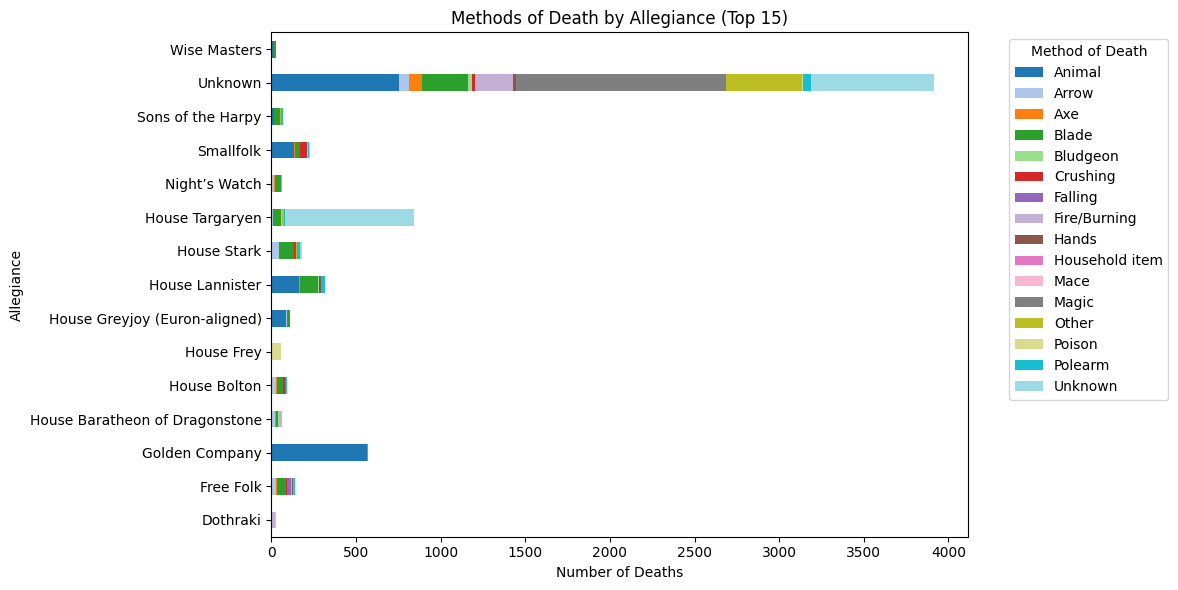

In [155]:
table.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title('Methods of Death by Allegiance (Top 15)')
plt.xlabel('Number of Deaths')
plt.ylabel('Allegiance')
plt.legend(title='Method of Death', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [156]:
top_allegiances = df['allegiance'].value_counts().head(5).index
filtered_dfA = df[df['allegiance'].isin(top_allegiances)]
top_methodCat = df['method_cat'].value_counts().head(10).index
filtered_dfMC = df[df['method_cat'].isin(top_methodCat)]

table = pd.crosstab(filtered_dfA['allegiance'], filtered_dfMC['method_cat'])

chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square test statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)

Chi-square test statistic: 5336.200742961806
Degrees of freedom: 36
p-value: 0.0


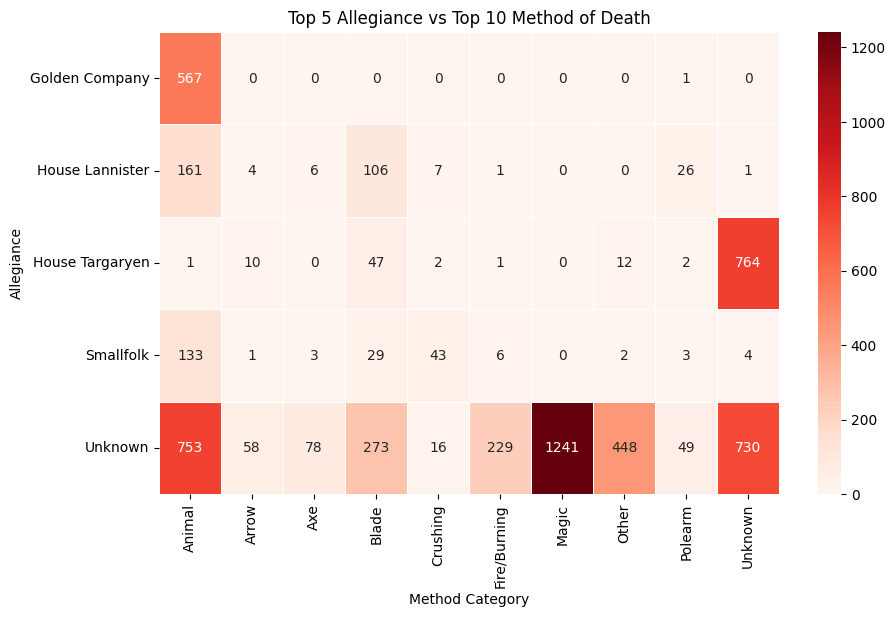

In [157]:
plt.figure(figsize=(10, 6))
sns.heatmap(table, cmap='Reds', linewidths=0.5, annot=True, fmt='d')
plt.title('Top 5 Allegiance vs Top 10 Method of Death')
plt.xlabel('Method Category')
plt.ylabel('Allegiance')
plt.show()

**Analysis of Allegiance vs. Method of death**

A Chi-squared test of independence was done on two categorical variables: *Allegiance* and *method_cat*. The analysis focuses on the top 15 most frequent allegiances and all of the methods of death for a bigger visualizations of data.

Another Test was done, this time focusing on the top 5 allegiances and the top 10 methods of death. This was done to reduce visual clutter and highlight the most prominent patterns.

The stacked bar showed that *'Unknown Allegiance'* showed to have the most number of deaths, with *'Animal'* and *'Unknown'* being predominant methods of death for this group. **House Targeryen** has the second highest number of deaths, again with predominantly *Unkown* methods. The **Golden Company** followed, with *Animal* as the majority method of death.


- *Chi-square test statistic* is 5336.20
- *Degrees of Freedom* is 36
- *p-value* is 0.0



These data leads the group to believe that there is a significant difference between the two observed data. This suggests that the variables *allegiance* and *method_cat* are likely related. There is a good chance that there is a genuine relationship between the variables.

### Allegiance vs. Character Importance

In [158]:
top_alle = df['allegiance'].value_counts().head(15).index
df_top=df[df['allegiance'].isin(top_alle)]
df['allegiance'] = df['allegiance'].astype(str)

df_top['importance_cat'] = df_top['importance'].astype(str)

table = pd.crosstab(df_top['allegiance'], df_top['importance_cat'])

chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square test statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)

Chi-square test statistic: 982.4975171087736
Degrees of freedom: 42
p-value: 1.2920875045209149e-178


C:\Users\CK\AppData\Local\Temp\ipykernel_3080\3195511577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['importance_cat'] = df_top['importance'].astype(str)


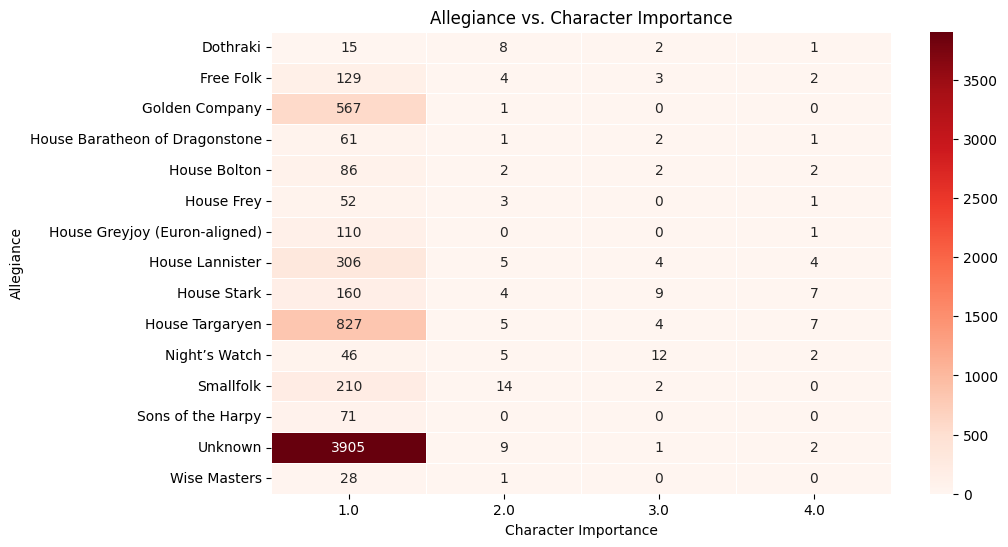

In [159]:
plt.figure(figsize=(10, 6))
sns.heatmap(table, cmap='Reds', linewidths=0.5, annot=True, fmt='d')
plt.title('Allegiance vs. Character Importance')
plt.xlabel('Character Importance')
plt.ylabel('Allegiance')
plt.show()

**Analysis of Allegiance vs. Character Importance**

A test of independence was done on the categorical *Allegiance* and the ordinal *Character Importance*. The analysis focused on the top 15 most frequent allegiances.

The heat map shows that the character importance of **1.0** has the most deaths with the leading three being *Unknown*, *House Targaryen*, and *Golden Company* respectively. The character importance of **4.0** has the highest deaths with 7 remarkable deaths in *House Targaryen*, *House Stark* and the third ranking in *House Lannister* with 4 deaths.


- *Chi-square test statistic* is 982.49
- *Degrees of Freedom* is 42
- *p-value* is 0.0



These data leads the group to believe that *allegiance* and *importance* are related. There is a significant difference observed between the data. There is strong evidence of a relationship or connection between the variables being tested.

### Method Killed vs. Character Importance

In [160]:
top_method = df['method_cat'].value_counts().head(15).index
df_top = df[df['method_cat'].isin(top_method)]
df_top['importance_cat'] = df_top['importance'].astype(str)

table = pd.crosstab(df_top['method_cat'], df_top['importance_cat'])

chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square test statistic:", chi2)
print("Degrees of freedom:", dof)
print(f"p-value:, {p:.2f}")

Chi-square test statistic: 419.78879906694556
Degrees of freedom: 42
p-value:, 0.00


C:\Users\CK\AppData\Local\Temp\ipykernel_3080\1437819986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['importance_cat'] = df_top['importance'].astype(str)


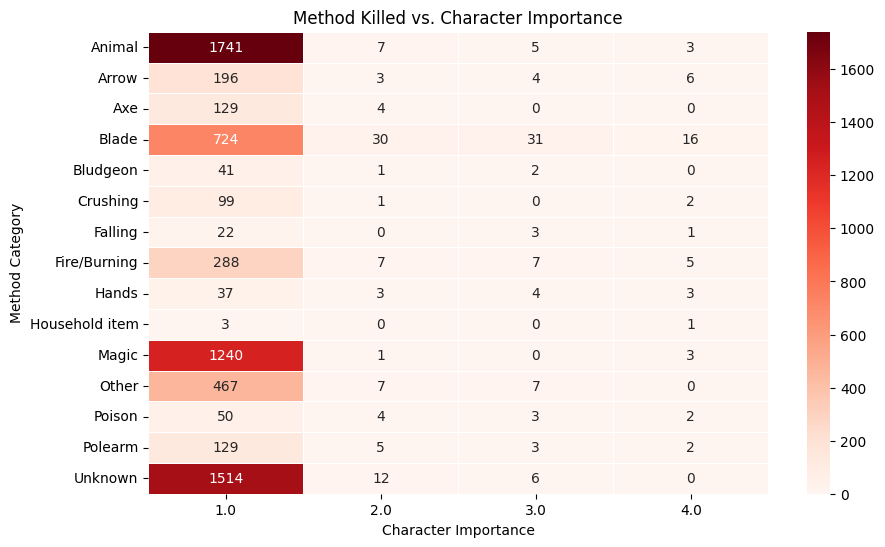

In [161]:
plt.figure(figsize=(10, 6))
sns.heatmap(table, cmap='Reds', linewidths=0.5, annot=True, fmt='d')
plt.title('Method Killed vs. Character Importance')
plt.xlabel('Character Importance')
plt.ylabel('Method Category')
plt.show()

**Analysis of Method Killed and Character Importance**

A test of independence was done on categorical variable *Method Killed* and *Character Importance*. The analysis focused on the top 15 methods killed.

The heat map shows that character importance of **1.0** died on *Animal, Unknown,* and *Magic* with 1741, 1514, and 1240 respectively. The character importance of **4.0** mostly died due to *blade* with 16, *arrow* with 6, and *Fire/Burning* with 5.


- *Chi-square test statistic* is 419.79
- *Degrees of Freedom* is 42
- *p-value* is 0.0



The statistical values show that are lower than the rest but high enough to be suggest that the 2 variables are likely related and are different from each other.

### Season and Method Killed

In [162]:
table = pd.crosstab(df['season'], df_top['method_cat'])

chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square test statistic:", chi2)
print("Degrees of freedom:", dof)
print(f"p-value:, {p:.2f}")

Chi-square test statistic: 7889.725624350602
Degrees of freedom: 98
p-value:, 0.00


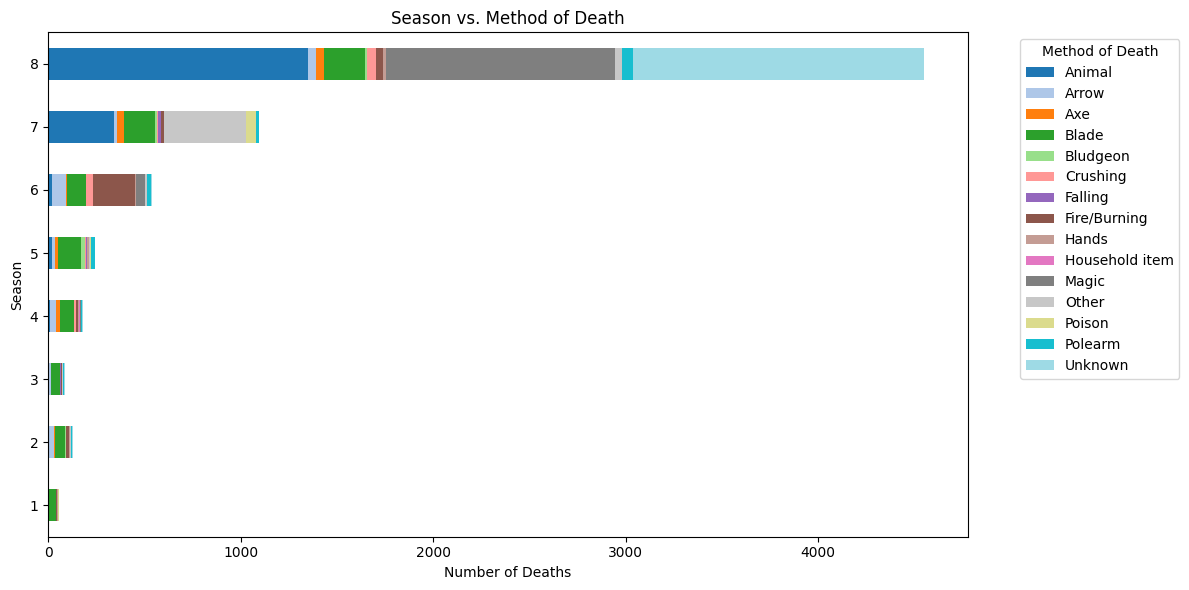

In [163]:
table.plot(kind='barh', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Season vs. Method of Death')
plt.xlabel('Number of Deaths')
plt.ylabel('Season')
plt.legend(title='Method of Death', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Analysis of Season number and Method of Death**

The test of independence was done on ordinal variable on *Season Number* and categorical variable *Method of death*. The Analysis focused on the top 1 methods killed.

The stacked bar showed that the most deaths were in season 8 decreasing values, but season 2 has a higher value than season 3, but season 1 still has the lowest number of deaths. The graph shows that from the **season 1 through 5** that the leading method of death is by *blade*. In **season 6** the leading method of death is by *fire/blade*. In Season 7 the 2 leading methods are *other* and *Animal*. In the last season *Unknown* and *Animal* are the two leading methods.


- *Chi-square test statistic* is  7889.73
- *Degrees of Freedom* is 98
- *p-value* is 0.0



The data presented shows strong difference between the data observed. The variables are likely related.

### TL;DR + Summary (Chi-Square Test of Independence)

The four tests *(Allegiance vs. Method of Death, Allegiance vs. Character Importance, Method of Death vs. Character Importance, and Season Number vs. Method of Death)* all suggest statistically significant relationships, as shown by high chi-square values and  low p-values.

Among these, Season Number vs. Method of Death had the highest chi-square statistic, suggesting the strongest association. The variation in observed data further supports this relationship. All of the variables tested are found to have difference between the two being compared at a time. These variables are likely related. 

## ANOVA (Analysis of Variance)

**ANOVA TESTS**
1. Killer vs. Importance
2. Season vs. Importance

### Killer vs. Importance

In [164]:
top_killa = df['killer'].value_counts().head(15).index
df_top = df[df['killer'].isin(top_killa)]
groups = [group['importance'] for name, group in df_top.groupby('killer')]
f_stat, p = f_oneway(*groups)

print("F:", f_stat)
print("P-value: ", p)

F: 11.798323065651982
P-value:  1.701634208779079e-27


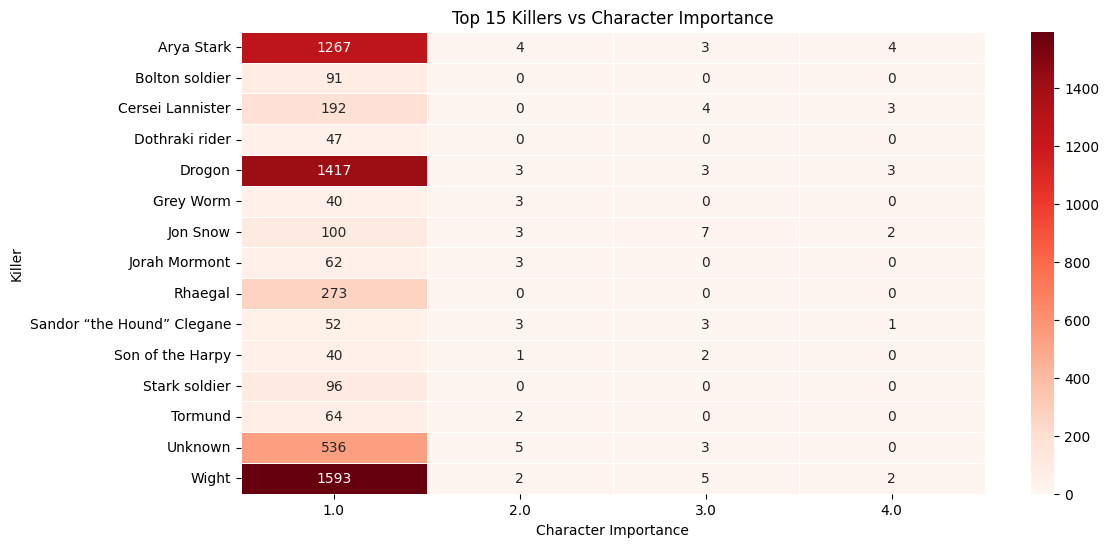

In [165]:
heatMaps = df_top.groupby(['killer', 'importance']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatMaps, cmap='Reds', linewidths=0.5, annot=True, fmt='d')
plt.title('Top 15 Killers vs Character Importance')
plt.xlabel('Character Importance')
plt.ylabel('Killer')
plt.show()

**Analysis of killer and importance**

A one-way ANOVA test was conducted to determine whether the mean character importance significantly differs across the top 15 killers in the dataset. Importance was treated as an ordinal numerical variable, representing the narrative weight or relevance of the character killed.

Test Results:

- *F-statistic*: 11.80
- *P-value:* 1.70 × 10⁻²⁷

These results indicate that there is a statistically significant difference in the mean importance of characters killed by different killers.


### Season vs. Importance

In [166]:
top_season = df['season'].index
df_top = df[df['season'].isin(top_season)]
groups = [group['importance'] for name, group in df_top.groupby('killer')]
f_stat, p = f_oneway(*groups)

print("F:", f_stat)
print("P-value: ", p)

F: 27.28308391453413
P-value:  0.0


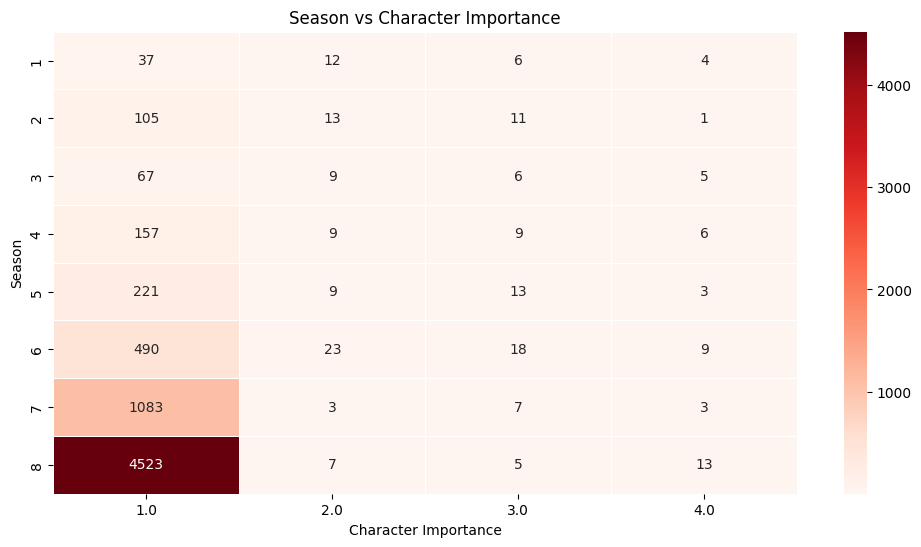

In [167]:
heatMaps = df_top.groupby(['season', 'importance']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatMaps, cmap='Reds', linewidths=0.5, annot=True, fmt='d')
plt.title('Season vs Character Importance')
plt.xlabel('Character Importance')
plt.ylabel('Season')
plt.show()

**Analysis for Season and Character Importance**

A one-way ANOVA test was performed to assess whether the mean character importance of deaths differs across seasons in the dataset.

Test Results:

- F-statistic: 27.28

- P-value: 0.00

The results show a statistically significant difference in the average importance of characters killed across seasons.



## Unpaired T-Test 

Will be testing the 3 powerful houses in game of thrones. We selected House Stark, House Lannister, and House Targaryen for the unpaired t-test because, based on the dataset, they are the top 3 allegiances with the highest number of characters at the maximum importane level (4.0). Unlike the other allegiances in the top 15, which either have zero representation in some importance levels or very few at level 4, these three houses offer more balanced and comparable samples for statistical testing. This analysis aims to determine whether there are significant differences in the average importance of deaths between key allegiances, focusing on low and high importance deaths. 

#### House Stark vs. House Lannister

In [168]:
lowStark = df[(df['allegiance']=='House Stark')&(df['importance']<= 2.0)]['importance'].dropna()
lowLannister = df[(df['allegiance']=='House Lannister')&(df['importance']<= 2.0)]['importance'].dropna()

highStark = df[(df['allegiance']=='House Stark')&(df['importance']>= 3.0)]['importance'].dropna()
highLannister = df[(df['allegiance']=='House Lannister')&(df['importance']>= 3.0)]['importance'].dropna()

In [169]:
from scipy.stats import ttest_ind 

t_low, p_low = ttest_ind(lowStark, lowLannister, equal_var=False)

t_high, p_high = ttest_ind(highStark, highLannister, equal_var=False)

print("Low Importance (1-2):")
print(f"T-statistic: {t_low:.2f}")
print(f"P-Value: {p_low:.2f}")
print()

print("High Importance (3-4):")
print(f"T-statistic: {t_high:.2f}")
print(f"P-Value: {p_high:.2f}")


Low Importance (1-2):
T-statistic: 0.59
P-Value: 0.55

High Importance (3-4):
T-statistic: -0.27
P-Value: 0.79


#### House Stark vs. House Targaryen 

In [170]:
lowStark = df[(df['allegiance']=='House Stark')&(df['importance']<= 2.0)]['importance'].dropna()
lowTargaryen = df[(df['allegiance']=='House Targaryen')&(df['importance']<= 2.0)]['importance'].dropna()

highStark = df[(df['allegiance']=='House Stark')&(df['importance']>= 3.0)]['importance'].dropna()
highTargaryen = df[(df['allegiance']=='House Targaryen')&(df['importance']>= 3.0)]['importance'].dropna()

In [171]:
from scipy.stats import ttest_ind 

t_low, p_low = ttest_ind(lowStark, lowTargaryen, equal_var=False)

t_high, p_high = ttest_ind(highStark, highTargaryen, equal_var=False)

print("Low Importance (1-2):")
print(f"T-statistic: {t_low:.2f}")
print(f"P-Value: {p_low:.2f}")
print()

print("High Importance (3-4):")
print(f"T-statistic: {t_high:.2f}")
print(f"P-Value: {p_high:.2f}")


Low Importance (1-2):
T-statistic: 1.49
P-Value: 0.14

High Importance (3-4):
T-statistic: -1.00
P-Value: 0.33


#### House Lannister vs. House Targaryen

In [172]:
lowLannister = df[(df['allegiance']=='House Lannister')&(df['importance']<= 2.0)]['importance'].dropna()
lowTargaryen = df[(df['allegiance']=='House Targaryen')&(df['importance']<= 2.0)]['importance'].dropna()

highLannister = df[(df['allegiance']=='House Lannister')&(df['importance']>= 3.0)]['importance'].dropna()
highTargaryen = df[(df['allegiance']=='House Targaryen')&(df['importance']>= 3.0)]['importance'].dropna()

In [173]:
from scipy.stats import ttest_ind 

t_low, p_low = ttest_ind(lowLannister, lowTargaryen, equal_var=False)

t_high, p_high = ttest_ind(highLannister, highTargaryen, equal_var=False)

print("Low Importance (1-2):")
print(f"T-statistic: {t_low:.2f}")
print(f"P-Value: {p_low:.2f}")
print()

print("High Importance (3-4):")
print(f"T-statistic: {t_high:.2f}")
print(f"P-Value: {p_high:.2f}")


Low Importance (1-2):
T-statistic: 1.32
P-Value: 0.19

High Importance (3-4):
T-statistic: -0.56
P-Value: 0.58


These results mostly show that there is no significant difference in their death count. However in low importance deaths in stark and targaryen there is slightly more difference, but not significant difference. The three major houses yielded no statistically significant differences in both low(1-2) and high (3-4) importance death groups. All p-values were well above the significant level of 0.05. These data suggests that there is *no statistical* evidence that any of the three houses experience deaths that were on average, of significantly higher or lower importance than the others. 

This quantitive analysis suggests a relatively balanced treatment of character deaths across major allegiances in terms of assigned importance. 

### Summary


**Chi-Square Test**

- *Null Hypothesis:* There is no association between the two categorical variables.
- *Alternative Hypothesis:* There is a significant association between the two categorical variables.
- *Interpretation:*
  All tested pairs of variables yielded p-values less than 0.05, indicating that a statistically significant association exists between the variables.


**ANOVA (Analysis of Variance)**

- *Null Hypothesis:* The means are equal across all groups.
- *Alternative Hypothesis:* At least one group's mean is significantly different.
- *Interpretation:*
  All tested comparisons produced p-values less than 0.05, suggesting that the average character importance differs significantly among the groups.


**Unpaired T-Test**

- *Null Hypothesis:* The mean character importance is equal between the two groups.
- *Alternative Hypothesis:* The means are significantly different between the groups.
- *Interpretation:*
  All comparisons between the selected houses yielded p-values greater than 0.05, indicating that there is no significant difference in the average character importance of deaths between those houses.




# Machine Learning : Predicting the Allegiance of the Character Killed using  <span style="color:purple"> Decision Tree <span>

In [174]:
df.head()

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,allegiance_2,importance
0,1,1,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,House Royce,Night’s Watch,2.0
1,2,1,1,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,No Second Allegiance,2.0
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,No Second Allegiance,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,Unknown,No Second Allegiance,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,Unknown,No Second Allegiance,1.0


Label Encoding of Categorical Features

Many of the columns in our dataset are categorical (e.g., `killer`, `method`, `allegiance`). Since machine learning models like Decision Trees require numerical input, we use `LabelEncoder` to convert these text-based categories into numeric labels.

The following code:
- Applies label encoding to selected columns.
- Stores each encoder for future reference or inverse transformation.
- Displays the mapping for the `allegiance` column as sample to what it looks like.

In [175]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in ['killer', 'method_cat', 'method', 'season', 'allegiance']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  


print("Allegiance Label Mapping:")
for i, label in enumerate(label_encoders['allegiance'].classes_):
    print(f"{i}: {label}")

Allegiance Label Mapping:
0: Brotherhood Without Banners
1: Children of the Forest
2: Dothraki
3: Faceless Men
4: Faith Militant
5: Faith of the Seven
6: Free Folk
7: Golden Company
8: Good Masters
9: Great Masters
10: House Arryn
11: House Baelish
12: House Baratheon of Dragonstone
13: House Baratheon of King’s Landing
14: House Baratheon of Storm’s End
15: House Bolton
16: House Cassel
17: House Clegane
18: House Egen
19: House Florent
20: House Frey
21: House Greyjoy
22: House Greyjoy (Euron-aligned)
23: House Greyjoy (Yara-aligned)
24: House Hollard
25: House Karstark
26: House Kenning
27: House Lannister
28: House Martell
29: House Moore
30: House Mormont
31: House Reed
32: House Royce
33: House Seaworth
34: House Stark
35: House Targaryen
36: House Tarly
37: House Tully
38: House Tyrell
39: House Umber
40: Night’s Watch
41: Second Sons
42: Smallfolk
43: Sons of the Harpy
44: The Lord of Light
45: The Thirteen
46: Thenn
47: Triarchs of Volantis
48: Unknown
49: Varys
50: Warlocks o

In [176]:
print(df[['killer', 'method_cat', 'method', 'season', 'allegiance']].head())

   killer  method_cat  method  season  allegiance
0     135           3      52       0          32
1     135           3      52       0          40
2      80           3      87       0          40
3      26           0      16       0          48
4     114           0       0       0          48


We define the input features (`X`) and the target variable (`y`) for our machine learning model.

In [177]:
features = ['method_cat', 'importance', 'killer', 'season', 'method']
target = 'allegiance'

X = df[features]
y = df[target]


To evaluate how well our model generalizes well, we split the dataset into training and testing sets:

- **70%** of the data is used for training the model.
- **30%** is reserved for testing the model's performance.

We then initialize and train a **Decision Tree Classifier** with a maximum depth of 5. This limits the complexity of the tree to help prevent overfitting on the training data.

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train model
model = DecisionTreeClassifier(max_depth=5,random_state=0)

We train the Decision Tree model using the **training set** (`X_train`, `y_train`).  
After training, we generate predictions on the training data to see how well the model fits


In [179]:
model.fit(X_train, y_train)
predictions_train = model.predict(X_train)

A function to compute the accuracy of our model

In [180]:
def compute_accuracy(actual, predictions):
    num_correct = np.sum(actual == predictions)
    total = actual.shape[0]
    return (num_correct / total) * 100

In [181]:
print("Training accuracy: ", compute_accuracy(y_train, predictions_train),"%")

Training accuracy:  64.23236514522821 %


In [182]:
predictions = model.predict(X_test)
print("Testing accuracy: ", compute_accuracy(y_test, predictions),"%")

Testing accuracy:  62.74794388001935 %


we visualize the structure of the trained decision tree 

This shows:
- features used at each split.
- The threshold values for decision-making.
- The class distributions at each node.
- Whether the node is a leaf or a decision node.

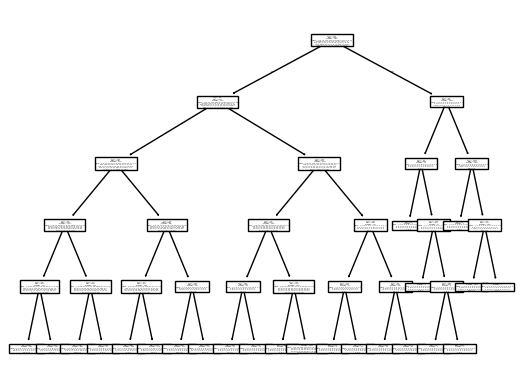

In [183]:
from sklearn import tree

tree.plot_tree(model)
plt.show()

## Hyperparameter Tuning

we prepare the dataset again with LabelEncoder

In [184]:
from sklearn import preprocessing

label_enc = preprocessing.LabelEncoder()
df["allegiance"] = label_enc.fit_transform(df["allegiance"])

features = ['method_cat', 'importance', 'killer', 'season', 'method']
target = 'allegiance' 
X = df[features]
y = df[target] 

We split the dataset into **training** and **testing** sets using an 70/30 split:

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We check how many samples belong to each class in the training set.  

In [186]:
unique, counts = np.unique(y_train, return_counts=True)
print("Training data label counts:")
print(np.array([unique, counts]))

Training data label counts:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   19   20   21   22   23   24   25   27   28   29
    30   31   32   33   34   35   36   37   38   39   40   41   42   43
    44   45   46   47   48   51]
 [   9    4   13    2   10    7   85  401    6    1    6    1   47   16
     1   66    1    3    1   44    2   73   15    1    2  214    4    1
     7    1    1    1  130  590    2    2    1    1   51    1  150   55
     1    7    2    1 2759   21]]


We check how many samples belong to each class in the test set.  

In [187]:
unique, counts = np.unique(y_test, return_counts=True)
print("Test data label counts:")
print(np.array([unique, counts]))

Test data label counts:
[[   0    1    2    4    6    7    8    9   12   13   14   15   17   18
    20   21   22   23   25   26   27   28   30   34   35   38   39   40
    41   42   43   45   46   48   49   50   51]
 [   1    2   13    8   53  167    1    2   18    8    2   26    1    1
    12    1   38    8    2    1  105    7    1   50  253    3    1   14
     1   76   16    5    2 1158    1    1    8]]


We initialize `DecisionTreeClassifier` and inspect its available hyperparameters using `.get_params().keys()`.

In [188]:
model = DecisionTreeClassifier()
model.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'])

We define a grid of hyperparameters to explore during model tuning.

In [189]:
hyperparameters = [
    {
        "criterion" : ["gini","entropy"],
        "max_depth" : [5, 10, 20, 30],
        "min_samples_split" : [2, 4, 6, 10, 15, 20],
        "max_leaf_nodes" : [3, 5, 10, 20, 50, 100]
    }
]

We use `RandomizedSearchCV` to find the best combination of hyperparameters for our model

In [190]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator = model , param_distributions = hyperparameters , n_iter = 50, cv = 5, random_state = 42)

We train the `RandomizedSearchCV` object on the training data (`X_train`, `y_train`).

During this step:
- It tests multiple hyperparameter combinations (as defined in the grid).
- Performs 5-fold cross-validation for each combination.
- Selects the combination that yields the best average validation performance.

In [191]:
rscv.fit(X_train, y_train)

c:\Users\CK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=50,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': [5, 10, 20, 30],
                                         'max_leaf_nodes': [3, 5, 10, 20, 50,
                                                            100],
                                         'min_samples_split': [2, 4, 6, 10, 15,
                                                               20]}],
                   random_state=42)

After training, we extract the best combination of hyperparameters by `RandomizedSearchCV` using `.best_params_`. This show which configuration of the decision tree gave the highest accuracy.


In [192]:
best_params = rscv.best_params_
print(best_params)

{'min_samples_split': 15, 'max_leaf_nodes': 100, 'max_depth': 30, 'criterion': 'entropy'}


To view the detailed results of all 50 hyperparameter combinations tested during `RandomizedSearchCV`.

In [193]:
rscv.cv_results_

{'mean_fit_time': array([0.00212975, 0.0025486 , 0.00218606, 0.00195227, 0.00213408,
        0.00184455, 0.00181746, 0.00260243, 0.00171452, 0.00242772,
        0.00213318, 0.00201564, 0.00190897, 0.00308957, 0.00213346,
        0.00221586, 0.00172176, 0.00221906, 0.00289021, 0.001722  ,
        0.00242467, 0.00199223, 0.00169368, 0.00315895, 0.00172548,
        0.00316644, 0.00255508, 0.00203648, 0.00177221, 0.00239997,
        0.00234256, 0.00201344, 0.00214205, 0.00270591, 0.00202465,
        0.00263648, 0.00247335, 0.00255928, 0.00269594, 0.0018106 ,
        0.00253077, 0.00201597, 0.00213685, 0.00236602, 0.00198283,
        0.00196533, 0.00196772, 0.00244765, 0.00198979, 0.00254836]),
 'std_fit_time': array([2.80194943e-04, 1.52266551e-04, 2.69622510e-04, 2.13169282e-04,
        2.13070991e-04, 5.92993739e-05, 2.85158986e-05, 4.95251346e-05,
        6.40336380e-05, 2.50212774e-05, 3.11952831e-05, 5.99641259e-05,
        1.97915592e-04, 2.56350095e-04, 4.31392972e-05, 3.31241686e-0

We convert the `.cv_results_`  into a DataFrame for easier inspection and analysis.

In [194]:
pd.set_option('display.max_colwidth', None)

rsc_results = pd.DataFrame(rscv.cv_results_)
rsc_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_leaf_nodes,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002130,0.000280,0.000953,0.000308,10,5,10,gini,"{'min_samples_split': 10, 'max_leaf_nodes': 5, 'max_depth': 10, 'criterion': 'gini'}",0.606846,0.597510,0.574689,0.586100,0.606846,0.594398,0.012465,31
1,0.002549,0.000152,0.000696,0.000046,4,10,5,entropy,"{'min_samples_split': 4, 'max_leaf_nodes': 10, 'max_depth': 5, 'criterion': 'entropy'}",0.612033,0.622407,0.607884,0.603734,0.621369,0.613485,0.007353,22
2,0.002186,0.000270,0.000660,0.000014,15,3,30,entropy,"{'min_samples_split': 15, 'max_leaf_nodes': 3, 'max_depth': 30, 'criterion': 'entropy'}",0.572614,0.572614,0.572614,0.572614,0.571577,0.572407,0.000415,43
3,0.001952,0.000213,0.000663,0.000013,2,5,10,gini,"{'min_samples_split': 2, 'max_leaf_nodes': 5, 'max_depth': 10, 'criterion': 'gini'}",0.606846,0.597510,0.574689,0.586100,0.606846,0.594398,0.012465,31
4,0.002134,0.000213,0.000865,0.000256,4,3,10,entropy,"{'min_samples_split': 4, 'max_leaf_nodes': 3, 'max_depth': 10, 'criterion': 'entropy'}",0.572614,0.572614,0.572614,0.572614,0.571577,0.572407,0.000415,43
5,0.001845,0.000059,0.000693,0.000070,10,5,5,gini,"{'min_samples_split': 10, 'max_leaf_nodes': 5, 'max_depth': 5, 'criterion': 'gini'}",0.606846,0.597510,0.574689,0.586100,0.606846,0.594398,0.012465,31
6,0.001817,0.000029,0.000672,0.000034,15,5,10,gini,"{'min_samples_split': 15, 'max_leaf_nodes': 5, 'max_depth': 10, 'criterion': 'gini'}",0.606846,0.597510,0.574689,0.586100,0.606846,0.594398,0.012465,31
7,0.002602,0.000050,0.000663,0.000006,15,50,5,entropy,"{'min_samples_split': 15, 'max_leaf_nodes': 50, 'max_depth': 5, 'criterion': 'entropy'}",0.663900,0.673237,0.645228,0.640041,0.661826,0.656846,0.012333,10
8,0.001715,0.000064,0.000642,0.000004,20,3,20,gini,"{'min_samples_split': 20, 'max_leaf_nodes': 3, 'max_depth': 20, 'criterion': 'gini'}",0.588174,0.585062,0.578838,0.576763,0.575726,0.580913,0.004866,37
9,0.002428,0.000025,0.000671,0.000015,10,10,10,entropy,"{'min_samples_split': 10, 'max_leaf_nodes': 10, 'max_depth': 10, 'criterion': 'entropy'}",0.612033,0.622407,0.607884,0.603734,0.621369,0.613485,0.007353,22


Use `.best_index_` to get the row index of the best-performing hyperparameter combination in the cross-validation results.

In [195]:
best_index = rscv.best_index_
best_index

np.int64(23)

We use `.best_estimator_` to access the trained model with the best combination of hyperparameters found.


In [196]:
rscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=30, max_leaf_nodes=100,
                       min_samples_split=15)

In [197]:
best_model = rscv.best_estimator_
predictions_train = best_model.predict (X_train)
print("Training accuracy: ", compute_accuracy(y_train, predictions_train),"%")

Training accuracy:  73.44398340248964 %


In [198]:
best_model = rscv.best_estimator_
predictions = best_model.predict (X_test)
print("Test accuracy is : ", compute_accuracy(predictions, y_test), "%")

Test accuracy is :  69.8597000483793 %


To interpret and validate the model’s predictions, we display a sample of characters along with their:

- True allegiance (actual label)
- Predicted allegiance (model output)
- Character name for easier reference

In [199]:
# test set to display predictions
sample_df = X_test.copy()

# labels
sample_df['True Allegiance'] = label_enc.inverse_transform(y_test)
sample_df['Predicted Allegiance'] = label_enc.inverse_transform(predictions)

X_test_with_index = X_test.copy() 
X_test_with_index['index'] = X_test_with_index.index # Reset index to match original DataFrame

# Merge to include 'character_killed'
merged = pd.merge(sample_df, df[['character_killed']], left_index=True, right_index=True, how='left')

print(merged[['character_killed', 'True Allegiance', 'Predicted Allegiance']].sample(10))


                     character_killed  True Allegiance  Predicted Allegiance
4038                            Wight               48                     7
5940  Greyjoy (Euron-aligned) soldier               22                     7
3066                   Dothraki rider               35                    35
3834                        Unsullied               35                    34
5356                            Wight               48                    48
5666                            Wight               48                    48
3813                            Horse               48                    35
6632                Lannister soldier               27                    27
422                          Wildling                6                     6
1558                            Wight               48                    48


# Insights and Conclusion

## Key Insights and Findings Summary

In this project, we applied a range of statistical and data mining techniques to explore patterns in Game of Thrones character deaths.

* Chi-Square Test of Independence
        We tested four variable pairs (e.g., Allegiance vs. Method of Death, Season vs. Method) and found statistically significant relationships in all cases, suggesting that these variables are not independent. The strongest association was found between Season Number and Method of Death.

* One-Way ANOVA
        We tested if average character importance varied:

        Across top 15 killers → Result: significant difference (F = 11.80, p < 0.001)

        Across seasons → Result: significant difference (F = 27.28, p < 0.001)
        This shows that certain killers or seasons are more associated with the deaths of important characters.

* Unpaired T-Test
        We compared the average importance of deaths across the three major houses (Stark, Targaryen, Lannister). No statistically significant differences were found, suggesting a balanced portrayal of character deaths among them.

* Association Rule Mining
        We generated association rules to identify death-related patterns. In early seasons, deaths were less predictable (low confidence). From Season 5 onward, rules with higher confidence emerged, indicating more patterned and expected character deaths.
        Key rule examples include:

        {Killer, Method} → Importance

        {Allegiance, Importance} → Method

        {Killer, Location} → Allegiance

Overall, these techniques revealed both expected and surprising trends in the narrative, showing how statistical tools can be used to analyze storytelling data in meaningful ways.

## Personal Insights

### Keira Gabrielle C. Alcantara

One thing I learned is the importance of cleaning and preparing data properly. We separated values in the original allegiance column, where multiple allegiances were listed with commas. This led to duplicated data and misinterpretation. Another key lesson was selecting variables relevant to the research question, focusing only on what’s meaningful instead of using all available data. It’s not just about running tests but understanding what the data tells you.

As a big fan of Game of Thrones, I initially had a bias toward House Stark, thinking they were better compared to other houses, but analyzing the deaths and importance values showed that the powerful houses ended up with similar values. This taught me that data,charts, p-values, and all only become useful when you approach them with purpose and clarity. In the end, understanding how to interpret p-values and relationships between variables helped us make more informed conclusions. And interestingly, I ended up loving the show even more now with a more objective view.



### Charlize Kirsten M. Brodeth

It was interesting to explore a dataset that felt more hobby-related and allowed our general curiosity to guide the analysis. In our previous data science courses, we mostly worked with technical datasets, like those on sleep and health data and employment statsitics in the Philippines, which often felt very structured and formal. This time, we were given the freedom to explore any dataset; choosing the Game of Thrones dataset gave us the freedom to ask questions that were more fun and based on how we personally know the show. As someone who is not very familiar with the full plot of the show, I found it really engaging to explore the differet death documentations of the characters in the show and see if patterns will emerge from techniques like EDA, association rule mining, different statistical inferences techniques, and machine learning. It is like I'm getting a summarized glimspe of the series through the results of the analysis. It was refreshing to approach data scienece from a different angle, one that connects with pop culture and personal interests. Overall, I really enjoyed doing this project. It showed me that data science is not just limited to technical fields, but it can also be used to analyze things I enjoy like books, shows, or movies. 

### Candice Aura T. Fernandez

This project was a fun experience because it demonstrated how EDA, rule mining, statistical inference, and machine learning can be applied even to something as non-traditional as a fictional TV show like *Game of Thrones*. It was cool to see how much information we could tease out simply by looking at how characters died and correlating that with which side they were loyal to using statistical tests and machine learning. I gained much insight into data preprocessing, rule mining, and the need to verify patterns with sound statistical tests such as Chi-square, ANOVA, and Unpaired T-tests. Developing a predictive model that worked well ultimately made the process all the more rewarding. Overall, this project made me realize how data science isn't confined to business or healthcare alone; it could also be used to investigate storytelling in innovative and meaningful ways.


### Allliyah Gaberielle D. Zulueta

This project reignited my passion for data processing and allowed me to apply what I learned from previous subjects like Sollda1 (data processing and EDA) and STINTSY (machine learning). I especially enjoyed working with the Game of Thrones dataset as a big fan of the series, which made the project more engaging and a refreshing break from the usual health-related datasets. It was exciting to analyze data that I was genuinely interested in, and it motivated me to explore deeper insights. I also learned a lot about rule mining, which gave me a better understanding of how to discover meaningful patterns within large datasets. The project reminded me why I enjoy working with data and gave me a sense of purpose in applying these skills to future projects.

## Conclusion

In summary, this project illustrated that the type of death a character in Game of Thrones experiences is statistically significant in patterns that can be predicted to determine their allegiance. We created a model that worked well and captured significant narrative trends about the show by integrating exploratory data analysis, data mining, statistical inference, and machine learning. This procedure demonstrated how data analytics can complement one another, turning made-up events into quantifiable insights. Ultimately, these topics may provide distinct viewpoints in artistic and narrative-driven fields and go beyond practical applications. 

## Generative AI usage Statement
During the preparation of this work the author(s) used ChatGPT for the following purposes:
- For validation if the test cases we come up with and did is significant to the project
- Explain any encountered errors that we faced while doing the project

After using this tool/service, the author(s) reviewed and edited the content as needed and take(s) full responsibility for the content of the publication.

## CSMODEL-S17
## MEMBERS: 
- Keira Gabrielle C. Alcantara
- Charlize Kirsten M. Brodeth
- Candice Aura T. Fernandez
- Alliyah Gaberielle D. Zulueta